In [ ]:
!pip install arch
!pip install yfinance

     |████████████████████████████████| 902 kB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 29.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 6.3 MB 7.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import arch
import statsmodels.api as sm
import yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [ ]:
GetStockinfo = yfinance.Ticker("AAPL")
Stock = GetStockinfo.history(period="2y")
Stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-09,66.512030,66.709100,65.258156,65.753304,128042400,0.0,0.0
2019-12-10,66.167156,66.529277,65.492177,66.137596,90420400,0.0,0.0
2019-12-11,66.218872,66.782995,66.142507,66.701698,78756800,0.0,0.0
2019-12-12,65.965149,67.142658,65.851834,66.871681,137310400,0.0,0.0
2019-12-13,66.871687,67.817635,66.741127,67.780685,133587600,0.0,0.0


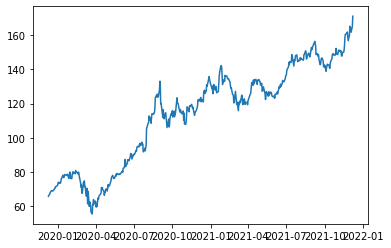

In [ ]:
plt.plot(Stock['Close'])

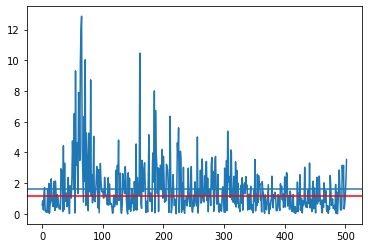

In [ ]:
returns = 100 * Stock['Close'].pct_change().dropna()
returns = returns.to_numpy()
returns = np.abs(returns)
plt.plot(returns)
plt.axhline(y=np.mean(returns))
plt.axhline(y=np.median(returns),color='red')

In [ ]:
am = arch.arch_model(returns)
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 898.9565835663504
Iteration:      2,   Func. Count:     17,   Neg. LLF: 894.8449108714804
Iteration:      3,   Func. Count:     25,   Neg. LLF: 885.0438485601433
Iteration:      4,   Func. Count:     33,   Neg. LLF: 883.1717130218594
Iteration:      5,   Func. Count:     40,   Neg. LLF: 881.5062456700023
Iteration:      6,   Func. Count:     47,   Neg. LLF: 880.1405468304946
Iteration:      7,   Func. Count:     54,   Neg. LLF: 879.3826835108844
Iteration:      8,   Func. Count:     61,   Neg. LLF: 879.324960804615
Iteration:      9,   Func. Count:     69,   Neg. LLF: 879.2672438805176
Iteration:     10,   Func. Count:     75,   Neg. LLF: 879.2548648122211
Iteration:     11,   Func. Count:     81,   Neg. LLF: 879.2531526347635
Iteration:     12,   Func. Count:     87,   Neg. LLF: 879.2530293792247
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 879.2530293791572
            Iterations: 12
 

In [ ]:
p_list = [i for i in range(1,10)]
q_list = [i for i in range(0,10)]
accuracy = dict()

for p in p_list:
  for q in q_list:
    print(p,q)
    predictions = np.zeros(10)
    for i in range(227,237):
      am = arch.arch_model(returns[i:i+730],p=p,q=q,vol='GARCH',)
      model_fit = am.fit()
      pred = model_fit.forecast(horizon=1)
      predictions[i-227] = pred.variance.values[-1][0]
    accuracy[(p,q)] = np.sqrt(np.sum(((predictions-returns[-10:])/returns[-10:])**2))

1 0
Iteration:      1,   Func. Count:      5,   Neg. LLF: 419.3339321454626
Iteration:      2,   Func. Count:     14,   Neg. LLF: 412.9199795118594
Iteration:      3,   Func. Count:     22,   Neg. LLF: 405.2533895810112
Iteration:      4,   Func. Count:     27,   Neg. LLF: 403.1388720930589
Iteration:      5,   Func. Count:     34,   Neg. LLF: 401.58505110131046
Iteration:      6,   Func. Count:     40,   Neg. LLF: 400.89121486519673
Iteration:      7,   Func. Count:     45,   Neg. LLF: 400.81482898067986
Iteration:      8,   Func. Count:     50,   Neg. LLF: 400.79950190666807
Iteration:      9,   Func. Count:     55,   Neg. LLF: 400.7987295197869
Iteration:     10,   Func. Count:     60,   Neg. LLF: 400.79858972228396
Iteration:     11,   Func. Count:     65,   Neg. LLF: 400.79856472499034
Iteration:     12,   Func. Count:     70,   Neg. LLF: 400.7985590913087
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 400.7985590911759
            Itera

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     22,   Neg. LLF: 390.18086120033314
Iteration:      4,   Func. Count:     27,   Neg. LLF: 387.1777974378926
Iteration:      5,   Func. Count:     34,   Neg. LLF: 385.58079323721296
Iteration:      6,   Func. Count:     40,   Neg. LLF: 385.2502280194269
Iteration:      7,   Func. Count:     45,   Neg. LLF: 385.2121133281868
Iteration:      8,   Func. Count:     50,   Neg. LLF: 385.2062486188977
Iteration:      9,   Func. Count:     55,   Neg. LLF: 385.2061547872944
Iteration:     10,   Func. Count:     60,   Neg. LLF: 385.2061484260714
Iteration:     11,   Func. Count:     65,   Neg. LLF: 385.2061473137243
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 385.2061473136921
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      5,   Neg. LLF: 402.42892297474447
Iteration:      2,   Func. Count:     14,   Neg. LLF: 396.738113566

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 387.3013322305096
Iteration:      2,   Func. Count:     16,   Neg. LLF: 387.2601828224151
Iteration:      3,   Func. Count:     25,   Neg. LLF: 386.8909140474791
Iteration:      4,   Func. Count:     32,   Neg. LLF: 386.81046032015996
Iteration:      5,   Func. Count:     39,   Neg. LLF: 386.7982082333731
Iteration:      6,   Func. Count:     46,   Neg. LLF: 386.78957094019023
Iteration:      7,   Func. Count:     53,   Neg. LLF: 386.7810686365436
Iteration:      8,   Func. Count:     59,   Neg. LLF: 386.77378309533105
Iteration:      9,   Func. Count:     65,   Neg. LLF: 386.7709819913555
Iteration:     10,   Func. Count:     71,   Neg. LLF: 386.77095403842225
Iteration:     11,   Func. Count:     77,   Neg. LLF: 386.7709507771806
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 386.77095077709214
            Iterations: 11
            Function evaluations: 77
            Gradient evaluatio

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 377.9071328268151
Iteration:      2,   Func. Count:     16,   Neg. LLF: 377.8598632894436
Iteration:      3,   Func. Count:     25,   Neg. LLF: 377.47405695926807
Iteration:      4,   Func. Count:     32,   Neg. LLF: 377.4167835662425
Iteration:      5,   Func. Count:     40,   Neg. LLF: 377.40599137784363
Iteration:      6,   Func. Count:     47,   Neg. LLF: 377.3852797199962
Iteration:      7,   Func. Count:     54,   Neg. LLF: 377.382138777377
Iteration:      8,   Func. Count:     61,   Neg. LLF: 377.3774780768937
Iteration:      9,   Func. Count:     67,   Neg. LLF: 377.37737232353925
Iteration:     10,   Func. Count:     73,   Neg. LLF: 377.37736701046725
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 377.37736701049766
            Iterations: 10
            Function evaluations: 73
            Gradient evaluations: 10
1 2
Iteration:      1,   Func. Count:      7,   Neg. LLF: 395.0995

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat


Iteration:      3,   Func. Count:     28,   Neg. LLF: 385.4329347707675
Iteration:      4,   Func. Count:     37,   Neg. LLF: 385.42016789585676
Iteration:      5,   Func. Count:     47,   Neg. LLF: 385.408155196934
Iteration:      6,   Func. Count:     55,   Neg. LLF: 385.3897410895441
Iteration:      7,   Func. Count:     62,   Neg. LLF: 385.3787509794277
Iteration:      8,   Func. Count:     70,   Neg. LLF: 385.3660026720666
Iteration:      9,   Func. Count:     77,   Neg. LLF: 385.34142190423347
Iteration:     10,   Func. Count:     84,   Neg. LLF: 385.32665127278415
Iteration:     11,   Func. Count:     91,   Neg. LLF: 385.30935654023074
Iteration:     12,   Func. Count:     98,   Neg. LLF: 385.3074791240651
Iteration:     13,   Func. Count:    105,   Neg. LLF: 385.30650630228274
Iteration:     14,   Func. Count:    112,   Neg. LLF: 385.30650070538115
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 385.3064998811033
            Iteration

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      2,   Func. Count:     17,   Neg. LLF: 377.637967694272
Iteration:      3,   Func. Count:     28,   Neg. LLF: 377.5462770712521
Iteration:      4,   Func. Count:     38,   Neg. LLF: 377.51697234744347
Iteration:      5,   Func. Count:     47,   Neg. LLF: 377.49273567425155
Iteration:      6,   Func. Count:     54,   Neg. LLF: 377.45806204542214
Iteration:      7,   Func. Count:     61,   Neg. LLF: 377.45678629378136
Iteration:      8,   Func. Count:     68,   Neg. LLF: 377.4552520063961
Iteration:      9,   Func. Count:     75,   Neg. LLF: 377.41592794302545
Iteration:     10,   Func. Count:     82,   Neg. LLF: 377.3815070150802
Iteration:     11,   Func. Count:     89,   Neg. LLF: 377.3786175717885
Iteration:     12,   Func. Count:     96,   Neg. LLF: 377.3774200335017
Iteration:     13,   Func. Count:    103,   Neg. LLF: 377.3773761283507
Iteration:     14,   Func. Count:    110,   Neg. LLF: 377.3773671333842
Optimization terminated successfully.    (Exit mode 0)
     

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     11,   Func. Count:    103,   Neg. LLF: 386.59102717039355
Iteration:     12,   Func. Count:    111,   Neg. LLF: 386.58121678952523
Iteration:     13,   Func. Count:    119,   Neg. LLF: 386.5806855562713
Iteration:     14,   Func. Count:    127,   Neg. LLF: 386.58066573787266
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 386.58066573886333
            Iterations: 14
            Function evaluations: 127
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      8,   Neg. LLF: 386.3433628325397
Iteration:      2,   Func. Count:     19,   Neg. LLF: 385.9404197057693
Iteration:      3,   Func. Count:     31,   Neg. LLF: 385.9155727582543
Iteration:      4,   Func. Count:     42,   Neg. LLF: 385.84427992562144
Iteration:      5,   Func. Count:     52,   Neg. LLF: 385.69949810852097
Iteration:      6,   Func. Count:     61,   Neg. LLF: 385.4831495527855
Iteration:      7,   Func. Count:     69,   Neg. LLF: 385.28211

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     13,   Func. Count:    117,   Neg. LLF: 380.07023215258926
Iteration:     14,   Func. Count:    125,   Neg. LLF: 380.0700234295963
Iteration:     15,   Func. Count:    133,   Neg. LLF: 380.0699638157823
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 380.0699638168927
            Iterations: 15
            Function evaluations: 133
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      8,   Neg. LLF: 379.99332429661865
Iteration:      2,   Func. Count:     19,   Neg. LLF: 379.6147068925709
Iteration:      3,   Func. Count:     31,   Neg. LLF: 379.57953168805244
Iteration:      4,   Func. Count:     42,   Neg. LLF: 379.5019878830117
Iteration:      5,   Func. Count:     52,   Neg. LLF: 379.307029318084
Iteration:      6,   Func. Count:     61,   Neg. LLF: 379.0807870200598
Iteration:      7,   Func. Count:     69,   Neg. LLF: 378.8732081071193
Iteration:      8,   Func. Count:     77,   Neg. LLF: 378.788108762

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:      9,   Neg. LLF: 390.1791290651292
Iteration:      2,   Func. Count:     22,   Neg. LLF: 390.1169243644071
Iteration:      3,   Func. Count:     34,   Neg. LLF: 389.734234547335
Iteration:      4,   Func. Count:     46,   Neg. LLF: 389.66504915486394
Iteration:      5,   Func. Count:     56,   Neg. LLF: 389.3510177844878
Iteration:      6,   Func. Count:     66,   Neg. LLF: 389.24161363923804
Iteration:      7,   Func. Count:     75,   Neg. LLF: 388.67359947562284
Iteration:      8,   Func. Count:     84,   Neg. LLF: 388.2897499131348
Iteration:      9,   Func. Count:     93,   Neg. LLF: 388.17822312530166
Iteration:     10,   Func. Count:    102,   Neg. LLF: 388.1331041207005
Iteration:     11,   Func. Count:    111,   Neg. LLF: 388.1315751973439
Iteration:     12,   Func. Count:    120,   Neg. LLF: 388.1314460012446
Iteration:     13,   Func. Count:    129,   Neg. LLF: 388.1314403732953
Optimization terminated successfully.    (Exit mode 0)
      

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:      9,   Neg. LLF: 383.0667987718273
Iteration:      2,   Func. Count:     22,   Neg. LLF: 382.9586846659447
Iteration:      3,   Func. Count:     34,   Neg. LLF: 382.6267014646283
Iteration:      4,   Func. Count:     46,   Neg. LLF: 382.5381814804114
Iteration:      5,   Func. Count:     56,   Neg. LLF: 382.29952193434053
Iteration:      6,   Func. Count:     66,   Neg. LLF: 382.13449328188244
Iteration:      7,   Func. Count:     75,   Neg. LLF: 381.58970975324104
Iteration:      8,   Func. Count:     84,   Neg. LLF: 381.2762605384854
Iteration:      9,   Func. Count:     93,   Neg. LLF: 381.1732595407337
Iteration:     10,   Func. Count:    102,   Neg. LLF: 381.13003900961485
Iteration:     11,   Func. Count:    111,   Neg. LLF: 381.128930124269
Iteration:     12,   Func. Count:    120,   Neg. LLF: 381.12881596091154
Iteration:     13,   Func. Count:    129,   Neg. LLF: 381.1288135404859
Optimization terminated successfully.    (Exit mode 0)
     

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      7,   Func. Count:     82,   Neg. LLF: 392.9896258676026
Iteration:      8,   Func. Count:     92,   Neg. LLF: 392.90837228086417
Iteration:      9,   Func. Count:    102,   Neg. LLF: 392.82353234482025
Iteration:     10,   Func. Count:    112,   Neg. LLF: 392.73342997207556
Iteration:     11,   Func. Count:    122,   Neg. LLF: 392.7122522224946
Iteration:     12,   Func. Count:    132,   Neg. LLF: 392.70667165843344
Iteration:     13,   Func. Count:    142,   Neg. LLF: 392.7064987694139
Iteration:     14,   Func. Count:    152,   Neg. LLF: 392.70647515492715
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 392.7064751055773
            Iterations: 14
            Function evaluations: 152
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     10,   Neg. LLF: 393.8745654549425
Iteration:      2,   Func. Count:     23,   Neg. LLF: 393.25502687408164
Iteration:      3,   Func. Count:     37,   Neg. LLF: 393.23700

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      7,   Func. Count:     79,   Neg. LLF: 378.2921855722834
Iteration:      8,   Func. Count:     90,   Neg. LLF: 378.1977006868447
Iteration:      9,   Func. Count:    100,   Neg. LLF: 377.6336578969398
Iteration:     10,   Func. Count:    110,   Neg. LLF: 377.5965835002964
Iteration:     11,   Func. Count:    120,   Neg. LLF: 377.5882395963953
Iteration:     12,   Func. Count:    130,   Neg. LLF: 377.57595272836977
Iteration:     13,   Func. Count:    140,   Neg. LLF: 377.5754530141305
Iteration:     14,   Func. Count:    150,   Neg. LLF: 377.5751132259352
Iteration:     15,   Func. Count:    160,   Neg. LLF: 377.5750708538766
Iteration:     16,   Func. Count:    170,   Neg. LLF: 377.5750672279409
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 377.5750661819239
            Iterations: 16
            Function evaluations: 171
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     10,   Neg. LLF: 378.2129011505

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     11,   Neg. LLF: 390.83921868937745
Iteration:      2,   Func. Count:     25,   Neg. LLF: 390.48470054164954
Iteration:      3,   Func. Count:     40,   Neg. LLF: 390.4512770431977
Iteration:      4,   Func. Count:     54,   Neg. LLF: 390.24487313245663
Iteration:      5,   Func. Count:     66,   Neg. LLF: 389.72356864295307
Iteration:      6,   Func. Count:     78,   Neg. LLF: 389.37968586638647
Iteration:      7,   Func. Count:     90,   Neg. LLF: 389.1520691037596
Iteration:      8,   Func. Count:    101,   Neg. LLF: 388.22537976808667
Iteration:      9,   Func. Count:    112,   Neg. LLF: 388.1434197451929
Iteration:     10,   Func. Count:    123,   Neg. LLF: 388.133505140925
Iteration:     11,   Func. Count:    134,   Neg. LLF: 388.1318594961414
Iteration:     12,   Func. Count:    145,   Neg. LLF: 388.13144156291526
Iteration:     13,   Func. Count:    156,   Neg. LLF: 388.13143970816486
Optimization terminated successfully.    (Exit mode 0)
  

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      4,   Func. Count:     49,   Neg. LLF: 383.7686616245739
Iteration:      5,   Func. Count:     62,   Neg. LLF: 383.732870059059
Iteration:      6,   Func. Count:     74,   Neg. LLF: 383.6634888372723
Iteration:      7,   Func. Count:     86,   Neg. LLF: 383.44159073510747
Iteration:      8,   Func. Count:     98,   Neg. LLF: 383.40753200677517
Iteration:      9,   Func. Count:    109,   Neg. LLF: 382.6006691757028
Iteration:     10,   Func. Count:    120,   Neg. LLF: 382.55635758753283
Iteration:     11,   Func. Count:    131,   Neg. LLF: 382.53314089994706
Iteration:     12,   Func. Count:    142,   Neg. LLF: 382.53293887615627
Iteration:     13,   Func. Count:    153,   Neg. LLF: 382.5329013487413
Iteration:     14,   Func. Count:    164,   Neg. LLF: 382.53289756907634
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 382.53289752011386
            Iterations: 14
            Function evaluations: 164
            Gradient evaluat

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     11,   Neg. LLF: 378.4356742462247
Iteration:      2,   Func. Count:     25,   Neg. LLF: 378.2125894529531
Iteration:      3,   Func. Count:     37,   Neg. LLF: 377.61143084594346
Iteration:      4,   Func. Count:     50,   Neg. LLF: 377.50450542245426
Iteration:      5,   Func. Count:     63,   Neg. LLF: 377.147065414413
Iteration:      6,   Func. Count:     75,   Neg. LLF: 377.03893894165617
Iteration:      7,   Func. Count:     87,   Neg. LLF: 376.9774360060094
Iteration:      8,   Func. Count:     99,   Neg. LLF: 376.897582888795
Iteration:      9,   Func. Count:    110,   Neg. LLF: 376.0906644837437
Iteration:     10,   Func. Count:    121,   Neg. LLF: 376.06896526696227
Iteration:     11,   Func. Count:    132,   Neg. LLF: 376.06434530572767
Iteration:     12,   Func. Count:    143,   Neg. LLF: 376.06356674221604
Iteration:     13,   Func. Count:    154,   Neg. LLF: 376.06349412607494
Iteration:     14,   Func. Count:    165,   Neg. LLF: 376.0

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     12,   Neg. LLF: 390.8260214573757
Iteration:      2,   Func. Count:     27,   Neg. LLF: 390.53608673223357
Iteration:      3,   Func. Count:     42,   Neg. LLF: 390.5268945289537
Iteration:      4,   Func. Count:     55,   Neg. LLF: 390.0337269296009
Iteration:      5,   Func. Count:     68,   Neg. LLF: 389.55106784957763
Iteration:      6,   Func. Count:     80,   Neg. LLF: 388.2686832577009
Iteration:      7,   Func. Count:     92,   Neg. LLF: 387.4628728927182
Iteration:      8,   Func. Count:    106,   Neg. LLF: 387.3076681926892
Iteration:      9,   Func. Count:    119,   Neg. LLF: 386.80328938274886
Iteration:     10,   Func. Count:    131,   Neg. LLF: 386.3995490358458
Iteration:     11,   Func. Count:    144,   Neg. LLF: 386.36475935083104
Iteration:     12,   Func. Count:    157,   Neg. LLF: 386.3281750439282
Iteration:     13,   Func. Count:    170,   Neg. LLF: 386.2729546321592
Iteration:     14,   Func. Count:    182,   Neg. LLF: 386.25

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     13,   Func. Count:    169,   Neg. LLF: 381.2257684434153
Iteration:     14,   Func. Count:    181,   Neg. LLF: 381.22572558048387
Iteration:     15,   Func. Count:    193,   Neg. LLF: 381.22571386100947
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 381.2257138608012
            Iterations: 15
            Function evaluations: 193
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     12,   Neg. LLF: 384.97172506284915
Iteration:      2,   Func. Count:     27,   Neg. LLF: 384.7452403833353
Iteration:      3,   Func. Count:     40,   Neg. LLF: 384.0959773537757
Iteration:      4,   Func. Count:     53,   Neg. LLF: 383.5946192231439
Iteration:      5,   Func. Count:     67,   Neg. LLF: 383.53698532841463
Iteration:      6,   Func. Count:     79,   Neg. LLF: 383.1496959739154
Iteration:      7,   Func. Count:     93,   Neg. LLF: 380.66468552389813
Iteration:      8,   Func. Count:    108,   Neg. LLF: 380.205849

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     12,   Neg. LLF: 379.87825584896217
Iteration:      2,   Func. Count:     27,   Neg. LLF: 379.66018387342325
Iteration:      3,   Func. Count:     40,   Neg. LLF: 378.68338476191343
Iteration:      4,   Func. Count:     54,   Neg. LLF: 378.60378035507864
Iteration:      5,   Func. Count:     66,   Neg. LLF: 378.19564671065535
Iteration:      6,   Func. Count:     80,   Neg. LLF: 377.82582724323277
Iteration:      7,   Func. Count:     94,   Neg. LLF: 376.5601598604839
Iteration:      8,   Func. Count:    107,   Neg. LLF: 375.7871634311765
Iteration:      9,   Func. Count:    120,   Neg. LLF: 375.307292097652
Iteration:     10,   Func. Count:    133,   Neg. LLF: 375.1614145684851
Iteration:     11,   Func. Count:    146,   Neg. LLF: 375.0220650214587
Iteration:     12,   Func. Count:    158,   Neg. LLF: 374.9067201476121
Iteration:     13,   Func. Count:    170,   Neg. LLF: 374.88456104917697
Iteration:     14,   Func. Count:    183,   Neg. LLF: 374.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      9,   Func. Count:    130,   Neg. LLF: 383.3249287233046
Iteration:     10,   Func. Count:    144,   Neg. LLF: 383.0694921806531
Iteration:     11,   Func. Count:    157,   Neg. LLF: 382.90108030977694
Iteration:     12,   Func. Count:    171,   Neg. LLF: 382.78166517823604
Iteration:     13,   Func. Count:    184,   Neg. LLF: 382.7045865901102
Iteration:     14,   Func. Count:    197,   Neg. LLF: 382.6773420617635
Iteration:     15,   Func. Count:    210,   Neg. LLF: 382.6746058978804
Iteration:     16,   Func. Count:    223,   Neg. LLF: 382.67428883870036
Iteration:     17,   Func. Count:    236,   Neg. LLF: 382.6742392424334
Iteration:     18,   Func. Count:    249,   Neg. LLF: 382.67423818965267
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 382.6742377767461
            Iterations: 18
            Function evaluations: 249
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     13,   Neg. LLF: 386.6363280

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      5,   Func. Count:     73,   Neg. LLF: 382.49853124736796
Iteration:      6,   Func. Count:     86,   Neg. LLF: 381.81938710539237
Iteration:      7,   Func. Count:    100,   Neg. LLF: 379.96389120624275
Iteration:      8,   Func. Count:    116,   Neg. LLF: 379.0831842414003
Iteration:      9,   Func. Count:    130,   Neg. LLF: 378.97771361264216
Iteration:     10,   Func. Count:    143,   Neg. LLF: 378.7939479547059
Iteration:     11,   Func. Count:    156,   Neg. LLF: 378.66125297224755
Iteration:     12,   Func. Count:    169,   Neg. LLF: 378.5527291484516
Iteration:     13,   Func. Count:    182,   Neg. LLF: 378.5391154593333
Iteration:     14,   Func. Count:    195,   Neg. LLF: 378.53606842917463
Iteration:     15,   Func. Count:    208,   Neg. LLF: 378.5358511453553
Iteration:     16,   Func. Count:    221,   Neg. LLF: 378.5358200575317
Iteration:     17,   Func. Count:    234,   Neg. LLF: 378.5357989821297
Optimization terminated successfully.    (Exit mode 0)
   

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     13,   Neg. LLF: 378.68696105159336
Iteration:      2,   Func. Count:     29,   Neg. LLF: 378.4881443307297
Iteration:      3,   Func. Count:     43,   Neg. LLF: 377.8878927336627
Iteration:      4,   Func. Count:     57,   Neg. LLF: 377.38863936459103
Iteration:      5,   Func. Count:     72,   Neg. LLF: 377.3523614779741
Iteration:      6,   Func. Count:     87,   Neg. LLF: 377.3135150404743
Iteration:      7,   Func. Count:    100,   Neg. LLF: 376.1392578456498
Iteration:      8,   Func. Count:    114,   Neg. LLF: 374.50206214133664
Iteration:      9,   Func. Count:    130,   Neg. LLF: 374.3659494100237
Iteration:     10,   Func. Count:    144,   Neg. LLF: 373.92051164882423
Iteration:     11,   Func. Count:    157,   Neg. LLF: 373.60449930707136
Iteration:     12,   Func. Count:    170,   Neg. LLF: 373.4943387814337
Iteration:     13,   Func. Count:    183,   Neg. LLF: 373.3868989075638
Iteration:     14,   Func. Count:    196,   Neg. LLF: 373.3

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     13,   Func. Count:    192,   Neg. LLF: 389.7013636541264
Iteration:     14,   Func. Count:    206,   Neg. LLF: 389.7013403821122
Iteration:     15,   Func. Count:    220,   Neg. LLF: 389.70133478555215
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 389.70133475095554
            Iterations: 15
            Function evaluations: 220
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     14,   Neg. LLF: 391.1448800099409
Iteration:      2,   Func. Count:     31,   Neg. LLF: 390.86224545083275
Iteration:      3,   Func. Count:     48,   Neg. LLF: 390.8269478910229
Iteration:      4,   Func. Count:     63,   Neg. LLF: 390.31421598333804
Iteration:      5,   Func. Count:     78,   Neg. LLF: 389.90182800397946
Iteration:      6,   Func. Count:     92,   Neg. LLF: 388.2345804055109
Iteration:      7,   Func. Count:    106,   Neg. LLF: 387.5668815561924
Iteration:      8,   Func. Count:    122,   Neg. LLF: 387.505886

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      4,   Func. Count:     61,   Neg. LLF: 385.77090593416074
Iteration:      5,   Func. Count:     76,   Neg. LLF: 385.44805225219676
Iteration:      6,   Func. Count:     91,   Neg. LLF: 385.15977513046397
Iteration:      7,   Func. Count:    105,   Neg. LLF: 383.5008274581592
Iteration:      8,   Func. Count:    120,   Neg. LLF: 381.62769086479045
Iteration:      9,   Func. Count:    135,   Neg. LLF: 381.41001015250765
Iteration:     10,   Func. Count:    150,   Neg. LLF: 381.37596445821015
Iteration:     11,   Func. Count:    165,   Neg. LLF: 381.2843744005895
Iteration:     12,   Func. Count:    180,   Neg. LLF: 381.2286304566734
Iteration:     13,   Func. Count:    194,   Neg. LLF: 381.2262188873446
Iteration:     14,   Func. Count:    208,   Neg. LLF: 381.22575767754967
Iteration:     15,   Func. Count:    222,   Neg. LLF: 381.22571401469145
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 381.2257133058447
            Iterati

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      4,   Func. Count:     61,   Neg. LLF: 377.5329068074859
Iteration:      5,   Func. Count:     76,   Neg. LLF: 376.99515028635335
Iteration:      6,   Func. Count:     91,   Neg. LLF: 376.6737019903367
Iteration:      7,   Func. Count:    107,   Neg. LLF: 376.3777083663496
Iteration:      8,   Func. Count:    122,   Neg. LLF: 375.43011980563074
Iteration:      9,   Func. Count:    136,   Neg. LLF: 374.41071621926505
Iteration:     10,   Func. Count:    151,   Neg. LLF: 374.1354538803495
Iteration:     11,   Func. Count:    166,   Neg. LLF: 373.893625233514
Iteration:     12,   Func. Count:    181,   Neg. LLF: 373.66410085026513
Iteration:     13,   Func. Count:    196,   Neg. LLF: 373.44626546732997
Iteration:     14,   Func. Count:    210,   Neg. LLF: 373.38722793748286
Iteration:     15,   Func. Count:    224,   Neg. LLF: 373.37728194907186
Iteration:     16,   Func. Count:    238,   Neg. LLF: 373.37669978794645
Iteration:     17,   Func. Count:    252,   Neg. LLF: 373

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 405.5678863068926
Iteration:      2,   Func. Count:     16,   Neg. LLF: 394.5216640350431
Iteration:      3,   Func. Count:     25,   Neg. LLF: 391.4936106864076
Iteration:      4,   Func. Count:     32,   Neg. LLF: 390.46538340795723
Iteration:      5,   Func. Count:     40,   Neg. LLF: 390.28157935731394
Iteration:      6,   Func. Count:     47,   Neg. LLF: 390.2496252982326
Iteration:      7,   Func. Count:     54,   Neg. LLF: 390.20397862485106
Iteration:      8,   Func. Count:     60,   Neg. LLF: 390.1942533862151
Iteration:      9,   Func. Count:     66,   Neg. LLF: 390.1925816606822
Iteration:     10,   Func. Count:     72,   Neg. LLF: 390.19257032802653
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 390.19257032818416
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 404.1423591

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:      7,   Neg. LLF: 395.3175799162579
Iteration:      2,   Func. Count:     17,   Neg. LLF: 394.74715458139565
Iteration:      3,   Func. Count:     28,   Neg. LLF: 394.69826015942
Iteration:      4,   Func. Count:     36,   Neg. LLF: 394.54827645329897
Iteration:      5,   Func. Count:     44,   Neg. LLF: 394.46547263996655
Iteration:      6,   Func. Count:     52,   Neg. LLF: 394.40837842541043
Iteration:      7,   Func. Count:     60,   Neg. LLF: 394.3924660076993
Iteration:      8,   Func. Count:     67,   Neg. LLF: 394.3646867621063
Iteration:      9,   Func. Count:     74,   Neg. LLF: 394.3585516971698
Iteration:     10,   Func. Count:     82,   Neg. LLF: 394.358035925419
Iteration:     11,   Func. Count:     90,   Neg. LLF: 394.3554426457675
Iteration:     12,   Func. Count:     97,   Neg. LLF: 394.3548327797697
Iteration:     13,   Func. Count:    104,   Neg. LLF: 394.3547990882254
Iteration:     14,   Func. Count:    111,   Neg. LLF: 394.35479

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:      7,   Neg. LLF: 384.4013279438079
Iteration:      2,   Func. Count:     18,   Neg. LLF: 384.3696586312467
Iteration:      3,   Func. Count:     28,   Neg. LLF: 383.9282496620059
Iteration:      4,   Func. Count:     36,   Neg. LLF: 383.8695557604748
Iteration:      5,   Func. Count:     44,   Neg. LLF: 383.86045469878957
Iteration:      6,   Func. Count:     53,   Neg. LLF: 383.85004266989847
Iteration:      7,   Func. Count:     61,   Neg. LLF: 383.84907459110246
Iteration:      8,   Func. Count:     70,   Neg. LLF: 383.84842426086664
Iteration:      9,   Func. Count:     77,   Neg. LLF: 383.8483183183663
Iteration:     10,   Func. Count:     84,   Neg. LLF: 383.8483146649105
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 383.8483146649537
            Iterations: 10
            Function evaluations: 84
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg. LLF: 383.06597472

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     10,   Func. Count:     95,   Neg. LLF: 394.32289829312083
Iteration:     11,   Func. Count:    103,   Neg. LLF: 394.32227680435625
Iteration:     12,   Func. Count:    111,   Neg. LLF: 394.3222743538952
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 394.3222743538397
            Iterations: 12
            Function evaluations: 111
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      8,   Neg. LLF: 393.8265573106377
Iteration:      2,   Func. Count:     19,   Neg. LLF: 392.978355953655
Iteration:      3,   Func. Count:     31,   Neg. LLF: 392.9762125700381
Iteration:      4,   Func. Count:     43,   Neg. LLF: 392.97593296239654
Iteration:      5,   Func. Count:     54,   Neg. LLF: 392.9756122569048
Iteration:      6,   Func. Count:     62,   Neg. LLF: 392.91040267899507
Iteration:      7,   Func. Count:     71,   Neg. LLF: 392.90454211198715
Iteration:      8,   Func. Count:     80,   Neg. LLF: 392.8985184

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:      8,   Neg. LLF: 384.44374857555056
Iteration:      2,   Func. Count:     19,   Neg. LLF: 384.0368919465191
Iteration:      3,   Func. Count:     31,   Neg. LLF: 383.9851531380192
Iteration:      4,   Func. Count:     41,   Neg. LLF: 383.95464287201196
Iteration:      5,   Func. Count:     52,   Neg. LLF: 383.94512886531186
Iteration:      6,   Func. Count:     61,   Neg. LLF: 383.91724017315954
Iteration:      7,   Func. Count:     70,   Neg. LLF: 383.9123968056331
Iteration:      8,   Func. Count:     79,   Neg. LLF: 383.9088891885057
Iteration:      9,   Func. Count:     87,   Neg. LLF: 383.9011165198532
Iteration:     10,   Func. Count:     95,   Neg. LLF: 383.86032962832587
Iteration:     11,   Func. Count:    103,   Neg. LLF: 383.84869520508073
Iteration:     12,   Func. Count:    111,   Neg. LLF: 383.84839340472627
Iteration:     13,   Func. Count:    119,   Neg. LLF: 383.8483297246115
Iteration:     14,   Func. Count:    127,   Neg. LLF: 383

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      2,   Func. Count:     19,   Neg. LLF: 377.60679055292695
Iteration:      3,   Func. Count:     31,   Neg. LLF: 377.5207650106315
Iteration:      4,   Func. Count:     41,   Neg. LLF: 377.45177723911206
Iteration:      5,   Func. Count:     52,   Neg. LLF: 377.41252209150514
Iteration:      6,   Func. Count:     61,   Neg. LLF: 377.38497669201524
Iteration:      7,   Func. Count:     70,   Neg. LLF: 377.3785092170733
Iteration:      8,   Func. Count:     79,   Neg. LLF: 377.3666630095272
Iteration:      9,   Func. Count:     87,   Neg. LLF: 377.36102665207534
Iteration:     10,   Func. Count:     95,   Neg. LLF: 377.325807017217
Iteration:     11,   Func. Count:    103,   Neg. LLF: 377.3028080149586
Iteration:     12,   Func. Count:    111,   Neg. LLF: 377.30146215360026
Iteration:     13,   Func. Count:    119,   Neg. LLF: 377.30135050990805
Iteration:     14,   Func. Count:    127,   Neg. LLF: 377.3013431419226
Iteration:     15,   Func. Count:    135,   Neg. LLF: 377.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     13,   Func. Count:    134,   Neg. LLF: 388.98989427758175
Iteration:     14,   Func. Count:    143,   Neg. LLF: 388.93374512876676
Iteration:     15,   Func. Count:    152,   Neg. LLF: 388.7939610693419
Iteration:     16,   Func. Count:    161,   Neg. LLF: 388.7158834566352
Iteration:     17,   Func. Count:    170,   Neg. LLF: 388.7074382495398
Iteration:     18,   Func. Count:    179,   Neg. LLF: 388.7028214604528
Iteration:     19,   Func. Count:    188,   Neg. LLF: 388.6997258696829
Iteration:     20,   Func. Count:    197,   Neg. LLF: 388.6986358724834
Iteration:     21,   Func. Count:    206,   Neg. LLF: 388.69651400159654
Iteration:     22,   Func. Count:    215,   Neg. LLF: 388.6956567380246
Iteration:     23,   Func. Count:    224,   Neg. LLF: 388.69558248372624
Iteration:     24,   Func. Count:    233,   Neg. LLF: 388.69542311940813
Iteration:     25,   Func. Count:    242,   Neg. LLF: 388.69542193340186
Optimization terminated successfully.    (Exit mode 0)
   

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      8,   Func. Count:     86,   Neg. LLF: 383.4528416229252
Iteration:      9,   Func. Count:     97,   Neg. LLF: 383.4250060086491
Iteration:     10,   Func. Count:    107,   Neg. LLF: 383.336893557705
Iteration:     11,   Func. Count:    117,   Neg. LLF: 383.28952733258564
Iteration:     12,   Func. Count:    127,   Neg. LLF: 383.2366352655823
Iteration:     13,   Func. Count:    136,   Neg. LLF: 382.8847221896678
Iteration:     14,   Func. Count:    146,   Neg. LLF: 382.87790391560026
Iteration:     15,   Func. Count:    155,   Neg. LLF: 382.876071656541
Iteration:     16,   Func. Count:    164,   Neg. LLF: 382.87302166446204
Iteration:     17,   Func. Count:    173,   Neg. LLF: 382.8719060868565
Iteration:     18,   Func. Count:    182,   Neg. LLF: 382.87054157928435
Iteration:     19,   Func. Count:    191,   Neg. LLF: 382.86893430848414
Iteration:     20,   Func. Count:    200,   Neg. LLF: 382.86824278756933
Iteration:     21,   Func. Count:    209,   Neg. LLF: 382.86

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      9,   Func. Count:     96,   Neg. LLF: 378.3473192585584
Iteration:     10,   Func. Count:    106,   Neg. LLF: 378.30496763626985
Iteration:     11,   Func. Count:    116,   Neg. LLF: 378.2479087155875
Iteration:     12,   Func. Count:    125,   Neg. LLF: 377.96017262855514
Iteration:     13,   Func. Count:    135,   Neg. LLF: 377.9243458292865
Iteration:     14,   Func. Count:    144,   Neg. LLF: 377.9071487818259
Iteration:     15,   Func. Count:    153,   Neg. LLF: 377.9021724310841
Iteration:     16,   Func. Count:    162,   Neg. LLF: 377.8988588418293
Iteration:     17,   Func. Count:    171,   Neg. LLF: 377.89574828974173
Iteration:     18,   Func. Count:    180,   Neg. LLF: 377.895358050191
Iteration:     19,   Func. Count:    189,   Neg. LLF: 377.8953069328016
Iteration:     20,   Func. Count:    198,   Neg. LLF: 377.8953038920912
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 377.89530389224956
            Iterations: 

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     10,   Neg. LLF: 393.7222098779516
Iteration:      2,   Func. Count:     23,   Neg. LLF: 393.0537448282285
Iteration:      3,   Func. Count:     37,   Neg. LLF: 393.0258591147047
Iteration:      4,   Func. Count:     50,   Neg. LLF: 392.90946574390387
Iteration:      5,   Func. Count:     61,   Neg. LLF: 392.672471483796
Iteration:      6,   Func. Count:     72,   Neg. LLF: 392.5488062566227
Iteration:      7,   Func. Count:     82,   Neg. LLF: 392.046215196549
Iteration:      8,   Func. Count:     94,   Neg. LLF: 391.98664597443747
Iteration:      9,   Func. Count:    106,   Neg. LLF: 391.641113440521
Iteration:     10,   Func. Count:    116,   Neg. LLF: 391.48590169592376
Iteration:     11,   Func. Count:    126,   Neg. LLF: 391.43738411740577
Iteration:     12,   Func. Count:    136,   Neg. LLF: 391.4248814441762
Iteration:     13,   Func. Count:    146,   Neg. LLF: 391.42387045524424
Iteration:     14,   Func. Count:    156,   Neg. LLF: 391.4233

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      6,   Func. Count:     72,   Neg. LLF: 382.3133235832519
Iteration:      7,   Func. Count:     83,   Neg. LLF: 381.9023854881319
Iteration:      8,   Func. Count:     94,   Neg. LLF: 381.82312013031554
Iteration:      9,   Func. Count:    105,   Neg. LLF: 381.7300715575807
Iteration:     10,   Func. Count:    117,   Neg. LLF: 381.63277977093196
Iteration:     11,   Func. Count:    128,   Neg. LLF: 381.5483817490573
Iteration:     12,   Func. Count:    139,   Neg. LLF: 381.2877583271262
Iteration:     13,   Func. Count:    149,   Neg. LLF: 380.9340209947628
Iteration:     14,   Func. Count:    159,   Neg. LLF: 380.899380474458
Iteration:     15,   Func. Count:    169,   Neg. LLF: 380.8903058135163
Iteration:     16,   Func. Count:    179,   Neg. LLF: 380.88997438810827
Iteration:     17,   Func. Count:    189,   Neg. LLF: 380.8899588274392
Iteration:     18,   Func. Count:    199,   Neg. LLF: 380.88994054981947
Iteration:     19,   Func. Count:    209,   Neg. LLF: 380.889

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

2 5
Iteration:      1,   Func. Count:     11,   Neg. LLF: 395.41186341841717
Iteration:      2,   Func. Count:     25,   Neg. LLF: 394.7747136937159
Iteration:      3,   Func. Count:     40,   Neg. LLF: 394.760935481061
Iteration:      4,   Func. Count:     54,   Neg. LLF: 394.5758287437087
Iteration:      5,   Func. Count:     66,   Neg. LLF: 394.3561218333937
Iteration:      6,   Func. Count:     78,   Neg. LLF: 394.03401699318135
Iteration:      7,   Func. Count:     90,   Neg. LLF: 393.7703838583391
Iteration:      8,   Func. Count:    102,   Neg. LLF: 393.5421880283589
Iteration:      9,   Func. Count:    114,   Neg. LLF: 393.43407023803866
Iteration:     10,   Func. Count:    126,   Neg. LLF: 393.2277870097074
Iteration:     11,   Func. Count:    138,   Neg. LLF: 393.1289891442517
Iteration:     12,   Func. Count:    149,   Neg. LLF: 393.0506634348765
Iteration:     13,   Func. Count:    160,   Neg. LLF: 392.73205618781446
Iteration:     14,   Func. Count:    172,   Neg. LLF: 392

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     20,   Func. Count:    238,   Neg. LLF: 388.1163524147242
Iteration:     21,   Func. Count:    249,   Neg. LLF: 388.10427808514896
Iteration:     22,   Func. Count:    260,   Neg. LLF: 388.1016304724716
Iteration:     23,   Func. Count:    271,   Neg. LLF: 388.1015173884364
Iteration:     24,   Func. Count:    282,   Neg. LLF: 388.10150726547977
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 388.10150715489385
            Iterations: 24
            Function evaluations: 282
            Gradient evaluations: 24
Iteration:      1,   Func. Count:     11,   Neg. LLF: 387.6468753090553
Iteration:      2,   Func. Count:     25,   Neg. LLF: 387.33034786716905
Iteration:      3,   Func. Count:     38,   Neg. LLF: 387.2958821856348
Iteration:      4,   Func. Count:     50,   Neg. LLF: 386.53432164968956
Iteration:      5,   Func. Count:     63,   Neg. LLF: 386.5228134350377
Iteration:      6,   Func. Count:     75,   Neg. LLF: 386.418606

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     11,   Neg. LLF: 383.452039630036
Iteration:      2,   Func. Count:     26,   Neg. LLF: 383.3894851909414
Iteration:      3,   Func. Count:     40,   Neg. LLF: 383.03661935123193
Iteration:      4,   Func. Count:     54,   Neg. LLF: 382.84300669172956
Iteration:      5,   Func. Count:     67,   Neg. LLF: 382.8248901455167
Iteration:      6,   Func. Count:     78,   Neg. LLF: 381.25928016294074
Iteration:      7,   Func. Count:     90,   Neg. LLF: 381.2207486197262
Iteration:      8,   Func. Count:    102,   Neg. LLF: 381.1552504341012
Iteration:      9,   Func. Count:    113,   Neg. LLF: 381.0795509804991
Iteration:     10,   Func. Count:    124,   Neg. LLF: 381.00697979313657
Iteration:     11,   Func. Count:    135,   Neg. LLF: 380.99361678283833
Iteration:     12,   Func. Count:    146,   Neg. LLF: 380.9893659771058
Iteration:     13,   Func. Count:    157,   Neg. LLF: 380.9887700215121
Iteration:     14,   Func. Count:    168,   Neg. LLF: 380.98

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     11,   Neg. LLF: 378.16487841143436
Iteration:      2,   Func. Count:     25,   Neg. LLF: 377.8299366261746
Iteration:      3,   Func. Count:     38,   Neg. LLF: 377.7912077419394
Iteration:      4,   Func. Count:     50,   Neg. LLF: 377.10219037372457
Iteration:      5,   Func. Count:     63,   Neg. LLF: 377.08754280177766
Iteration:      6,   Func. Count:     75,   Neg. LLF: 376.9567235696729
Iteration:      7,   Func. Count:     87,   Neg. LLF: 376.8564882522221
Iteration:      8,   Func. Count:     98,   Neg. LLF: 376.2961666728857
Iteration:      9,   Func. Count:    109,   Neg. LLF: 376.0475806206492
Iteration:     10,   Func. Count:    121,   Neg. LLF: 375.96274581853584
Iteration:     11,   Func. Count:    132,   Neg. LLF: 375.87589766666554
Iteration:     12,   Func. Count:    143,   Neg. LLF: 375.8702810259946
Iteration:     13,   Func. Count:    154,   Neg. LLF: 375.8694387793051
Iteration:     14,   Func. Count:    165,   Neg. LLF: 375.8

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      2,   Func. Count:     27,   Neg. LLF: 383.20690869006694
Iteration:      3,   Func. Count:     41,   Neg. LLF: 383.13600011703033
Iteration:      4,   Func. Count:     54,   Neg. LLF: 382.2312374679509
Iteration:      5,   Func. Count:     68,   Neg. LLF: 382.21695990857245
Iteration:      6,   Func. Count:     81,   Neg. LLF: 382.0918000160631
Iteration:      7,   Func. Count:     94,   Neg. LLF: 381.9932249384493
Iteration:      8,   Func. Count:    106,   Neg. LLF: 381.25342074517926
Iteration:      9,   Func. Count:    119,   Neg. LLF: 381.22089011879643
Iteration:     10,   Func. Count:    132,   Neg. LLF: 381.0288001985104
Iteration:     11,   Func. Count:    144,   Neg. LLF: 381.01109901166075
Iteration:     12,   Func. Count:    156,   Neg. LLF: 380.98978514188
Iteration:     13,   Func. Count:    168,   Neg. LLF: 380.9887364576791
Iteration:     14,   Func. Count:    180,   Neg. LLF: 380.98866974975465
Optimization terminated successfully.    (Exit mode 0)
    

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     41,   Neg. LLF: 377.8734866468317
Iteration:      4,   Func. Count:     54,   Neg. LLF: 377.1288598823587
Iteration:      5,   Func. Count:     68,   Neg. LLF: 377.1140412132926
Iteration:      6,   Func. Count:     81,   Neg. LLF: 376.93500007961933
Iteration:      7,   Func. Count:     94,   Neg. LLF: 376.85166674887626
Iteration:      8,   Func. Count:    106,   Neg. LLF: 376.45083705251847
Iteration:      9,   Func. Count:    118,   Neg. LLF: 376.2763740649607
Iteration:     10,   Func. Count:    131,   Neg. LLF: 375.9835947027311
Iteration:     11,   Func. Count:    144,   Neg. LLF: 375.88851040872896
Iteration:     12,   Func. Count:    156,   Neg. LLF: 375.87647166832085
Iteration:     13,   Func. Count:    168,   Neg. LLF: 375.86966831462667
Iteration:     14,   Func. Count:    180,   Neg. LLF: 375.86933934647914
Iteration:     15,   Func. Count:    192,   Neg. LLF: 375.8692611797482
Iteration:     16,   Func. Count:    204,   Neg. LLF: 375

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     17,   Func. Count:    239,   Neg. LLF: 389.7519488600208
Iteration:     18,   Func. Count:    253,   Neg. LLF: 389.73002773358286
Iteration:     19,   Func. Count:    266,   Neg. LLF: 389.71472537340935
Iteration:     20,   Func. Count:    279,   Neg. LLF: 389.7022804929127
Iteration:     21,   Func. Count:    292,   Neg. LLF: 389.7014931551204
Iteration:     22,   Func. Count:    305,   Neg. LLF: 389.70135795123724
Iteration:     23,   Func. Count:    318,   Neg. LLF: 389.7013346418007
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 389.7013346417568
            Iterations: 23
            Function evaluations: 318
            Gradient evaluations: 23
Iteration:      1,   Func. Count:     13,   Neg. LLF: 390.9018888945639
Iteration:      2,   Func. Count:     29,   Neg. LLF: 390.5191984133317
Iteration:      3,   Func. Count:     45,   Neg. LLF: 390.4947742145873
Iteration:      4,   Func. Count:     60,   Neg. LLF: 390.36914324

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     13,   Neg. LLF: 386.3600368162977
Iteration:      2,   Func. Count:     29,   Neg. LLF: 386.05713399004327
Iteration:      3,   Func. Count:     44,   Neg. LLF: 385.8628340280287
Iteration:      4,   Func. Count:     58,   Neg. LLF: 385.3483369843612
Iteration:      5,   Func. Count:     73,   Neg. LLF: 385.2876486058618
Iteration:      6,   Func. Count:     87,   Neg. LLF: 384.6886772752505
Iteration:      7,   Func. Count:    100,   Neg. LLF: 384.5282577508689
Iteration:      8,   Func. Count:    114,   Neg. LLF: 383.8986282772485
Iteration:      9,   Func. Count:    128,   Neg. LLF: 383.6914971637383
Iteration:     10,   Func. Count:    142,   Neg. LLF: 383.38008620584924
Iteration:     11,   Func. Count:    155,   Neg. LLF: 382.845849302
Iteration:     12,   Func. Count:    168,   Neg. LLF: 381.6379237682963
Iteration:     13,   Func. Count:    182,   Neg. LLF: 381.42069341510074
Iteration:     14,   Func. Count:    195,   Neg. LLF: 381.2989843

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     15,   Func. Count:    205,   Neg. LLF: 378.53579808745076
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 378.535798087677
            Iterations: 15
            Function evaluations: 205
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     13,   Neg. LLF: 381.2993363757557
Iteration:      2,   Func. Count:     29,   Neg. LLF: 380.98577938538233
Iteration:      3,   Func. Count:     44,   Neg. LLF: 380.7965698251483
Iteration:      4,   Func. Count:     58,   Neg. LLF: 380.31034868534607
Iteration:      5,   Func. Count:     72,   Neg. LLF: 380.0286116381491
Iteration:      6,   Func. Count:     86,   Neg. LLF: 379.7968046854068
Iteration:      7,   Func. Count:    100,   Neg. LLF: 379.64124124224765
Iteration:      8,   Func. Count:    113,   Neg. LLF: 379.43602964670737
Iteration:      9,   Func. Count:    127,   Neg. LLF: 378.98921164894216
Iteration:     10,   Func. Count:    141,   Neg. LLF: 378.783387

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      4,   Func. Count:     58,   Neg. LLF: 377.4215935810355
Iteration:      5,   Func. Count:     72,   Neg. LLF: 377.12979208250084
Iteration:      6,   Func. Count:     86,   Neg. LLF: 376.9009842539609
Iteration:      7,   Func. Count:    100,   Neg. LLF: 376.79542245703067
Iteration:      8,   Func. Count:    113,   Neg. LLF: 376.44661486665336
Iteration:      9,   Func. Count:    127,   Neg. LLF: 375.9677485575477
Iteration:     10,   Func. Count:    141,   Neg. LLF: 375.7909057688772
Iteration:     11,   Func. Count:    155,   Neg. LLF: 375.4406429438875
Iteration:     12,   Func. Count:    168,   Neg. LLF: 374.3667514688795
Iteration:     13,   Func. Count:    182,   Neg. LLF: 373.95276181792303
Iteration:     14,   Func. Count:    195,   Neg. LLF: 373.6924279594592
Iteration:     15,   Func. Count:    209,   Neg. LLF: 373.52861782311277
Iteration:     16,   Func. Count:    224,   Neg. LLF: 373.4979130012447
Iteration:     17,   Func. Count:    237,   Neg. LLF: 373.3

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     13,   Func. Count:    196,   Neg. LLF: 383.69684234065426
Iteration:     14,   Func. Count:    210,   Neg. LLF: 383.1139281689584
Iteration:     15,   Func. Count:    224,   Neg. LLF: 382.9453342668081
Iteration:     16,   Func. Count:    238,   Neg. LLF: 382.74270120199805
Iteration:     17,   Func. Count:    253,   Neg. LLF: 382.68531218371567
Iteration:     18,   Func. Count:    267,   Neg. LLF: 382.6756162406473
Iteration:     19,   Func. Count:    281,   Neg. LLF: 382.674304728449
Iteration:     20,   Func. Count:    295,   Neg. LLF: 382.67425267505206
Iteration:     21,   Func. Count:    309,   Neg. LLF: 382.67425054364753
Iteration:     22,   Func. Count:    323,   Neg. LLF: 382.67423941153663
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 382.6742389946593
            Iterations: 23
            Function evaluations: 328
            Gradient evaluations: 22
Iteration:      1,   Func. Count:     14,   Neg. LLF: 386.571867

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     12,   Func. Count:    181,   Neg. LLF: 379.9727657821642
Iteration:     13,   Func. Count:    196,   Neg. LLF: 379.9117463271037
Iteration:     14,   Func. Count:    210,   Neg. LLF: 379.8931241705192
Iteration:     15,   Func. Count:    224,   Neg. LLF: 379.8891290645902
Iteration:     16,   Func. Count:    238,   Neg. LLF: 379.8889975686231
Iteration:     17,   Func. Count:    252,   Neg. LLF: 379.88898786731374
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 379.8889874542838
            Iterations: 17
            Function evaluations: 252
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     14,   Neg. LLF: 383.8146587615636
Iteration:      2,   Func. Count:     31,   Neg. LLF: 383.49728123919726
Iteration:      3,   Func. Count:     47,   Neg. LLF: 383.3137169629788
Iteration:      4,   Func. Count:     62,   Neg. LLF: 382.7825556263788
Iteration:      5,   Func. Count:     77,   Neg. LLF: 382.005953457

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     14,   Neg. LLF: 380.1469891249586
Iteration:      2,   Func. Count:     31,   Neg. LLF: 379.8679047204959
Iteration:      3,   Func. Count:     47,   Neg. LLF: 379.6738086324203
Iteration:      4,   Func. Count:     63,   Neg. LLF: 379.6112148550953
Iteration:      5,   Func. Count:     78,   Neg. LLF: 379.0649269503257
Iteration:      6,   Func. Count:     93,   Neg. LLF: 378.3716656158771
Iteration:      7,   Func. Count:    108,   Neg. LLF: 378.26196926431174
Iteration:      8,   Func. Count:    123,   Neg. LLF: 377.86528550391904
Iteration:      9,   Func. Count:    138,   Neg. LLF: 377.49065610328523
Iteration:     10,   Func. Count:    152,   Neg. LLF: 375.7224500797597
Iteration:     11,   Func. Count:    167,   Neg. LLF: 375.60082806296487
Iteration:     12,   Func. Count:    182,   Neg. LLF: 375.3574457470603
Iteration:     13,   Func. Count:    196,   Neg. LLF: 375.1457607437258
Iteration:     14,   Func. Count:    210,   Neg. LLF: 374.93

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     11,   Func. Count:    178,   Neg. LLF: 391.71547824979643
Iteration:     12,   Func. Count:    193,   Neg. LLF: 391.6835454340345
Iteration:     13,   Func. Count:    208,   Neg. LLF: 391.6666212468142
Iteration:     14,   Func. Count:    223,   Neg. LLF: 391.65211571172836
Iteration:     15,   Func. Count:    239,   Neg. LLF: 391.64802219748725
Iteration:     16,   Func. Count:    255,   Neg. LLF: 391.64272254441346
Iteration:     17,   Func. Count:    271,   Neg. LLF: 391.6320468912467
Iteration:     18,   Func. Count:    287,   Neg. LLF: 391.6225637085524
Iteration:     19,   Func. Count:    304,   Neg. LLF: 391.62015171911844
Iteration:     20,   Func. Count:    320,   Neg. LLF: 391.6132343651286
Iteration:     21,   Func. Count:    336,   Neg. LLF: 391.60410976460867
Iteration:     22,   Func. Count:    351,   Neg. LLF: 391.5963230036814
Iteration:     23,   Func. Count:    366,   Neg. LLF: 391.58655558082
Iteration:     24,   Func. Count:    381,   Neg. LLF: 391.57

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      4,   Func. Count:     67,   Neg. LLF: 390.7269401008256
Iteration:      5,   Func. Count:     83,   Neg. LLF: 390.01856108371896
Iteration:      6,   Func. Count:     98,   Neg. LLF: 388.67857645668266
Iteration:      7,   Func. Count:    114,   Neg. LLF: 388.24760609252405
Iteration:      8,   Func. Count:    131,   Neg. LLF: 387.8711222676409
Iteration:      9,   Func. Count:    146,   Neg. LLF: 387.2672918937085
Iteration:     10,   Func. Count:    163,   Neg. LLF: 387.21725004339163
Iteration:     11,   Func. Count:    178,   Neg. LLF: 386.56183101165607
Iteration:     12,   Func. Count:    193,   Neg. LLF: 386.4595063903512
Iteration:     13,   Func. Count:    209,   Neg. LLF: 386.41416193202315
Iteration:     14,   Func. Count:    225,   Neg. LLF: 386.37296100808805
Iteration:     15,   Func. Count:    241,   Neg. LLF: 386.3377591289138
Iteration:     16,   Func. Count:    257,   Neg. LLF: 386.30954266502
Iteration:     17,   Func. Count:    273,   Neg. LLF: 386.2

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     50,   Neg. LLF: 386.3011016861599
Iteration:      4,   Func. Count:     66,   Neg. LLF: 385.6322000942999
Iteration:      5,   Func. Count:     83,   Neg. LLF: 385.61939186719866
Iteration:      6,   Func. Count:     98,   Neg. LLF: 384.35272152774075
Iteration:      7,   Func. Count:    114,   Neg. LLF: 383.93998942143526
Iteration:      8,   Func. Count:    131,   Neg. LLF: 383.7891443709652
Iteration:      9,   Func. Count:    147,   Neg. LLF: 383.15798064267426
Iteration:     10,   Func. Count:    163,   Neg. LLF: 382.7610433764856
Iteration:     11,   Func. Count:    179,   Neg. LLF: 382.3350137036117
Iteration:     12,   Func. Count:    194,   Neg. LLF: 381.74122326057346
Iteration:     13,   Func. Count:    209,   Neg. LLF: 381.3902542002211
Iteration:     14,   Func. Count:    224,   Neg. LLF: 381.28251172372893
Iteration:     15,   Func. Count:    239,   Neg. LLF: 381.2403723472238
Iteration:     16,   Func. Count:    254,   Neg. LLF: 381.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     18,   Func. Count:    284,   Neg. LLF: 374.88294117032626
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 374.8829411124044
            Iterations: 18
            Function evaluations: 284
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     15,   Neg. LLF: 378.90353148781526
Iteration:      2,   Func. Count:     33,   Neg. LLF: 378.6326967616567
Iteration:      3,   Func. Count:     50,   Neg. LLF: 378.3580538727486
Iteration:      4,   Func. Count:     67,   Neg. LLF: 378.3489401030272
Iteration:      5,   Func. Count:     83,   Neg. LLF: 377.61250760867256
Iteration:      6,   Func. Count:     99,   Neg. LLF: 377.24801997582273
Iteration:      7,   Func. Count:    115,   Neg. LLF: 377.0525497962893
Iteration:      8,   Func. Count:    130,   Neg. LLF: 376.52323123902727
Iteration:      9,   Func. Count:    146,   Neg. LLF: 375.88241985083977
Iteration:     10,   Func. Count:    163,   Neg. LLF: 375.68239

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:      7,   Neg. LLF: 406.81289044707137
Iteration:      2,   Func. Count:     18,   Neg. LLF: 393.7913820638016
Iteration:      3,   Func. Count:     28,   Neg. LLF: 393.2544960937711
Iteration:      4,   Func. Count:     35,   Neg. LLF: 392.7246196499225
Iteration:      5,   Func. Count:     43,   Neg. LLF: 392.08599669603944
Iteration:      6,   Func. Count:     52,   Neg. LLF: 391.9256305168781
Iteration:      7,   Func. Count:     60,   Neg. LLF: 391.8512612310336
Iteration:      8,   Func. Count:     67,   Neg. LLF: 391.71238268730707
Iteration:      9,   Func. Count:     74,   Neg. LLF: 391.70686760021454
Iteration:     10,   Func. Count:     81,   Neg. LLF: 391.70622569780824
Iteration:     11,   Func. Count:     88,   Neg. LLF: 391.7061526742995
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 391.7061524143946
            Iterations: 11
            Function evaluations: 88
            Gradient evaluatio

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      6,   Func. Count:     52,   Neg. LLF: 384.0258369010757
Iteration:      7,   Func. Count:     61,   Neg. LLF: 383.778241292416
Iteration:      8,   Func. Count:     68,   Neg. LLF: 383.6659974873115
Iteration:      9,   Func. Count:     75,   Neg. LLF: 383.6494869153487
Iteration:     10,   Func. Count:     82,   Neg. LLF: 383.64836648084986
Iteration:     11,   Func. Count:     89,   Neg. LLF: 383.64833090406376
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 383.6483306518361
            Iterations: 11
            Function evaluations: 89
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      7,   Neg. LLF: 396.84543238376557
Iteration:      2,   Func. Count:     18,   Neg. LLF: 383.9129437510174
Iteration:      3,   Func. Count:     28,   Neg. LLF: 383.64324376421666
Iteration:      4,   Func. Count:     35,   Neg. LLF: 383.099485381361
Iteration:      5,   Func. Count:     43,   Neg. LLF: 382.5166133672

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:      8,   Neg. LLF: 387.0286803856095
Iteration:      2,   Func. Count:     20,   Neg. LLF: 386.99694936430467
Iteration:      3,   Func. Count:     31,   Neg. LLF: 386.53374740984236
Iteration:      4,   Func. Count:     42,   Neg. LLF: 386.5289298303625
Iteration:      5,   Func. Count:     51,   Neg. LLF: 386.42037583270826
Iteration:      6,   Func. Count:     59,   Neg. LLF: 386.3257671330468
Iteration:      7,   Func. Count:     68,   Neg. LLF: 386.26922968005306
Iteration:      8,   Func. Count:     77,   Neg. LLF: 386.26197416780667
Iteration:      9,   Func. Count:     85,   Neg. LLF: 386.2615002671414
Iteration:     10,   Func. Count:     93,   Neg. LLF: 386.2614680738309
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 386.2614680741452
            Iterations: 10
            Function evaluations: 93
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      8,   Neg. LLF: 385.5870832

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      5,   Func. Count:     51,   Neg. LLF: 378.526157854634
Iteration:      6,   Func. Count:     60,   Neg. LLF: 378.4706959201128
Iteration:      7,   Func. Count:     68,   Neg. LLF: 378.3882043260405
Iteration:      8,   Func. Count:     76,   Neg. LLF: 378.3640569954945
Iteration:      9,   Func. Count:     84,   Neg. LLF: 378.35786179256905
Iteration:     10,   Func. Count:     92,   Neg. LLF: 378.35759118593586
Iteration:     11,   Func. Count:    100,   Neg. LLF: 378.3575890935869
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 378.357589093229
            Iterations: 11
            Function evaluations: 100
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      8,   Neg. LLF: 377.6510249499877
Iteration:      2,   Func. Count:     20,   Neg. LLF: 377.6044281298691
Iteration:      3,   Func. Count:     31,   Neg. LLF: 377.1265437236176
Iteration:      4,   Func. Count:     42,   Neg. LLF: 377.10957275414

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

            Function evaluations: 158
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      9,   Neg. LLF: 387.2294800852613
Iteration:      2,   Func. Count:     21,   Neg. LLF: 386.8300112518008
Iteration:      3,   Func. Count:     34,   Neg. LLF: 386.7697831240914
Iteration:      4,   Func. Count:     45,   Neg. LLF: 386.6099556248354
Iteration:      5,   Func. Count:     57,   Neg. LLF: 386.59971042268756
Iteration:      6,   Func. Count:     67,   Neg. LLF: 386.53800353192906
Iteration:      7,   Func. Count:     77,   Neg. LLF: 386.5352236285296
Iteration:      8,   Func. Count:     87,   Neg. LLF: 386.53010502914753
Iteration:      9,   Func. Count:     96,   Neg. LLF: 386.52901294401494
Iteration:     10,   Func. Count:    106,   Neg. LLF: 386.52782976377307
Iteration:     11,   Func. Count:    115,   Neg. LLF: 386.50169728134193
Iteration:     12,   Func. Count:    124,   Neg. LLF: 386.3055458898752
Iteration:     13,   Func. Count:    133,   Neg. LLF: 3

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     15,   Func. Count:    170,   Neg. LLF: 393.84771932619606
Iteration:     16,   Func. Count:    180,   Neg. LLF: 393.8457271597408
Iteration:     17,   Func. Count:    190,   Neg. LLF: 393.84508326673847
Iteration:     18,   Func. Count:    200,   Neg. LLF: 393.8444804791093
Iteration:     19,   Func. Count:    210,   Neg. LLF: 393.8441462061375
Iteration:     20,   Func. Count:    220,   Neg. LLF: 393.84414230676185
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 393.84414230745585
            Iterations: 20
            Function evaluations: 220
            Gradient evaluations: 20
Iteration:      1,   Func. Count:     10,   Neg. LLF: 394.045787458443
Iteration:      2,   Func. Count:     23,   Neg. LLF: 393.921179845544
Iteration:      3,   Func. Count:     36,   Neg. LLF: 393.40154090606063
Iteration:      4,   Func. Count:     49,   Neg. LLF: 393.3859900317656
Iteration:      5,   Func. Count:     60,   Neg. LLF: 393.20484195

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     10,   Func. Count:    116,   Neg. LLF: 386.63024759193127
Iteration:     11,   Func. Count:    127,   Neg. LLF: 386.6232039976246
Iteration:     12,   Func. Count:    137,   Neg. LLF: 386.5997327560835
Iteration:     13,   Func. Count:    147,   Neg. LLF: 386.53551150342787
Iteration:     14,   Func. Count:    157,   Neg. LLF: 386.50438817354416
Iteration:     15,   Func. Count:    167,   Neg. LLF: 386.48492144679415
Iteration:     16,   Func. Count:    177,   Neg. LLF: 386.4823411097896
Iteration:     17,   Func. Count:    187,   Neg. LLF: 386.4809535298937
Iteration:     18,   Func. Count:    197,   Neg. LLF: 386.4808379004553
Iteration:     19,   Func. Count:    207,   Neg. LLF: 386.48082546483926
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 386.48082546486336
            Iterations: 19
            Function evaluations: 207
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     10,   Neg. LLF: 386.05579

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     37,   Neg. LLF: 382.7452664403202
Iteration:      4,   Func. Count:     50,   Neg. LLF: 382.6959920316365
Iteration:      5,   Func. Count:     61,   Neg. LLF: 382.61213782678743
Iteration:      6,   Func. Count:     72,   Neg. LLF: 382.5153498929202
Iteration:      7,   Func. Count:     82,   Neg. LLF: 382.47642548582564
Iteration:      8,   Func. Count:     93,   Neg. LLF: 382.46626070061075
Iteration:      9,   Func. Count:    104,   Neg. LLF: 382.4324098834235
Iteration:     10,   Func. Count:    115,   Neg. LLF: 382.3813455391519
Iteration:     11,   Func. Count:    126,   Neg. LLF: 382.3218733977125
Iteration:     12,   Func. Count:    137,   Neg. LLF: 382.26424621147737
Iteration:     13,   Func. Count:    148,   Neg. LLF: 382.2099815109338
Iteration:     14,   Func. Count:    159,   Neg. LLF: 382.17506333531264
Iteration:     15,   Func. Count:    170,   Neg. LLF: 382.0919271100566
Iteration:     16,   Func. Count:    180,   Neg. LLF: 382.0

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     10,   Neg. LLF: 378.18943209570006
Iteration:      2,   Func. Count:     24,   Neg. LLF: 377.96696137902137
Iteration:      3,   Func. Count:     37,   Neg. LLF: 377.6202228234564
Iteration:      4,   Func. Count:     50,   Neg. LLF: 377.51529486499805
Iteration:      5,   Func. Count:     61,   Neg. LLF: 377.46380695332414
Iteration:      6,   Func. Count:     72,   Neg. LLF: 377.36274594988674
Iteration:      7,   Func. Count:     83,   Neg. LLF: 377.31413494882037
Iteration:      8,   Func. Count:     94,   Neg. LLF: 377.27190963434396
Iteration:      9,   Func. Count:    105,   Neg. LLF: 377.2469579673132
Iteration:     10,   Func. Count:    116,   Neg. LLF: 377.23220833369146
Iteration:     11,   Func. Count:    127,   Neg. LLF: 377.22845012840764
Iteration:     12,   Func. Count:    137,   Neg. LLF: 377.18513263908847
Iteration:     13,   Func. Count:    147,   Neg. LLF: 377.1396914515454
Iteration:     14,   Func. Count:    157,   Neg. LLF: 

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      2,   Func. Count:     25,   Neg. LLF: 393.4112979985923
Iteration:      3,   Func. Count:     40,   Neg. LLF: 393.38817914471053
Iteration:      4,   Func. Count:     54,   Neg. LLF: 393.2826953348465
Iteration:      5,   Func. Count:     67,   Neg. LLF: 393.27578881554507
Iteration:      6,   Func. Count:     79,   Neg. LLF: 392.9631831059272
Iteration:      7,   Func. Count:     90,   Neg. LLF: 391.26007901865324
Iteration:      8,   Func. Count:    103,   Neg. LLF: 391.2325551306846
Iteration:      9,   Func. Count:    114,   Neg. LLF: 391.19445818891506
Iteration:     10,   Func. Count:    125,   Neg. LLF: 391.1866348182205
Iteration:     11,   Func. Count:    136,   Neg. LLF: 391.1847476477088
Iteration:     12,   Func. Count:    147,   Neg. LLF: 391.1847005446738
Iteration:     13,   Func. Count:    158,   Neg. LLF: 391.18469276331183
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 391.1846919520638
            Iterations

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     18,   Func. Count:    226,   Neg. LLF: 381.26911691212615
Iteration:     19,   Func. Count:    238,   Neg. LLF: 380.93039178704595
Iteration:     20,   Func. Count:    250,   Neg. LLF: 380.89604807625244
Iteration:     21,   Func. Count:    261,   Neg. LLF: 380.890551762428
Iteration:     22,   Func. Count:    272,   Neg. LLF: 380.8899921126158
Iteration:     23,   Func. Count:    283,   Neg. LLF: 380.8899381212815
Iteration:     24,   Func. Count:    294,   Neg. LLF: 380.8899366980719
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 380.8899366980596
            Iterations: 25
            Function evaluations: 294
            Gradient evaluations: 24
Iteration:      1,   Func. Count:     11,   Neg. LLF: 381.1885566139611
Iteration:      2,   Func. Count:     26,   Neg. LLF: 381.04852513128253
Iteration:      3,   Func. Count:     40,   Neg. LLF: 380.73295992645416
Iteration:      4,   Func. Count:     54,   Neg. LLF: 380.5715921

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      5,   Func. Count:     63,   Neg. LLF: 377.03293089906686
Iteration:      6,   Func. Count:     74,   Neg. LLF: 376.8067875479264
Iteration:      7,   Func. Count:     86,   Neg. LLF: 376.24371975846645
Iteration:      8,   Func. Count:     99,   Neg. LLF: 376.0396182922117
Iteration:      9,   Func. Count:    111,   Neg. LLF: 375.95953609850295
Iteration:     10,   Func. Count:    124,   Neg. LLF: 375.90814721879474
Iteration:     11,   Func. Count:    135,   Neg. LLF: 375.88762518621206
Iteration:     12,   Func. Count:    146,   Neg. LLF: 375.87338557235717
Iteration:     13,   Func. Count:    157,   Neg. LLF: 375.8705330583382
Iteration:     14,   Func. Count:    168,   Neg. LLF: 375.8693915371996
Iteration:     15,   Func. Count:    179,   Neg. LLF: 375.86926570874175
Iteration:     16,   Func. Count:    190,   Neg. LLF: 375.869259772767
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 375.8692597729182
            Iteration

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     10,   Func. Count:    135,   Neg. LLF: 388.09382856852096
Iteration:     11,   Func. Count:    147,   Neg. LLF: 388.0643023772145
Iteration:     12,   Func. Count:    159,   Neg. LLF: 388.0601423511416
Iteration:     13,   Func. Count:    171,   Neg. LLF: 388.0589613121173
Iteration:     14,   Func. Count:    183,   Neg. LLF: 388.0589331162595
Iteration:     15,   Func. Count:    195,   Neg. LLF: 388.0589320501182
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 388.0589319529
            Iterations: 15
            Function evaluations: 195
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     12,   Neg. LLF: 387.9239785928381
Iteration:      2,   Func. Count:     28,   Neg. LLF: 387.8605048495623
Iteration:      3,   Func. Count:     43,   Neg. LLF: 387.54086632837743
Iteration:      4,   Func. Count:     58,   Neg. LLF: 387.3500190180753
Iteration:      5,   Func. Count:     72,   Neg. LLF: 387.247041785757

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     11,   Func. Count:    148,   Neg. LLF: 382.52549466142693
Iteration:     12,   Func. Count:    160,   Neg. LLF: 382.41182811853116
Iteration:     13,   Func. Count:    172,   Neg. LLF: 382.3858471786542
Iteration:     14,   Func. Count:    184,   Neg. LLF: 382.3800554650273
Iteration:     15,   Func. Count:    196,   Neg. LLF: 382.3783099225874
Iteration:     16,   Func. Count:    208,   Neg. LLF: 382.37798547915156
Iteration:     17,   Func. Count:    220,   Neg. LLF: 382.37795579932805
Iteration:     18,   Func. Count:    232,   Neg. LLF: 382.3779541757209
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 382.37795317742285
            Iterations: 18
            Function evaluations: 233
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     12,   Neg. LLF: 383.67380449733884
Iteration:      2,   Func. Count:     28,   Neg. LLF: 383.6200334344726
Iteration:      3,   Func. Count:     43,   Neg. LLF: 383.25354

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      4,   Func. Count:     54,   Neg. LLF: 379.16461845167674
Iteration:      5,   Func. Count:     67,   Neg. LLF: 378.8537995963445
Iteration:      6,   Func. Count:     80,   Neg. LLF: 378.74005722478205
Iteration:      7,   Func. Count:     93,   Neg. LLF: 378.67479466336636
Iteration:      8,   Func. Count:    106,   Neg. LLF: 378.5513709578463
Iteration:      9,   Func. Count:    120,   Neg. LLF: 378.52508611779274
Iteration:     10,   Func. Count:    132,   Neg. LLF: 377.6297099708912
Iteration:     11,   Func. Count:    144,   Neg. LLF: 377.52951689354546
Iteration:     12,   Func. Count:    156,   Neg. LLF: 377.4657517737752
Iteration:     13,   Func. Count:    168,   Neg. LLF: 377.397715004603
Iteration:     14,   Func. Count:    180,   Neg. LLF: 377.3917237862896
Iteration:     15,   Func. Count:    192,   Neg. LLF: 377.38877771836076
Iteration:     16,   Func. Count:    204,   Neg. LLF: 377.3819719727402
Iteration:     17,   Func. Count:    216,   Neg. LLF: 377.3

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     13,   Neg. LLF: 394.63742220508834
Iteration:      2,   Func. Count:     29,   Neg. LLF: 393.9368557742662
Iteration:      3,   Func. Count:     45,   Neg. LLF: 393.87018487267386
Iteration:      4,   Func. Count:     62,   Neg. LLF: 393.5574128445245
Iteration:      5,   Func. Count:     77,   Neg. LLF: 393.4848999094549
Iteration:      6,   Func. Count:     90,   Neg. LLF: 391.41745114575815
Iteration:      7,   Func. Count:    104,   Neg. LLF: 391.29195204696384
Iteration:      8,   Func. Count:    119,   Neg. LLF: 391.2485354646184
Iteration:      9,   Func. Count:    132,   Neg. LLF: 391.18840870977385
Iteration:     10,   Func. Count:    145,   Neg. LLF: 391.18679254866214
Iteration:     11,   Func. Count:    158,   Neg. LLF: 391.1847118271977
Iteration:     12,   Func. Count:    171,   Neg. LLF: 391.18469371001646
Iteration:     13,   Func. Count:    184,   Neg. LLF: 391.18469195720286
Optimization terminated successfully.    (Exit mode 0)
 

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     13,   Neg. LLF: 381.6224992082387
Iteration:      2,   Func. Count:     29,   Neg. LLF: 381.2986575664545
Iteration:      3,   Func. Count:     44,   Neg. LLF: 381.12944084382815
Iteration:      4,   Func. Count:     58,   Neg. LLF: 380.96364240573905
Iteration:      5,   Func. Count:     72,   Neg. LLF: 380.49989657145585
Iteration:      6,   Func. Count:     86,   Neg. LLF: 380.3151665045881
Iteration:      7,   Func. Count:    100,   Neg. LLF: 380.09091556201633
Iteration:      8,   Func. Count:    114,   Neg. LLF: 379.98730867836764
Iteration:      9,   Func. Count:    127,   Neg. LLF: 379.684264945308
Iteration:     10,   Func. Count:    140,   Neg. LLF: 378.84549553836894
Iteration:     11,   Func. Count:    153,   Neg. LLF: 378.76029441936737
Iteration:     12,   Func. Count:    166,   Neg. LLF: 378.7540748660857
Iteration:     13,   Func. Count:    179,   Neg. LLF: 378.75162563290417
Iteration:     14,   Func. Count:    192,   Neg. LLF: 378

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     13,   Func. Count:    179,   Neg. LLF: 375.86951802754004
Iteration:     14,   Func. Count:    192,   Neg. LLF: 375.8693208787891
Iteration:     15,   Func. Count:    205,   Neg. LLF: 375.869272095524
Iteration:     16,   Func. Count:    218,   Neg. LLF: 375.86926206894714
Iteration:     17,   Func. Count:    231,   Neg. LLF: 375.8692596676423
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 375.8692596275864
            Iterations: 17
            Function evaluations: 231
            Gradient evaluations: 17
3 7
Iteration:      1,   Func. Count:     14,   Neg. LLF: 396.28017497897304
Iteration:      2,   Func. Count:     31,   Neg. LLF: 395.7837225743059
Iteration:      3,   Func. Count:     47,   Neg. LLF: 395.7215458820955
Iteration:      4,   Func. Count:     63,   Neg. LLF: 395.4581818824553
Iteration:      5,   Func. Count:     78,   Neg. LLF: 394.82970422201055
Iteration:      6,   Func. Count:     93,   Neg. LLF: 393.8350

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     14,   Neg. LLF: 391.33802826094967
Iteration:      2,   Func. Count:     31,   Neg. LLF: 390.981010355867
Iteration:      3,   Func. Count:     47,   Neg. LLF: 390.6663296450869
Iteration:      4,   Func. Count:     62,   Neg. LLF: 390.10502441439905
Iteration:      5,   Func. Count:     77,   Neg. LLF: 389.424261296479
Iteration:      6,   Func. Count:     91,   Neg. LLF: 389.23715056823147
Iteration:      7,   Func. Count:    107,   Neg. LLF: 389.14608235837704
Iteration:      8,   Func. Count:    123,   Neg. LLF: 388.32695258883405
Iteration:      9,   Func. Count:    138,   Neg. LLF: 388.1733362386419
Iteration:     10,   Func. Count:    153,   Neg. LLF: 388.0980787525207
Iteration:     11,   Func. Count:    167,   Neg. LLF: 386.9720476238174
Iteration:     12,   Func. Count:    182,   Neg. LLF: 386.8918398679814
Iteration:     13,   Func. Count:    197,   Neg. LLF: 386.6434501213122
Iteration:     14,   Func. Count:    212,   Neg. LLF: 386.480

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     14,   Neg. LLF: 386.81557312287725
Iteration:      2,   Func. Count:     31,   Neg. LLF: 386.4826748359727
Iteration:      3,   Func. Count:     47,   Neg. LLF: 386.1660931022925
Iteration:      4,   Func. Count:     62,   Neg. LLF: 385.7222516110777
Iteration:      5,   Func. Count:     77,   Neg. LLF: 385.33467278755523
Iteration:      6,   Func. Count:     92,   Neg. LLF: 385.1767302865088
Iteration:      7,   Func. Count:    107,   Neg. LLF: 385.0293391398143
Iteration:      8,   Func. Count:    122,   Neg. LLF: 384.5327245961263
Iteration:      9,   Func. Count:    136,   Neg. LLF: 383.87922134628366
Iteration:     10,   Func. Count:    151,   Neg. LLF: 383.72921396562595
Iteration:     11,   Func. Count:    166,   Neg. LLF: 383.5378037729175
Iteration:     12,   Func. Count:    180,   Neg. LLF: 381.69861237783823
Iteration:     13,   Func. Count:    195,   Neg. LLF: 381.59159646442777
Iteration:     14,   Func. Count:    209,   Neg. LLF: 381.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     38,   Func. Count:    564,   Neg. LLF: 376.3404065289427
Iteration:     39,   Func. Count:    580,   Neg. LLF: 376.33920805757145
Iteration:     40,   Func. Count:    594,   Neg. LLF: 376.33576368468346
Iteration:     41,   Func. Count:    608,   Neg. LLF: 376.3357523992433
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 376.33575239958316
            Iterations: 42
            Function evaluations: 608
            Gradient evaluations: 41
Iteration:      1,   Func. Count:     14,   Neg. LLF: 380.37658993751137
Iteration:      2,   Func. Count:     31,   Neg. LLF: 380.0454620151888
Iteration:      3,   Func. Count:     47,   Neg. LLF: 379.724299634806
Iteration:      4,   Func. Count:     62,   Neg. LLF: 379.2902644795099
Iteration:      5,   Func. Count:     77,   Neg. LLF: 378.8950035277952
Iteration:      6,   Func. Count:     92,   Neg. LLF: 378.74315070080377
Iteration:      7,   Func. Count:    107,   Neg. LLF: 378.7108254

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      7,   Func. Count:    107,   Neg. LLF: 377.2180886962104
Iteration:      8,   Func. Count:    122,   Neg. LLF: 377.06660419651075
Iteration:      9,   Func. Count:    137,   Neg. LLF: 376.8526285593565
Iteration:     10,   Func. Count:    153,   Neg. LLF: 376.82524784655277
Iteration:     11,   Func. Count:    167,   Neg. LLF: 375.985979026209
Iteration:     12,   Func. Count:    181,   Neg. LLF: 375.9118482530714
Iteration:     13,   Func. Count:    195,   Neg. LLF: 375.8820350556813
Iteration:     14,   Func. Count:    209,   Neg. LLF: 375.8775600863626
Iteration:     15,   Func. Count:    223,   Neg. LLF: 375.8764238889314
Iteration:     16,   Func. Count:    237,   Neg. LLF: 375.8763046430527
Iteration:     17,   Func. Count:    251,   Neg. LLF: 375.8760645318692
Iteration:     18,   Func. Count:    265,   Neg. LLF: 375.77828852379326
Iteration:     19,   Func. Count:    279,   Neg. LLF: 375.4621648470405
Iteration:     20,   Func. Count:    293,   Neg. LLF: 374.6884

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     14,   Func. Count:    224,   Neg. LLF: 386.2960056683462
Iteration:     15,   Func. Count:    239,   Neg. LLF: 386.26438485963286
Iteration:     16,   Func. Count:    254,   Neg. LLF: 386.24535738547297
Iteration:     17,   Func. Count:    269,   Neg. LLF: 386.244418209644
Iteration:     18,   Func. Count:    284,   Neg. LLF: 386.2442614599805
Iteration:     19,   Func. Count:    299,   Neg. LLF: 386.24425045817594
Iteration:     20,   Func. Count:    314,   Neg. LLF: 386.24424816992075
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 386.24424784434655
            Iterations: 20
            Function evaluations: 314
            Gradient evaluations: 20
Iteration:      1,   Func. Count:     15,   Neg. LLF: 388.57890352093966
Iteration:      2,   Func. Count:     33,   Neg. LLF: 388.2848738946248
Iteration:      3,   Func. Count:     50,   Neg. LLF: 387.9633746200601
Iteration:      4,   Func. Count:     66,   Neg. LLF: 387.708372

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     17,   Func. Count:    268,   Neg. LLF: 381.22574818587344
Iteration:     18,   Func. Count:    283,   Neg. LLF: 381.225717622773
Iteration:     19,   Func. Count:    298,   Neg. LLF: 381.22571492147654
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 381.2257135371979
            Iterations: 19
            Function evaluations: 299
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     15,   Neg. LLF: 385.7297904435969
Iteration:      2,   Func. Count:     33,   Neg. LLF: 385.4350400724079
Iteration:      3,   Func. Count:     50,   Neg. LLF: 385.11888605826806
Iteration:      4,   Func. Count:     66,   Neg. LLF: 384.93091992055247
Iteration:      5,   Func. Count:     82,   Neg. LLF: 384.5838153586603
Iteration:      6,   Func. Count:     98,   Neg. LLF: 383.8129040212834
Iteration:      7,   Func. Count:    114,   Neg. LLF: 383.4476603752739
Iteration:      8,   Func. Count:    130,   Neg. LLF: 383.27288597

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      2,   Func. Count:     33,   Neg. LLF: 381.7658886966035
Iteration:      3,   Func. Count:     50,   Neg. LLF: 381.43560390447453
Iteration:      4,   Func. Count:     66,   Neg. LLF: 381.199270415352
Iteration:      5,   Func. Count:     82,   Neg. LLF: 380.8630173206422
Iteration:      6,   Func. Count:     98,   Neg. LLF: 380.16901411768276
Iteration:      7,   Func. Count:    114,   Neg. LLF: 379.9475123755738
Iteration:      8,   Func. Count:    130,   Neg. LLF: 379.8282363542457
Iteration:      9,   Func. Count:    145,   Neg. LLF: 378.25852048200295
Iteration:     10,   Func. Count:    160,   Neg. LLF: 377.6789560759919
Iteration:     11,   Func. Count:    177,   Neg. LLF: 377.23845335926273
Iteration:     12,   Func. Count:    192,   Neg. LLF: 376.48415298850864
Iteration:     13,   Func. Count:    207,   Neg. LLF: 376.4037872112972
Iteration:     14,   Func. Count:    223,   Neg. LLF: 376.3677044151781
Iteration:     15,   Func. Count:    238,   Neg. LLF: 376.34

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      7,   Func. Count:    114,   Neg. LLF: 377.1154747179694
Iteration:      8,   Func. Count:    130,   Neg. LLF: 376.58874748490837
Iteration:      9,   Func. Count:    146,   Neg. LLF: 375.9063969880189
Iteration:     10,   Func. Count:    162,   Neg. LLF: 374.7581014026423
Iteration:     11,   Func. Count:    179,   Neg. LLF: 374.57522552888355
Iteration:     12,   Func. Count:    195,   Neg. LLF: 374.17653847070005
Iteration:     13,   Func. Count:    210,   Neg. LLF: 373.76426976741226
Iteration:     14,   Func. Count:    225,   Neg. LLF: 373.4680252435453
Iteration:     15,   Func. Count:    242,   Neg. LLF: 373.4634285948604
Iteration:     16,   Func. Count:    257,   Neg. LLF: 373.38807349680917
Iteration:     17,   Func. Count:    272,   Neg. LLF: 373.377230836203
Iteration:     18,   Func. Count:    287,   Neg. LLF: 373.37667841262316
Iteration:     19,   Func. Count:    302,   Neg. LLF: 373.3766669369902
Optimization terminated successfully.    (Exit mode 0)
    

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     53,   Neg. LLF: 388.1117823661928
Iteration:      4,   Func. Count:     70,   Neg. LLF: 387.4368023801653
Iteration:      5,   Func. Count:     86,   Neg. LLF: 386.9457144436478
Iteration:      6,   Func. Count:    103,   Neg. LLF: 386.2532788179278
Iteration:      7,   Func. Count:    120,   Neg. LLF: 385.82517930796223
Iteration:      8,   Func. Count:    138,   Neg. LLF: 385.73137206192735
Iteration:      9,   Func. Count:    155,   Neg. LLF: 385.3716239194911
Iteration:     10,   Func. Count:    171,   Neg. LLF: 384.5426257999793
Iteration:     11,   Func. Count:    188,   Neg. LLF: 383.45475630625845
Iteration:     12,   Func. Count:    205,   Neg. LLF: 383.07775608988334
Iteration:     13,   Func. Count:    221,   Neg. LLF: 382.8453610427846
Iteration:     14,   Func. Count:    237,   Neg. LLF: 382.7499128454024
Iteration:     15,   Func. Count:    253,   Neg. LLF: 382.7026309063559
Iteration:     16,   Func. Count:    269,   Neg. LLF: 382.67

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      7,   Func. Count:    121,   Neg. LLF: 383.0658539183442
Iteration:      8,   Func. Count:    139,   Neg. LLF: 382.7292441536961
Iteration:      9,   Func. Count:    156,   Neg. LLF: 381.9448989395821
Iteration:     10,   Func. Count:    173,   Neg. LLF: 381.5720875853068
Iteration:     11,   Func. Count:    190,   Neg. LLF: 381.3443146553301
Iteration:     12,   Func. Count:    207,   Neg. LLF: 380.6737943942414
Iteration:     13,   Func. Count:    223,   Neg. LLF: 380.0346242809829
Iteration:     14,   Func. Count:    240,   Neg. LLF: 379.9742645551956
Iteration:     15,   Func. Count:    256,   Neg. LLF: 379.917053613314
Iteration:     16,   Func. Count:    272,   Neg. LLF: 379.889463205521
Iteration:     17,   Func. Count:    288,   Neg. LLF: 379.88899449589064
Iteration:     18,   Func. Count:    304,   Neg. LLF: 379.8889875778819
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 379.8889875018276
            Iterations: 18
 

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      9,   Func. Count:    155,   Neg. LLF: 378.9513879799375
Iteration:     10,   Func. Count:    172,   Neg. LLF: 378.61441230541925
Iteration:     11,   Func. Count:    189,   Neg. LLF: 378.02986264220243
Iteration:     12,   Func. Count:    206,   Neg. LLF: 377.97954355561615
Iteration:     13,   Func. Count:    223,   Neg. LLF: 377.6144751032909
Iteration:     14,   Func. Count:    240,   Neg. LLF: 377.12028193295544
Iteration:     15,   Func. Count:    256,   Neg. LLF: 376.645308418989
Iteration:     16,   Func. Count:    272,   Neg. LLF: 376.3842478415111
Iteration:     17,   Func. Count:    288,   Neg. LLF: 376.3396691653969
Iteration:     18,   Func. Count:    304,   Neg. LLF: 376.33735062739413
Iteration:     19,   Func. Count:    320,   Neg. LLF: 376.33579449551826
Iteration:     20,   Func. Count:    336,   Neg. LLF: 376.3357594771334
Iteration:     21,   Func. Count:    352,   Neg. LLF: 376.3357523240732
Optimization terminated successfully.    (Exit mode 0)
    

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     53,   Neg. LLF: 378.68042836453026
Iteration:      4,   Func. Count:     70,   Neg. LLF: 378.02241381788133
Iteration:      5,   Func. Count:     88,   Neg. LLF: 377.96118066718145
Iteration:      6,   Func. Count:    105,   Neg. LLF: 377.48425334452594
Iteration:      7,   Func. Count:    122,   Neg. LLF: 377.2570832618301
Iteration:      8,   Func. Count:    139,   Neg. LLF: 376.45969277932943
Iteration:      9,   Func. Count:    155,   Neg. LLF: 375.9997865663192
Iteration:     10,   Func. Count:    172,   Neg. LLF: 375.6320351752919
Iteration:     11,   Func. Count:    189,   Neg. LLF: 375.00648794108565
Iteration:     12,   Func. Count:    207,   Neg. LLF: 374.9611472664569
Iteration:     13,   Func. Count:    224,   Neg. LLF: 374.6324219897416
Iteration:     14,   Func. Count:    241,   Neg. LLF: 374.1777945664308
Iteration:     15,   Func. Count:    258,   Neg. LLF: 373.8733000321595
Iteration:     16,   Func. Count:    274,   Neg. LLF: 373.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      8,   Func. Count:     72,   Neg. LLF: 385.22903018511875
Iteration:      9,   Func. Count:     80,   Neg. LLF: 385.05872702710826
Iteration:     10,   Func. Count:     88,   Neg. LLF: 385.03956930843464
Iteration:     11,   Func. Count:     96,   Neg. LLF: 385.0387227464927
Iteration:     12,   Func. Count:    104,   Neg. LLF: 385.0387150097507
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 385.0387147929323
            Iterations: 12
            Function evaluations: 104
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      8,   Neg. LLF: 398.3610115606789
Iteration:      2,   Func. Count:     19,   Neg. LLF: 392.3837320488809
Iteration:      3,   Func. Count:     30,   Neg. LLF: 389.24363112544864
Iteration:      4,   Func. Count:     38,   Neg. LLF: 385.86333173433206
Iteration:      5,   Func. Count:     47,   Neg. LLF: 384.40538774061133
Iteration:      6,   Func. Count:     56,   Neg. LLF: 384.23910

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 388.1047736025573
            Iterations: 12
            Function evaluations: 121
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      9,   Neg. LLF: 386.66867372674636
Iteration:      2,   Func. Count:     22,   Neg. LLF: 386.64451069495067
Iteration:      3,   Func. Count:     34,   Neg. LLF: 386.1341693160996
Iteration:      4,   Func. Count:     45,   Neg. LLF: 385.8374433425722
Iteration:      5,   Func. Count:     54,   Neg. LLF: 385.29756451338056
Iteration:      6,   Func. Count:     64,   Neg. LLF: 385.1251569189484
Iteration:      7,   Func. Count:     75,   Neg. LLF: 384.96827715515155
Iteration:      8,   Func. Count:     84,   Neg. LLF: 384.87219754255534
Iteration:      9,   Func. Count:     93,   Neg. LLF: 384.86965016942764
Iteration:     10,   Func. Count:    102,   Neg. LLF: 384.86903565454395
Iteration:     11,   Func. Count:    111,   Neg. LLF: 384.8690

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      5,   Func. Count:     57,   Neg. LLF: 379.1798136582556
Iteration:      6,   Func. Count:     66,   Neg. LLF: 378.2915049881358
Iteration:      7,   Func. Count:     76,   Neg. LLF: 378.28283385968456
Iteration:      8,   Func. Count:     85,   Neg. LLF: 378.27268381701197
Iteration:      9,   Func. Count:     94,   Neg. LLF: 378.2708472806603
Iteration:     10,   Func. Count:    103,   Neg. LLF: 378.270790788359
Iteration:     11,   Func. Count:    112,   Neg. LLF: 378.2707880129566
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 378.27078801171155
            Iterations: 11
            Function evaluations: 112
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      9,   Neg. LLF: 378.7781875032069
Iteration:      2,   Func. Count:     22,   Neg. LLF: 378.7449313495445
Iteration:      3,   Func. Count:     34,   Neg. LLF: 378.23180400428885
Iteration:      4,   Func. Count:     45,   Neg. LLF: 377.84545656

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      8,   Func. Count:     91,   Neg. LLF: 391.9669503837265
Iteration:      9,   Func. Count:    101,   Neg. LLF: 391.95540506163485
Iteration:     10,   Func. Count:    111,   Neg. LLF: 391.95475676557464
Iteration:     11,   Func. Count:    121,   Neg. LLF: 391.9546863000686
Iteration:     12,   Func. Count:    131,   Neg. LLF: 391.9546824250433
Iteration:     13,   Func. Count:    141,   Neg. LLF: 391.95468123513456
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 391.954681224825
            Iterations: 13
            Function evaluations: 141
            Gradient evaluations: 13
Iteration:      1,   Func. Count:     10,   Neg. LLF: 390.0689657634245
Iteration:      2,   Func. Count:     23,   Neg. LLF: 389.4577711723222
Iteration:      3,   Func. Count:     37,   Neg. LLF: 389.4499467527804
Iteration:      4,   Func. Count:     49,   Neg. LLF: 389.1466298517112
Iteration:      5,   Func. Count:     62,   Neg. LLF: 389.145157084

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     10,   Neg. LLF: 382.9244562120478
Iteration:      2,   Func. Count:     23,   Neg. LLF: 382.42288021567634
Iteration:      3,   Func. Count:     37,   Neg. LLF: 382.38654006303886
Iteration:      4,   Func. Count:     49,   Neg. LLF: 381.96484121915296
Iteration:      5,   Func. Count:     62,   Neg. LLF: 381.95875273957705
Iteration:      6,   Func. Count:     72,   Neg. LLF: 380.9819077773557
Iteration:      7,   Func. Count:     82,   Neg. LLF: 380.86012612481704
Iteration:      8,   Func. Count:     92,   Neg. LLF: 380.83241096015973
Iteration:      9,   Func. Count:    102,   Neg. LLF: 380.82903284659653
Iteration:     10,   Func. Count:    112,   Neg. LLF: 380.82896622227656
Iteration:     11,   Func. Count:    122,   Neg. LLF: 380.8289580837094
Iteration:     12,   Func. Count:    132,   Neg. LLF: 380.8289563319979
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 380.82895631721647
            Iterat

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      7,   Func. Count:     89,   Neg. LLF: 394.4396654223359
Iteration:      8,   Func. Count:    100,   Neg. LLF: 394.028237661125
Iteration:      9,   Func. Count:    111,   Neg. LLF: 393.83229052508057
Iteration:     10,   Func. Count:    123,   Neg. LLF: 393.5487890259397
Iteration:     11,   Func. Count:    134,   Neg. LLF: 393.3034186326253
Iteration:     12,   Func. Count:    146,   Neg. LLF: 393.24889482535536
Iteration:     13,   Func. Count:    157,   Neg. LLF: 393.2216558265035
Iteration:     14,   Func. Count:    168,   Neg. LLF: 393.21282404514716
Iteration:     15,   Func. Count:    179,   Neg. LLF: 393.2124886681612
Iteration:     16,   Func. Count:    190,   Neg. LLF: 393.2116251756021
Iteration:     17,   Func. Count:    201,   Neg. LLF: 393.21153862906027
Iteration:     18,   Func. Count:    212,   Neg. LLF: 393.21153016139533
Iteration:     19,   Func. Count:    223,   Neg. LLF: 393.21152913602873
Optimization terminated successfully.    (Exit mode 0)
    

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     11,   Neg. LLF: 385.8989824513365
Iteration:      2,   Func. Count:     26,   Neg. LLF: 385.7000913950185
Iteration:      3,   Func. Count:     40,   Neg. LLF: 385.30280454869757
Iteration:      4,   Func. Count:     54,   Neg. LLF: 385.25502540159613
Iteration:      5,   Func. Count:     66,   Neg. LLF: 385.18497777599435
Iteration:      6,   Func. Count:     78,   Neg. LLF: 384.8514126553972
Iteration:      7,   Func. Count:     90,   Neg. LLF: 384.4754250803211
Iteration:      8,   Func. Count:    102,   Neg. LLF: 384.3359744115441
Iteration:      9,   Func. Count:    113,   Neg. LLF: 384.0510886838653
Iteration:     10,   Func. Count:    124,   Neg. LLF: 383.5235945620556
Iteration:     11,   Func. Count:    135,   Neg. LLF: 383.47815799492395
Iteration:     12,   Func. Count:    146,   Neg. LLF: 383.4330512459561
Iteration:     13,   Func. Count:    157,   Neg. LLF: 383.42870394798996
Iteration:     14,   Func. Count:    168,   Neg. LLF: 383.4

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      2,   Func. Count:     26,   Neg. LLF: 379.2815986660545
Iteration:      3,   Func. Count:     40,   Neg. LLF: 378.89994243252676
Iteration:      4,   Func. Count:     54,   Neg. LLF: 378.827491873855
Iteration:      5,   Func. Count:     67,   Neg. LLF: 378.823672367117
Iteration:      6,   Func. Count:     78,   Neg. LLF: 377.32026165968443
Iteration:      7,   Func. Count:     89,   Neg. LLF: 376.9410140600264
Iteration:      8,   Func. Count:    101,   Neg. LLF: 376.92964594874957
Iteration:      9,   Func. Count:    113,   Neg. LLF: 376.9278298123818
Iteration:     10,   Func. Count:    125,   Neg. LLF: 376.92782651234717
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 376.9278265067604
            Iterations: 10
            Function evaluations: 125
            Gradient evaluations: 10
Iteration:      1,   Func. Count:     11,   Neg. LLF: 378.02701377612
Iteration:      2,   Func. Count:     26,   Neg. LLF: 377.80069723829

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     12,   Neg. LLF: 390.37275973863393
Iteration:      2,   Func. Count:     27,   Neg. LLF: 390.2288960545667
Iteration:      3,   Func. Count:     42,   Neg. LLF: 389.81253747207654
Iteration:      4,   Func. Count:     57,   Neg. LLF: 389.7632746218371
Iteration:      5,   Func. Count:     71,   Neg. LLF: 389.74999780674216
Iteration:      6,   Func. Count:     84,   Neg. LLF: 389.5547349603925
Iteration:      7,   Func. Count:     97,   Neg. LLF: 389.4269936999565
Iteration:      8,   Func. Count:    110,   Neg. LLF: 389.3717646353183
Iteration:      9,   Func. Count:    123,   Neg. LLF: 389.29909194228395
Iteration:     10,   Func. Count:    136,   Neg. LLF: 389.24570765536214
Iteration:     11,   Func. Count:    149,   Neg. LLF: 389.1875124387145
Iteration:     12,   Func. Count:    162,   Neg. LLF: 389.14757365624837
Iteration:     13,   Func. Count:    175,   Neg. LLF: 389.0804612521714
Iteration:     14,   Func. Count:    187,   Neg. LLF: 388.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      2,   Func. Count:     28,   Neg. LLF: 385.9159587509577
Iteration:      3,   Func. Count:     43,   Neg. LLF: 385.5080467470291
Iteration:      4,   Func. Count:     58,   Neg. LLF: 385.41644157691803
Iteration:      5,   Func. Count:     72,   Neg. LLF: 385.3626599616524
Iteration:      6,   Func. Count:     85,   Neg. LLF: 385.25742204055484
Iteration:      7,   Func. Count:     98,   Neg. LLF: 385.12639805638196
Iteration:      8,   Func. Count:    111,   Neg. LLF: 384.9773411307674
Iteration:      9,   Func. Count:    124,   Neg. LLF: 384.73274710368
Iteration:     10,   Func. Count:    137,   Neg. LLF: 384.5985978903786
Iteration:     11,   Func. Count:    150,   Neg. LLF: 384.4840132412181
Iteration:     12,   Func. Count:    163,   Neg. LLF: 384.35503242269243
Iteration:     13,   Func. Count:    176,   Neg. LLF: 384.32658152245733
Iteration:     14,   Func. Count:    188,   Neg. LLF: 384.0878570522375
Iteration:     15,   Func. Count:    201,   Neg. LLF: 384.002

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      5,   Func. Count:     72,   Neg. LLF: 378.9375020273457
Iteration:      6,   Func. Count:     85,   Neg. LLF: 378.83315989455195
Iteration:      7,   Func. Count:     98,   Neg. LLF: 378.5840168737432
Iteration:      8,   Func. Count:    111,   Neg. LLF: 378.293825496374
Iteration:      9,   Func. Count:    124,   Neg. LLF: 378.1530855989921
Iteration:     10,   Func. Count:    137,   Neg. LLF: 378.03973494822554
Iteration:     11,   Func. Count:    150,   Neg. LLF: 377.99443459216866
Iteration:     12,   Func. Count:    162,   Neg. LLF: 377.810767787779
Iteration:     13,   Func. Count:    174,   Neg. LLF: 377.6809494178333
Iteration:     14,   Func. Count:    187,   Neg. LLF: 377.49395067699794
Iteration:     15,   Func. Count:    199,   Neg. LLF: 377.4328751959441
Iteration:     16,   Func. Count:    211,   Neg. LLF: 377.3939354652482
Iteration:     17,   Func. Count:    223,   Neg. LLF: 377.3842601836001
Iteration:     18,   Func. Count:    235,   Neg. LLF: 377.3824

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     12,   Func. Count:    172,   Neg. LLF: 392.72970055792905
Iteration:     13,   Func. Count:    185,   Neg. LLF: 392.69562229536126
Iteration:     14,   Func. Count:    198,   Neg. LLF: 392.67751558659506
Iteration:     15,   Func. Count:    211,   Neg. LLF: 392.67333047375325
Iteration:     16,   Func. Count:    224,   Neg. LLF: 392.67264680732785
Iteration:     17,   Func. Count:    237,   Neg. LLF: 392.6726058237194
Iteration:     18,   Func. Count:    250,   Neg. LLF: 392.6726004089286
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 392.67260034514135
            Iterations: 18
            Function evaluations: 250
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     13,   Neg. LLF: 394.359169300963
Iteration:      2,   Func. Count:     29,   Neg. LLF: 393.63775260696985
Iteration:      3,   Func. Count:     45,   Neg. LLF: 393.6212283921691
Iteration:      4,   Func. Count:     61,   Neg. LLF: 393.41512

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      4,   Func. Count:     62,   Neg. LLF: 387.3711471271499
Iteration:      5,   Func. Count:     77,   Neg. LLF: 387.2081032233983
Iteration:      6,   Func. Count:     91,   Neg. LLF: 386.9000990448091
Iteration:      7,   Func. Count:    105,   Neg. LLF: 386.65245731805624
Iteration:      8,   Func. Count:    119,   Neg. LLF: 386.0792633506862
Iteration:      9,   Func. Count:    133,   Neg. LLF: 385.91661888831334
Iteration:     10,   Func. Count:    147,   Neg. LLF: 385.87264237300315
Iteration:     11,   Func. Count:    160,   Neg. LLF: 385.5917422989356
Iteration:     12,   Func. Count:    173,   Neg. LLF: 385.51608696891765
Iteration:     13,   Func. Count:    186,   Neg. LLF: 385.23861140152775
Iteration:     14,   Func. Count:    199,   Neg. LLF: 385.2110122331685
Iteration:     15,   Func. Count:    212,   Neg. LLF: 385.2006855784565
Iteration:     16,   Func. Count:    225,   Neg. LLF: 385.19696580214463
Iteration:     17,   Func. Count:    238,   Neg. LLF: 385.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     44,   Neg. LLF: 379.51538504369984
Iteration:      4,   Func. Count:     58,   Neg. LLF: 379.1545526831337
Iteration:      5,   Func. Count:     72,   Neg. LLF: 378.77584634970475
Iteration:      6,   Func. Count:     86,   Neg. LLF: 378.6716763220576
Iteration:      7,   Func. Count:    100,   Neg. LLF: 378.5403654764791
Iteration:      8,   Func. Count:    114,   Neg. LLF: 378.4287914123971
Iteration:      9,   Func. Count:    128,   Neg. LLF: 378.16381637379345
Iteration:     10,   Func. Count:    142,   Neg. LLF: 378.0761102911636
Iteration:     11,   Func. Count:    156,   Neg. LLF: 377.95083594780755
Iteration:     12,   Func. Count:    170,   Neg. LLF: 377.91052542198986
Iteration:     13,   Func. Count:    183,   Neg. LLF: 377.61076947634194
Iteration:     14,   Func. Count:    197,   Neg. LLF: 377.5133614752955
Iteration:     15,   Func. Count:    210,   Neg. LLF: 377.4486469827859
Iteration:     16,   Func. Count:    224,   Neg. LLF: 377.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     10,   Func. Count:    156,   Neg. LLF: 392.77927176846345
Iteration:     11,   Func. Count:    171,   Neg. LLF: 392.7045670525221
Iteration:     12,   Func. Count:    185,   Neg. LLF: 392.69615606138933
Iteration:     13,   Func. Count:    199,   Neg. LLF: 392.67851600872996
Iteration:     14,   Func. Count:    213,   Neg. LLF: 392.6731529665423
Iteration:     15,   Func. Count:    227,   Neg. LLF: 392.67263646632466
Iteration:     16,   Func. Count:    241,   Neg. LLF: 392.67260143299404
Iteration:     17,   Func. Count:    255,   Neg. LLF: 392.67259967635425
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 392.6725996367339
            Iterations: 17
            Function evaluations: 255
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     14,   Neg. LLF: 394.68196627556637
Iteration:      2,   Func. Count:     31,   Neg. LLF: 393.94526848650804
Iteration:      3,   Func. Count:     48,   Neg. LLF: 393.866

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     14,   Neg. LLF: 388.21795885497426
Iteration:      2,   Func. Count:     31,   Neg. LLF: 387.85379047635445
Iteration:      3,   Func. Count:     47,   Neg. LLF: 387.63104510743216
Iteration:      4,   Func. Count:     62,   Neg. LLF: 387.40768610357907
Iteration:      5,   Func. Count:     77,   Neg. LLF: 387.0736985379418
Iteration:      6,   Func. Count:     92,   Neg. LLF: 386.7446333183834
Iteration:      7,   Func. Count:    107,   Neg. LLF: 386.27886737059373
Iteration:      8,   Func. Count:    122,   Neg. LLF: 386.2363182722074
Iteration:      9,   Func. Count:    137,   Neg. LLF: 386.0830815060788
Iteration:     10,   Func. Count:    152,   Neg. LLF: 386.06747146730146
Iteration:     11,   Func. Count:    167,   Neg. LLF: 385.9205800798642
Iteration:     12,   Func. Count:    182,   Neg. LLF: 385.71864153872605
Iteration:     13,   Func. Count:    196,   Neg. LLF: 385.5103993389953
Iteration:     14,   Func. Count:    212,   Neg. LLF: 385

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      8,   Func. Count:    122,   Neg. LLF: 383.6787007778189
Iteration:      9,   Func. Count:    137,   Neg. LLF: 383.36949501226866
Iteration:     10,   Func. Count:    152,   Neg. LLF: 383.13992862697637
Iteration:     11,   Func. Count:    167,   Neg. LLF: 383.0151671751596
Iteration:     12,   Func. Count:    183,   Neg. LLF: 382.99658610653773
Iteration:     13,   Func. Count:    198,   Neg. LLF: 382.9185532889835
Iteration:     14,   Func. Count:    212,   Neg. LLF: 382.4977680573475
Iteration:     15,   Func. Count:    226,   Neg. LLF: 382.4780996582695
Iteration:     16,   Func. Count:    240,   Neg. LLF: 382.42695812124856
Iteration:     17,   Func. Count:    254,   Neg. LLF: 382.3819525252634
Iteration:     18,   Func. Count:    268,   Neg. LLF: 382.37947889061815
Iteration:     19,   Func. Count:    282,   Neg. LLF: 382.3784390825033
Iteration:     20,   Func. Count:    296,   Neg. LLF: 382.37801045785767
Iteration:     21,   Func. Count:    310,   Neg. LLF: 382.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     19,   Func. Count:    281,   Neg. LLF: 375.88719475978945
Iteration:     20,   Func. Count:    295,   Neg. LLF: 375.87215581073707
Iteration:     21,   Func. Count:    309,   Neg. LLF: 375.8700196609999
Iteration:     22,   Func. Count:    323,   Neg. LLF: 375.86932070239925
Iteration:     23,   Func. Count:    337,   Neg. LLF: 375.8692622679581
Iteration:     24,   Func. Count:    351,   Neg. LLF: 375.8692601175872
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 375.86926007817726
            Iterations: 24
            Function evaluations: 351
            Gradient evaluations: 24
4 7
Iteration:      1,   Func. Count:     15,   Neg. LLF: 396.3733626529727
Iteration:      2,   Func. Count:     33,   Neg. LLF: 395.66998510337226
Iteration:      3,   Func. Count:     51,   Neg. LLF: 395.5543285655889
Iteration:      4,   Func. Count:     70,   Neg. LLF: 395.20715919168055
Iteration:      5,   Func. Count:     87,   Neg. LLF: 395.0

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     15,   Func. Count:    240,   Neg. LLF: 389.8304617582197
Iteration:     16,   Func. Count:    256,   Neg. LLF: 389.7518732101922
Iteration:     17,   Func. Count:    272,   Neg. LLF: 389.745670901527
Iteration:     18,   Func. Count:    287,   Neg. LLF: 389.72504740442076
Iteration:     19,   Func. Count:    302,   Neg. LLF: 389.7039565306966
Iteration:     20,   Func. Count:    317,   Neg. LLF: 389.70150327708234
Iteration:     21,   Func. Count:    332,   Neg. LLF: 389.7013373173405
Iteration:     22,   Func. Count:    347,   Neg. LLF: 389.7013345595998
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 389.7013345595218
            Iterations: 22
            Function evaluations: 347
            Gradient evaluations: 22
Iteration:      1,   Func. Count:     15,   Neg. LLF: 391.4391132797991
Iteration:      2,   Func. Count:     33,   Neg. LLF: 391.05147736859203
Iteration:      3,   Func. Count:     50,   Neg. LLF: 390.648939306

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     10,   Func. Count:    160,   Neg. LLF: 384.7669373461902
Iteration:     11,   Func. Count:    177,   Neg. LLF: 384.3661458912587
Iteration:     12,   Func. Count:    192,   Neg. LLF: 383.82859481589776
Iteration:     13,   Func. Count:    208,   Neg. LLF: 383.71238519389954
Iteration:     14,   Func. Count:    224,   Neg. LLF: 383.53931687487096
Iteration:     15,   Func. Count:    240,   Neg. LLF: 383.43922538579784
Iteration:     16,   Func. Count:    255,   Neg. LLF: 383.28026994490267
Iteration:     17,   Func. Count:    270,   Neg. LLF: 383.18542413236
Iteration:     18,   Func. Count:    285,   Neg. LLF: 382.86033928418135
Iteration:     19,   Func. Count:    301,   Neg. LLF: 382.69561006404956
Iteration:     20,   Func. Count:    316,   Neg. LLF: 382.6758167560409
Iteration:     21,   Func. Count:    331,   Neg. LLF: 382.67452718271807
Iteration:     22,   Func. Count:    349,   Neg. LLF: 382.6745144782409
Iteration:     23,   Func. Count:    367,   Neg. LLF: 382.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      4,   Func. Count:     66,   Neg. LLF: 384.63660408163327
Iteration:      5,   Func. Count:     82,   Neg. LLF: 384.0153712218158
Iteration:      6,   Func. Count:     98,   Neg. LLF: 383.7363543322755
Iteration:      7,   Func. Count:    114,   Neg. LLF: 383.4387693440976
Iteration:      8,   Func. Count:    130,   Neg. LLF: 383.2565100923964
Iteration:      9,   Func. Count:    146,   Neg. LLF: 383.10366120768396
Iteration:     10,   Func. Count:    162,   Neg. LLF: 382.9297200416589
Iteration:     11,   Func. Count:    177,   Neg. LLF: 381.89255202332976
Iteration:     12,   Func. Count:    194,   Neg. LLF: 381.53970345748604
Iteration:     13,   Func. Count:    210,   Neg. LLF: 380.5183515346994
Iteration:     14,   Func. Count:    226,   Neg. LLF: 380.30449059627654
Iteration:     15,   Func. Count:    241,   Neg. LLF: 380.20197538232793
Iteration:     16,   Func. Count:    256,   Neg. LLF: 379.96432372918537
Iteration:     17,   Func. Count:    271,   Neg. LLF: 379

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      9,   Func. Count:    146,   Neg. LLF: 378.2003249929976
Iteration:     10,   Func. Count:    162,   Neg. LLF: 378.08447098182387
Iteration:     11,   Func. Count:    178,   Neg. LLF: 378.05737713910116
Iteration:     12,   Func. Count:    193,   Neg. LLF: 377.9871745859014
Iteration:     13,   Func. Count:    209,   Neg. LLF: 377.8791464469017
Iteration:     14,   Func. Count:    225,   Neg. LLF: 377.78164328021575
Iteration:     15,   Func. Count:    241,   Neg. LLF: 377.70294520594325
Iteration:     16,   Func. Count:    256,   Neg. LLF: 377.64653782873734
Iteration:     17,   Func. Count:    271,   Neg. LLF: 377.4364302241286
Iteration:     18,   Func. Count:    286,   Neg. LLF: 377.3857997237069
Iteration:     19,   Func. Count:    301,   Neg. LLF: 377.37586263322703
Iteration:     20,   Func. Count:    316,   Neg. LLF: 377.36545354714303
Iteration:     21,   Func. Count:    331,   Neg. LLF: 377.22726477430814
Iteration:     22,   Func. Count:    346,   Neg. LLF: 37

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     25,   Func. Count:    394,   Neg. LLF: 373.8067545723666
Iteration:     26,   Func. Count:    409,   Neg. LLF: 373.40647385188726
Iteration:     27,   Func. Count:    424,   Neg. LLF: 373.38188880803847
Iteration:     28,   Func. Count:    439,   Neg. LLF: 373.37878796883297
Iteration:     29,   Func. Count:    454,   Neg. LLF: 373.3768431128579
Iteration:     30,   Func. Count:    469,   Neg. LLF: 373.3766766476147
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 373.376675837206
            Iterations: 31
            Function evaluations: 474
            Gradient evaluations: 30
4 8
Iteration:      1,   Func. Count:     16,   Neg. LLF: 396.57866120616904
Iteration:      2,   Func. Count:     35,   Neg. LLF: 396.06655941887686
Iteration:      3,   Func. Count:     53,   Neg. LLF: 395.95816047144535
Iteration:      4,   Func. Count:     71,   Neg. LLF: 395.63981148690505
Iteration:      5,   Func. Count:     88,   Neg. LLF: 394.9

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     13,   Func. Count:    224,   Neg. LLF: 389.83373381937724
Iteration:     14,   Func. Count:    241,   Neg. LLF: 389.8151580134783
Iteration:     15,   Func. Count:    257,   Neg. LLF: 389.73468040130774
Iteration:     16,   Func. Count:    273,   Neg. LLF: 389.71764052162723
Iteration:     17,   Func. Count:    289,   Neg. LLF: 389.70460263027803
Iteration:     18,   Func. Count:    305,   Neg. LLF: 389.7016682678243
Iteration:     19,   Func. Count:    321,   Neg. LLF: 389.70137451902883
Iteration:     20,   Func. Count:    337,   Neg. LLF: 389.70133905794455
Iteration:     21,   Func. Count:    353,   Neg. LLF: 389.7013351597904
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 389.70133481112765
            Iterations: 21
            Function evaluations: 353
            Gradient evaluations: 21
Iteration:      1,   Func. Count:     16,   Neg. LLF: 391.6456098410952
Iteration:      2,   Func. Count:     35,   Neg. LLF: 391.2670

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     11,   Func. Count:    188,   Neg. LLF: 385.5574366712108
Iteration:     12,   Func. Count:    205,   Neg. LLF: 385.3058358175649
Iteration:     13,   Func. Count:    221,   Neg. LLF: 384.4752965147091
Iteration:     14,   Func. Count:    238,   Neg. LLF: 384.0751051403712
Iteration:     15,   Func. Count:    254,   Neg. LLF: 383.2264186740937
Iteration:     16,   Func. Count:    270,   Neg. LLF: 382.9595176453269
Iteration:     17,   Func. Count:    286,   Neg. LLF: 382.74309798624773
Iteration:     18,   Func. Count:    303,   Neg. LLF: 382.6930794570138
Iteration:     19,   Func. Count:    319,   Neg. LLF: 382.68468530029065
Iteration:     20,   Func. Count:    335,   Neg. LLF: 382.6746353652634
Iteration:     21,   Func. Count:    351,   Neg. LLF: 382.6742868726318
Iteration:     22,   Func. Count:    367,   Neg. LLF: 382.67425121835925
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 382.6742505249538
            Iterations: 

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      4,   Func. Count:     70,   Neg. LLF: 384.86508689989455
Iteration:      5,   Func. Count:     87,   Neg. LLF: 384.3036698800337
Iteration:      6,   Func. Count:    104,   Neg. LLF: 383.98557883313185
Iteration:      7,   Func. Count:    121,   Neg. LLF: 383.78925921713693
Iteration:      8,   Func. Count:    138,   Neg. LLF: 383.5773129276513
Iteration:      9,   Func. Count:    155,   Neg. LLF: 383.30280614245316
Iteration:     10,   Func. Count:    172,   Neg. LLF: 383.2175802756732
Iteration:     11,   Func. Count:    188,   Neg. LLF: 382.74959526081955
Iteration:     12,   Func. Count:    205,   Neg. LLF: 382.5079685154104
Iteration:     13,   Func. Count:    223,   Neg. LLF: 382.34874845729405
Iteration:     14,   Func. Count:    239,   Neg. LLF: 382.01598799403837
Iteration:     15,   Func. Count:    255,   Neg. LLF: 380.4582933011998
Iteration:     16,   Func. Count:    271,   Neg. LLF: 380.1432078111267
Iteration:     17,   Func. Count:    287,   Neg. LLF: 380

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     16,   Neg. LLF: 382.19661224196545
Iteration:      2,   Func. Count:     35,   Neg. LLF: 381.86068840857087
Iteration:      3,   Func. Count:     53,   Neg. LLF: 381.4305871955668
Iteration:      4,   Func. Count:     70,   Neg. LLF: 381.1968250232247
Iteration:      5,   Func. Count:     87,   Neg. LLF: 380.7495081202293
Iteration:      6,   Func. Count:    104,   Neg. LLF: 380.17290457674994
Iteration:      7,   Func. Count:    121,   Neg. LLF: 379.98032708936455
Iteration:      8,   Func. Count:    138,   Neg. LLF: 379.86340784195727
Iteration:      9,   Func. Count:    155,   Neg. LLF: 379.61363916207745
Iteration:     10,   Func. Count:    172,   Neg. LLF: 379.30753570852164
Iteration:     11,   Func. Count:    188,   Neg. LLF: 378.4974542160792
Iteration:     12,   Func. Count:    205,   Neg. LLF: 378.4420020606581
Iteration:     13,   Func. Count:    222,   Neg. LLF: 378.3335326364619
Iteration:     14,   Func. Count:    238,   Neg. LLF: 376

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     26,   Func. Count:    471,   Neg. LLF: 391.5668059673691
Iteration:     27,   Func. Count:    488,   Neg. LLF: 391.5535253460806
Iteration:     28,   Func. Count:    505,   Neg. LLF: 391.55335181280697
Iteration:     29,   Func. Count:    523,   Neg. LLF: 391.55334088799924
Iteration:     30,   Func. Count:    541,   Neg. LLF: 391.5533362183863
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 391.553336195837
            Iterations: 31
            Function evaluations: 541
            Gradient evaluations: 30
Iteration:      1,   Func. Count:     17,   Neg. LLF: 395.3567459398645
Iteration:      2,   Func. Count:     37,   Neg. LLF: 394.81296591471323
Iteration:      3,   Func. Count:     56,   Neg. LLF: 394.6166540060877
Iteration:      4,   Func. Count:     75,   Neg. LLF: 394.22075840010916
Iteration:      5,   Func. Count:     93,   Neg. LLF: 393.39528523456676
Iteration:      6,   Func. Count:    111,   Neg. LLF: 392.0166116

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     13,   Func. Count:    235,   Neg. LLF: 386.5584582626099
Iteration:     14,   Func. Count:    252,   Neg. LLF: 386.3360649768432
Iteration:     15,   Func. Count:    270,   Neg. LLF: 386.31311352671537
Iteration:     16,   Func. Count:    287,   Neg. LLF: 386.2645223983166
Iteration:     17,   Func. Count:    304,   Neg. LLF: 386.2525621087422
Iteration:     18,   Func. Count:    321,   Neg. LLF: 386.244703437093
Iteration:     19,   Func. Count:    338,   Neg. LLF: 386.2442564050743
Iteration:     20,   Func. Count:    355,   Neg. LLF: 386.2442479025075
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 386.2442478407944
            Iterations: 20
            Function evaluations: 355
            Gradient evaluations: 20
Iteration:      1,   Func. Count:     17,   Neg. LLF: 388.9893861982172
Iteration:      2,   Func. Count:     37,   Neg. LLF: 388.6731806106027
Iteration:      3,   Func. Count:     56,   Neg. LLF: 388.15937746787

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     17,   Neg. LLF: 382.496893982284
Iteration:      2,   Func. Count:     37,   Neg. LLF: 382.17695589051493
Iteration:      3,   Func. Count:     56,   Neg. LLF: 381.6330339584872
Iteration:      4,   Func. Count:     74,   Neg. LLF: 380.8621070692601
Iteration:      5,   Func. Count:     93,   Neg. LLF: 380.7805000562709
Iteration:      6,   Func. Count:    111,   Neg. LLF: 380.2345855270885
Iteration:      7,   Func. Count:    129,   Neg. LLF: 380.0839300376452
Iteration:      8,   Func. Count:    147,   Neg. LLF: 379.82946158053437
Iteration:      9,   Func. Count:    165,   Neg. LLF: 379.4435458440712
Iteration:     10,   Func. Count:    183,   Neg. LLF: 379.2478847659994
Iteration:     11,   Func. Count:    200,   Neg. LLF: 378.75164084014995
Iteration:     12,   Func. Count:    218,   Neg. LLF: 378.38970531452946
Iteration:     13,   Func. Count:    235,   Neg. LLF: 377.88010707834337
Iteration:     14,   Func. Count:    252,   Neg. LLF: 377.30

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     20,   Func. Count:    358,   Neg. LLF: 374.88294260656045
Iteration:     21,   Func. Count:    375,   Neg. LLF: 374.88294120147987
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 374.8829411430884
            Iterations: 21
            Function evaluations: 375
            Gradient evaluations: 21
Iteration:      1,   Func. Count:     17,   Neg. LLF: 379.61135401643344
Iteration:      2,   Func. Count:     37,   Neg. LLF: 379.2786907021283
Iteration:      3,   Func. Count:     56,   Neg. LLF: 378.7313809137405
Iteration:      4,   Func. Count:     74,   Neg. LLF: 377.97374655716135
Iteration:      5,   Func. Count:     93,   Neg. LLF: 377.8909151097395
Iteration:      6,   Func. Count:    111,   Neg. LLF: 377.3263051124457
Iteration:      7,   Func. Count:    129,   Neg. LLF: 377.16026578888415
Iteration:      8,   Func. Count:    147,   Neg. LLF: 376.71572550932376
Iteration:      9,   Func. Count:    165,   Neg. LLF: 376.37047

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      5,   Func. Count:     53,   Neg. LLF: 395.664142158155
Iteration:      6,   Func. Count:     63,   Neg. LLF: 395.1235956976659
Iteration:      7,   Func. Count:     72,   Neg. LLF: 393.8596656768803
Iteration:      8,   Func. Count:     83,   Neg. LLF: 393.85812165635616
Iteration:      9,   Func. Count:     92,   Neg. LLF: 393.8464293654132
Iteration:     10,   Func. Count:    101,   Neg. LLF: 393.84423128508524
Iteration:     11,   Func. Count:    110,   Neg. LLF: 393.84418835800625
Iteration:     12,   Func. Count:    119,   Neg. LLF: 393.8441863801578
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 393.8441863801549
            Iterations: 12
            Function evaluations: 119
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      9,   Neg. LLF: 404.44866379064206
Iteration:      2,   Func. Count:     21,   Neg. LLF: 400.011194775892
Iteration:      3,   Func. Count:     33,   Neg. LLF: 394.554767938

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      6,   Func. Count:     63,   Neg. LLF: 385.1849134479967
Iteration:      7,   Func. Count:     72,   Neg. LLF: 384.4892785864295
Iteration:      8,   Func. Count:     81,   Neg. LLF: 384.4575778468694
Iteration:      9,   Func. Count:     91,   Neg. LLF: 384.43655320217897
Iteration:     10,   Func. Count:    101,   Neg. LLF: 384.42112257658596
Iteration:     11,   Func. Count:    111,   Neg. LLF: 384.4138167871977
Iteration:     12,   Func. Count:    120,   Neg. LLF: 384.4135206906378
Iteration:     13,   Func. Count:    129,   Neg. LLF: 384.4135177232976
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 384.41351772330484
            Iterations: 13
            Function evaluations: 129
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      9,   Neg. LLF: 397.02681505275086
Iteration:      2,   Func. Count:     21,   Neg. LLF: 392.5864886943575
Iteration:      3,   Func. Count:     33,   Neg. LLF: 387.1111603

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     37,   Neg. LLF: 393.82815995060776
Iteration:      4,   Func. Count:     49,   Neg. LLF: 393.6162211797522
Iteration:      5,   Func. Count:     62,   Neg. LLF: 393.60809936122587
Iteration:      6,   Func. Count:     72,   Neg. LLF: 392.73798514847465
Iteration:      7,   Func. Count:     83,   Neg. LLF: 392.62893623247123
Iteration:      8,   Func. Count:     93,   Neg. LLF: 392.6123204093937
Iteration:      9,   Func. Count:    103,   Neg. LLF: 392.5978528706906
Iteration:     10,   Func. Count:    113,   Neg. LLF: 392.5970813185886
Iteration:     11,   Func. Count:    123,   Neg. LLF: 392.5969024234927
Iteration:     12,   Func. Count:    133,   Neg. LLF: 392.59690065125045
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 392.59690065215375
            Iterations: 12
            Function evaluations: 133
            Gradient evaluations: 12
Iteration:      1,   Func. Count:     10,   Neg. LLF: 393.29050

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      2,   Func. Count:     23,   Neg. LLF: 384.7780488420483
Iteration:      3,   Func. Count:     36,   Neg. LLF: 384.37368586471223
Iteration:      4,   Func. Count:     48,   Neg. LLF: 383.6047062237674
Iteration:      5,   Func. Count:     60,   Neg. LLF: 383.5210927041334
Iteration:      6,   Func. Count:     70,   Neg. LLF: 382.63407385029666
Iteration:      7,   Func. Count:     81,   Neg. LLF: 382.6019652738678
Iteration:      8,   Func. Count:     92,   Neg. LLF: 382.5645510535329
Iteration:      9,   Func. Count:    102,   Neg. LLF: 382.5582508332311
Iteration:     10,   Func. Count:    112,   Neg. LLF: 382.54650404383904
Iteration:     11,   Func. Count:    122,   Neg. LLF: 382.5265632069845
Iteration:     12,   Func. Count:    132,   Neg. LLF: 382.5238249019177
Iteration:     13,   Func. Count:    142,   Neg. LLF: 382.52365675464955
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 382.52365619298774
            Iterations

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     37,   Neg. LLF: 377.8448199688677
Iteration:      4,   Func. Count:     48,   Neg. LLF: 377.1910659246359
Iteration:      5,   Func. Count:     60,   Neg. LLF: 376.82373519317036
Iteration:      6,   Func. Count:     70,   Neg. LLF: 376.2926950932857
Iteration:      7,   Func. Count:     80,   Neg. LLF: 376.0895246951444
Iteration:      8,   Func. Count:     90,   Neg. LLF: 376.0124222636002
Iteration:      9,   Func. Count:    100,   Neg. LLF: 376.00749160612986
Iteration:     10,   Func. Count:    111,   Neg. LLF: 376.00234831147816
Iteration:     11,   Func. Count:    121,   Neg. LLF: 376.00099839914975
Iteration:     12,   Func. Count:    131,   Neg. LLF: 376.0005755766042
Iteration:     13,   Func. Count:    141,   Neg. LLF: 376.00044130290485
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 376.00044130342525
            Iterations: 13
            Function evaluations: 141
            Gradient evaluat

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     11,   Neg. LLF: 389.7726047164562
Iteration:      2,   Func. Count:     25,   Neg. LLF: 389.1074961155292
Iteration:      3,   Func. Count:     41,   Neg. LLF: 389.10138911601035
Iteration:      4,   Func. Count:     53,   Neg. LLF: 388.2171846790752
Iteration:      5,   Func. Count:     66,   Neg. LLF: 388.01665125106206
Iteration:      6,   Func. Count:     77,   Neg. LLF: 387.61416732671944
Iteration:      7,   Func. Count:     89,   Neg. LLF: 387.47476238947615
Iteration:      8,   Func. Count:    101,   Neg. LLF: 387.28782005371244
Iteration:      9,   Func. Count:    112,   Neg. LLF: 387.2262636532666
Iteration:     10,   Func. Count:    124,   Neg. LLF: 387.18324575322106
Iteration:     11,   Func. Count:    136,   Neg. LLF: 387.15333250122444
Iteration:     12,   Func. Count:    147,   Neg. LLF: 387.1471115877639
Iteration:     13,   Func. Count:    158,   Neg. LLF: 387.14661897205133
Iteration:     14,   Func. Count:    169,   Neg. LLF: 38

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     11,   Neg. LLF: 382.53682891499886
Iteration:      2,   Func. Count:     26,   Neg. LLF: 382.35186095648
Iteration:      3,   Func. Count:     40,   Neg. LLF: 381.9108157413879
Iteration:      4,   Func. Count:     52,   Neg. LLF: 381.337716424847
Iteration:      5,   Func. Count:     65,   Neg. LLF: 381.12081069863666
Iteration:      6,   Func. Count:     76,   Neg. LLF: 379.83568592125437
Iteration:      7,   Func. Count:     88,   Neg. LLF: 379.7935352734129
Iteration:      8,   Func. Count:    100,   Neg. LLF: 379.71757264053866
Iteration:      9,   Func. Count:    112,   Neg. LLF: 379.6809281341716
Iteration:     10,   Func. Count:    124,   Neg. LLF: 379.64001310959867
Iteration:     11,   Func. Count:    135,   Neg. LLF: 379.6264665831811
Iteration:     12,   Func. Count:    146,   Neg. LLF: 379.6229791423159
Iteration:     13,   Func. Count:    158,   Neg. LLF: 379.6167325861338
Iteration:     14,   Func. Count:    169,   Neg. LLF: 379.6140

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     12,   Neg. LLF: 386.54291061211086
Iteration:      2,   Func. Count:     28,   Neg. LLF: 386.37434678158127
Iteration:      3,   Func. Count:     43,   Neg. LLF: 385.9126222041971
Iteration:      4,   Func. Count:     56,   Neg. LLF: 384.40875662342825
Iteration:      5,   Func. Count:     71,   Neg. LLF: 384.2626860472213
Iteration:      6,   Func. Count:     84,   Neg. LLF: 383.98678042356835
Iteration:      7,   Func. Count:     96,   Neg. LLF: 383.2066205602242
Iteration:      8,   Func. Count:    108,   Neg. LLF: 382.8352538706946
Iteration:      9,   Func. Count:    121,   Neg. LLF: 382.7806714736716
Iteration:     10,   Func. Count:    134,   Neg. LLF: 382.68019056007245
Iteration:     11,   Func. Count:    146,   Neg. LLF: 382.66012689444847
Iteration:     12,   Func. Count:    158,   Neg. LLF: 382.65979368892783
Iteration:     13,   Func. Count:    170,   Neg. LLF: 382.65973927064533
Iteration:     14,   Func. Count:    182,   Neg. LLF: 38

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      9,   Func. Count:    121,   Neg. LLF: 378.7020377344351
Iteration:     10,   Func. Count:    133,   Neg. LLF: 378.666536061386
Iteration:     11,   Func. Count:    145,   Neg. LLF: 378.6647183466696
Iteration:     12,   Func. Count:    157,   Neg. LLF: 378.66435296640327
Iteration:     13,   Func. Count:    169,   Neg. LLF: 378.6641871889729
Iteration:     14,   Func. Count:    181,   Neg. LLF: 378.6641678604677
Iteration:     15,   Func. Count:    193,   Neg. LLF: 378.664163218563
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 378.6641624197845
            Iterations: 15
            Function evaluations: 194
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     12,   Neg. LLF: 380.05160526450254
Iteration:      2,   Func. Count:     28,   Neg. LLF: 379.8669700273472
Iteration:      3,   Func. Count:     43,   Neg. LLF: 379.42710073755995
Iteration:      4,   Func. Count:     56,   Neg. LLF: 377.7733868998

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      6,   Func. Count:     83,   Neg. LLF: 374.55766712374805
Iteration:      7,   Func. Count:     95,   Neg. LLF: 373.8131722804932
Iteration:      8,   Func. Count:    109,   Neg. LLF: 373.6650586686603
Iteration:      9,   Func. Count:    122,   Neg. LLF: 373.5276442715216
Iteration:     10,   Func. Count:    134,   Neg. LLF: 373.48760984214346
Iteration:     11,   Func. Count:    146,   Neg. LLF: 373.4768071972697
Iteration:     12,   Func. Count:    158,   Neg. LLF: 373.4732028030309
Iteration:     13,   Func. Count:    170,   Neg. LLF: 373.470245368335
Iteration:     14,   Func. Count:    182,   Neg. LLF: 373.46937386845605
Iteration:     15,   Func. Count:    194,   Neg. LLF: 373.4692217025637
Iteration:     16,   Func. Count:    206,   Neg. LLF: 373.4692141832331
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 373.4692133509885
            Iterations: 16
            Function evaluations: 207
            Gradient evaluations

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      9,   Func. Count:    129,   Neg. LLF: 386.4632261878821
Iteration:     10,   Func. Count:    143,   Neg. LLF: 385.67389505425297
Iteration:     11,   Func. Count:    157,   Neg. LLF: 385.5335296473736
Iteration:     12,   Func. Count:    171,   Neg. LLF: 385.47977110076795
Iteration:     13,   Func. Count:    184,   Neg. LLF: 385.4014855792432
Iteration:     14,   Func. Count:    197,   Neg. LLF: 385.3592816301407
Iteration:     15,   Func. Count:    210,   Neg. LLF: 385.3526955174674
Iteration:     16,   Func. Count:    223,   Neg. LLF: 385.3521239980287
Iteration:     17,   Func. Count:    236,   Neg. LLF: 385.3520526448184
Iteration:     18,   Func. Count:    249,   Neg. LLF: 385.35202945297544
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 385.35202945297954
            Iterations: 18
            Function evaluations: 249
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     13,   Neg. LLF: 386.7584335

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     13,   Neg. LLF: 383.9262010889138
Iteration:      2,   Func. Count:     30,   Neg. LLF: 383.8454162061324
Iteration:      3,   Func. Count:     46,   Neg. LLF: 383.35543093883075
Iteration:      4,   Func. Count:     60,   Neg. LLF: 381.8470086186989
Iteration:      5,   Func. Count:     75,   Neg. LLF: 381.7506849305478
Iteration:      6,   Func. Count:     89,   Neg. LLF: 381.3913694765212
Iteration:      7,   Func. Count:    103,   Neg. LLF: 381.0737912943929
Iteration:      8,   Func. Count:    117,   Neg. LLF: 380.72678441212327
Iteration:      9,   Func. Count:    130,   Neg. LLF: 380.52425391258237
Iteration:     10,   Func. Count:    144,   Neg. LLF: 379.9181083825911
Iteration:     11,   Func. Count:    160,   Neg. LLF: 379.4475868972978
Iteration:     12,   Func. Count:    173,   Neg. LLF: 379.24656601446503
Iteration:     13,   Func. Count:    186,   Neg. LLF: 379.2089138504084
Iteration:     14,   Func. Count:    199,   Neg. LLF: 379.20

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     16,   Func. Count:    223,   Neg. LLF: 375.53135254473756
Iteration:     17,   Func. Count:    236,   Neg. LLF: 375.5313430610678
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 375.5313430610049
            Iterations: 17
            Function evaluations: 236
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     13,   Neg. LLF: 378.9413287682135
Iteration:      2,   Func. Count:     30,   Neg. LLF: 378.82222835958055
Iteration:      3,   Func. Count:     46,   Neg. LLF: 378.3584978211903
Iteration:      4,   Func. Count:     60,   Neg. LLF: 376.63966893499787
Iteration:      5,   Func. Count:     75,   Neg. LLF: 376.4870983678841
Iteration:      6,   Func. Count:     89,   Neg. LLF: 376.1351781646712
Iteration:      7,   Func. Count:    103,   Neg. LLF: 375.8665858774695
Iteration:      8,   Func. Count:    117,   Neg. LLF: 375.5804415317825
Iteration:      9,   Func. Count:    131,   Neg. LLF: 375.02371677

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      9,   Func. Count:    138,   Neg. LLF: 390.18160106922033
Iteration:     10,   Func. Count:    153,   Neg. LLF: 389.98585665920217
Iteration:     11,   Func. Count:    168,   Neg. LLF: 389.847102846458
Iteration:     12,   Func. Count:    183,   Neg. LLF: 389.6479387336151
Iteration:     13,   Func. Count:    197,   Neg. LLF: 389.41905152119057
Iteration:     14,   Func. Count:    212,   Neg. LLF: 389.31437813947923
Iteration:     15,   Func. Count:    228,   Neg. LLF: 389.29061233769335
Iteration:     16,   Func. Count:    242,   Neg. LLF: 389.0015521015097
Iteration:     17,   Func. Count:    256,   Neg. LLF: 388.97449699463704
Iteration:     18,   Func. Count:    270,   Neg. LLF: 388.96074626713585
Iteration:     19,   Func. Count:    284,   Neg. LLF: 388.9547319353028
Iteration:     20,   Func. Count:    298,   Neg. LLF: 388.95244325393537
Iteration:     21,   Func. Count:    312,   Neg. LLF: 388.9523604328921
Iteration:     22,   Func. Count:    326,   Neg. LLF: 388

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     16,   Func. Count:    240,   Neg. LLF: 379.22573802171655
Iteration:     17,   Func. Count:    254,   Neg. LLF: 379.2239367401095
Iteration:     18,   Func. Count:    268,   Neg. LLF: 379.22389254387997
Iteration:     19,   Func. Count:    282,   Neg. LLF: 379.22388867909785
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 379.2238886791209
            Iterations: 19
            Function evaluations: 282
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     14,   Neg. LLF: 384.24852256496604
Iteration:      2,   Func. Count:     31,   Neg. LLF: 384.01367759883414
Iteration:      3,   Func. Count:     47,   Neg. LLF: 383.82271492392306
Iteration:      4,   Func. Count:     62,   Neg. LLF: 382.592040424899
Iteration:      5,   Func. Count:     76,   Neg. LLF: 382.0058282573642
Iteration:      6,   Func. Count:     91,   Neg. LLF: 380.5372199220439
Iteration:      7,   Func. Count:    107,   Neg. LLF: 379.510673

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      2,   Func. Count:     31,   Neg. LLF: 380.11726971755263
Iteration:      3,   Func. Count:     47,   Neg. LLF: 379.943025313786
Iteration:      4,   Func. Count:     62,   Neg. LLF: 378.597982897679
Iteration:      5,   Func. Count:     77,   Neg. LLF: 376.71427465794295
Iteration:      6,   Func. Count:     92,   Neg. LLF: 376.2917003322233
Iteration:      7,   Func. Count:    107,   Neg. LLF: 375.7988953590696
Iteration:      8,   Func. Count:    122,   Neg. LLF: 375.439542970345
Iteration:      9,   Func. Count:    137,   Neg. LLF: 375.307610458373
Iteration:     10,   Func. Count:    152,   Neg. LLF: 375.21863542727
Iteration:     11,   Func. Count:    167,   Neg. LLF: 375.0554803445614
Iteration:     12,   Func. Count:    181,   Neg. LLF: 374.78875380037755
Iteration:     13,   Func. Count:    195,   Neg. LLF: 374.6612677982347
Iteration:     14,   Func. Count:    210,   Neg. LLF: 374.4564462544833
Iteration:     15,   Func. Count:    224,   Neg. LLF: 374.166434399

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      2,   Func. Count:     31,   Neg. LLF: 377.25380172595936
Iteration:      3,   Func. Count:     47,   Neg. LLF: 377.0773118638434
Iteration:      4,   Func. Count:     62,   Neg. LLF: 375.72831574417216
Iteration:      5,   Func. Count:     77,   Neg. LLF: 373.89922971850973
Iteration:      6,   Func. Count:     92,   Neg. LLF: 373.466378582487
Iteration:      7,   Func. Count:    107,   Neg. LLF: 373.3144104453293
Iteration:      8,   Func. Count:    122,   Neg. LLF: 372.6241649625538
Iteration:      9,   Func. Count:    137,   Neg. LLF: 372.4802634222676
Iteration:     10,   Func. Count:    152,   Neg. LLF: 372.3104129749185
Iteration:     11,   Func. Count:    167,   Neg. LLF: 372.10485471276417
Iteration:     12,   Func. Count:    182,   Neg. LLF: 371.894867278683
Iteration:     13,   Func. Count:    197,   Neg. LLF: 371.7244246625998
Iteration:     14,   Func. Count:    211,   Neg. LLF: 371.39633297676926
Iteration:     15,   Func. Count:    227,   Neg. LLF: 371.365

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     15,   Neg. LLF: 393.9181181164049
Iteration:      2,   Func. Count:     33,   Neg. LLF: 393.2099252819155
Iteration:      3,   Func. Count:     49,   Neg. LLF: 392.4993472033302
Iteration:      4,   Func. Count:     67,   Neg. LLF: 392.44103583504443
Iteration:      5,   Func. Count:     82,   Neg. LLF: 390.98615017713905
Iteration:      6,   Func. Count:     98,   Neg. LLF: 389.670063020678
Iteration:      7,   Func. Count:    116,   Neg. LLF: 388.9773001836737
Iteration:      8,   Func. Count:    132,   Neg. LLF: 388.76230946672524
Iteration:      9,   Func. Count:    148,   Neg. LLF: 388.4766294054385
Iteration:     10,   Func. Count:    164,   Neg. LLF: 388.4616643313065
Iteration:     11,   Func. Count:    179,   Neg. LLF: 388.28772872512116
Iteration:     12,   Func. Count:    194,   Neg. LLF: 388.21156819615163
Iteration:     13,   Func. Count:    209,   Neg. LLF: 388.0000776220766
Iteration:     14,   Func. Count:    225,   Neg. LLF: 387.94

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     15,   Neg. LLF: 384.24625953464175
Iteration:      2,   Func. Count:     33,   Neg. LLF: 383.89118806300877
Iteration:      3,   Func. Count:     50,   Neg. LLF: 383.7665558706513
Iteration:      4,   Func. Count:     66,   Neg. LLF: 382.71096243086737
Iteration:      5,   Func. Count:     82,   Neg. LLF: 381.0689458118577
Iteration:      6,   Func. Count:     98,   Neg. LLF: 380.34293444923355
Iteration:      7,   Func. Count:    114,   Neg. LLF: 379.41652958444377
Iteration:      8,   Func. Count:    131,   Neg. LLF: 379.4022248935281
Iteration:      9,   Func. Count:    147,   Neg. LLF: 379.22234959768457
Iteration:     10,   Func. Count:    163,   Neg. LLF: 378.79749417586015
Iteration:     11,   Func. Count:    178,   Neg. LLF: 378.10832649356206
Iteration:     12,   Func. Count:    195,   Neg. LLF: 378.0059894919144
Iteration:     13,   Func. Count:    210,   Neg. LLF: 377.8434754737892
Iteration:     14,   Func. Count:    227,   Neg. LLF: 37

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     15,   Neg. LLF: 380.3991157398451
Iteration:      2,   Func. Count:     33,   Neg. LLF: 380.17429444710643
Iteration:      3,   Func. Count:     50,   Neg. LLF: 379.9756841072111
Iteration:      4,   Func. Count:     66,   Neg. LLF: 378.75229571676994
Iteration:      5,   Func. Count:     82,   Neg. LLF: 376.5163339292029
Iteration:      6,   Func. Count:     98,   Neg. LLF: 376.1617438978553
Iteration:      7,   Func. Count:    114,   Neg. LLF: 375.6834949728154
Iteration:      8,   Func. Count:    130,   Neg. LLF: 375.5754879758098
Iteration:      9,   Func. Count:    146,   Neg. LLF: 374.98373972652644
Iteration:     10,   Func. Count:    162,   Neg. LLF: 374.6667652735715
Iteration:     11,   Func. Count:    177,   Neg. LLF: 374.5693285046766
Iteration:     12,   Func. Count:    193,   Neg. LLF: 374.4064551235382
Iteration:     13,   Func. Count:    210,   Neg. LLF: 374.01338253930066
Iteration:     14,   Func. Count:    226,   Neg. LLF: 373.88

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     50,   Neg. LLF: 377.1036325521369
Iteration:      4,   Func. Count:     66,   Neg. LLF: 375.88357793932227
Iteration:      5,   Func. Count:     82,   Neg. LLF: 373.7103333504174
Iteration:      6,   Func. Count:     98,   Neg. LLF: 373.36137875077804
Iteration:      7,   Func. Count:    114,   Neg. LLF: 372.83569782164216
Iteration:      8,   Func. Count:    130,   Neg. LLF: 372.7424962798215
Iteration:      9,   Func. Count:    146,   Neg. LLF: 372.15988481591546
Iteration:     10,   Func. Count:    162,   Neg. LLF: 371.6973251003817
Iteration:     11,   Func. Count:    178,   Neg. LLF: 371.6303073633537
Iteration:     12,   Func. Count:    193,   Neg. LLF: 371.39080577204845
Iteration:     13,   Func. Count:    209,   Neg. LLF: 371.29023111800484
Iteration:     14,   Func. Count:    225,   Neg. LLF: 371.00698847403885
Iteration:     15,   Func. Count:    240,   Neg. LLF: 370.98179065492945
Iteration:     16,   Func. Count:    255,   Neg. LLF: 37

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      9,   Func. Count:    155,   Neg. LLF: 380.89348266555066
Iteration:     10,   Func. Count:    172,   Neg. LLF: 380.3874089362233
Iteration:     11,   Func. Count:    189,   Neg. LLF: 380.0293078139067
Iteration:     12,   Func. Count:    205,   Neg. LLF: 379.71747436304565
Iteration:     13,   Func. Count:    221,   Neg. LLF: 379.6662007567602
Iteration:     14,   Func. Count:    237,   Neg. LLF: 379.6486374165854
Iteration:     15,   Func. Count:    253,   Neg. LLF: 379.6441301805988
Iteration:     16,   Func. Count:    269,   Neg. LLF: 379.64309453637236
Iteration:     17,   Func. Count:    285,   Neg. LLF: 379.6430697170392
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 379.643069716682
            Iterations: 17
            Function evaluations: 285
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     16,   Neg. LLF: 385.5739994730293
Iteration:      2,   Func. Count:     35,   Neg. LLF: 385.138786444

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     15,   Func. Count:    253,   Neg. LLF: 376.8858886676494
Iteration:     16,   Func. Count:    269,   Neg. LLF: 376.88501385568367
Iteration:     17,   Func. Count:    285,   Neg. LLF: 376.8850033150386
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 376.8850033147733
            Iterations: 17
            Function evaluations: 285
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     16,   Neg. LLF: 382.8946807959525
Iteration:      2,   Func. Count:     35,   Neg. LLF: 382.36689413176896
Iteration:      3,   Func. Count:     52,   Neg. LLF: 381.256008256667
Iteration:      4,   Func. Count:     70,   Neg. LLF: 381.2209558636373
Iteration:      5,   Func. Count:     87,   Neg. LLF: 380.6786407049327
Iteration:      6,   Func. Count:    103,   Neg. LLF: 378.5736583096434
Iteration:      7,   Func. Count:    120,   Neg. LLF: 377.4599879461743
Iteration:      8,   Func. Count:    137,   Neg. LLF: 376.8761927773

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     16,   Neg. LLF: 379.0588688208197
Iteration:      2,   Func. Count:     35,   Neg. LLF: 378.6957078629291
Iteration:      3,   Func. Count:     53,   Neg. LLF: 378.00055550377726
Iteration:      4,   Func. Count:     70,   Neg. LLF: 377.2537014658744
Iteration:      5,   Func. Count:     87,   Neg. LLF: 376.72713697736685
Iteration:      6,   Func. Count:    103,   Neg. LLF: 373.8394977411399
Iteration:      7,   Func. Count:    120,   Neg. LLF: 373.37212595775566
Iteration:      8,   Func. Count:    138,   Neg. LLF: 372.8245845436532
Iteration:      9,   Func. Count:    155,   Neg. LLF: 372.6673830089103
Iteration:     10,   Func. Count:    171,   Neg. LLF: 372.2917807701749
Iteration:     11,   Func. Count:    188,   Neg. LLF: 372.0417673290334
Iteration:     12,   Func. Count:    204,   Neg. LLF: 371.8360840963742
Iteration:     13,   Func. Count:    220,   Neg. LLF: 371.7918912105891
Iteration:     14,   Func. Count:    236,   Neg. LLF: 371.767

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     10,   Func. Count:    183,   Neg. LLF: 383.78109059143276
Iteration:     11,   Func. Count:    200,   Neg. LLF: 383.38504515123043
Iteration:     12,   Func. Count:    218,   Neg. LLF: 383.3114966002815
Iteration:     13,   Func. Count:    235,   Neg. LLF: 383.239864306433
Iteration:     14,   Func. Count:    252,   Neg. LLF: 383.16983523233245
Iteration:     15,   Func. Count:    269,   Neg. LLF: 383.16775825885765
Iteration:     16,   Func. Count:    286,   Neg. LLF: 383.16736933796017
Iteration:     17,   Func. Count:    303,   Neg. LLF: 383.1673057511377
Iteration:     18,   Func. Count:    320,   Neg. LLF: 383.1673029924675
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 383.16730287775425
            Iterations: 18
            Function evaluations: 320
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     17,   Neg. LLF: 387.22724834672636
Iteration:      2,   Func. Count:     37,   Neg. LLF: 386.77627

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     12,   Func. Count:    217,   Neg. LLF: 378.2988133070771
Iteration:     13,   Func. Count:    234,   Neg. LLF: 378.2435712693581
Iteration:     14,   Func. Count:    251,   Neg. LLF: 378.2169685946688
Iteration:     15,   Func. Count:    268,   Neg. LLF: 378.2145478882075
Iteration:     16,   Func. Count:    285,   Neg. LLF: 378.2143306428047
Iteration:     17,   Func. Count:    302,   Neg. LLF: 378.21431211343815
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 378.21431133860165
            Iterations: 17
            Function evaluations: 303
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     17,   Neg. LLF: 384.41634538421886
Iteration:      2,   Func. Count:     37,   Neg. LLF: 383.9058770617598
Iteration:      3,   Func. Count:     55,   Neg. LLF: 382.8959546613689
Iteration:      4,   Func. Count:     74,   Neg. LLF: 382.8556398323113
Iteration:      5,   Func. Count:     92,   Neg. LLF: 382.25470796

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     17,   Neg. LLF: 377.77480431739104
Iteration:      2,   Func. Count:     37,   Neg. LLF: 377.3985141567355
Iteration:      3,   Func. Count:     55,   Neg. LLF: 376.1150059008637
Iteration:      4,   Func. Count:     74,   Neg. LLF: 376.08268088524494
Iteration:      5,   Func. Count:     92,   Neg. LLF: 375.52934499170794
Iteration:      6,   Func. Count:    109,   Neg. LLF: 372.9489018872381
Iteration:      7,   Func. Count:    127,   Neg. LLF: 372.07699602496325
Iteration:      8,   Func. Count:    145,   Neg. LLF: 371.4722220155129
Iteration:      9,   Func. Count:    163,   Neg. LLF: 371.3171787976991
Iteration:     10,   Func. Count:    181,   Neg. LLF: 370.9888499710073
Iteration:     11,   Func. Count:    198,   Neg. LLF: 370.5201929281635
Iteration:     12,   Func. Count:    215,   Neg. LLF: 370.3140607395279
Iteration:     13,   Func. Count:    232,   Neg. LLF: 370.28556953856025
Iteration:     14,   Func. Count:    249,   Neg. LLF: 370.2

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     18,   Neg. LLF: 393.9785230612142
Iteration:      2,   Func. Count:     39,   Neg. LLF: 393.27411928068534
Iteration:      3,   Func. Count:     58,   Neg. LLF: 392.36034650231096
Iteration:      4,   Func. Count:     77,   Neg. LLF: 391.817025583678
Iteration:      5,   Func. Count:     95,   Neg. LLF: 388.43675665394164
Iteration:      6,   Func. Count:    115,   Neg. LLF: 388.39493176693173
Iteration:      7,   Func. Count:    135,   Neg. LLF: 387.96868819714456
Iteration:      8,   Func. Count:    155,   Neg. LLF: 387.4924406506135
Iteration:      9,   Func. Count:    174,   Neg. LLF: 387.10498389224966
Iteration:     10,   Func. Count:    193,   Neg. LLF: 386.9756709083855
Iteration:     11,   Func. Count:    212,   Neg. LLF: 386.7600543570142
Iteration:     12,   Func. Count:    231,   Neg. LLF: 386.7127686366514
Iteration:     13,   Func. Count:    249,   Neg. LLF: 386.56960289421556
Iteration:     14,   Func. Count:    267,   Neg. LLF: 386.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     18,   Neg. LLF: 387.4123992692439
Iteration:      2,   Func. Count:     39,   Neg. LLF: 386.93708752755407
Iteration:      3,   Func. Count:     58,   Neg. LLF: 385.86358870101856
Iteration:      4,   Func. Count:     78,   Neg. LLF: 385.8273329538393
Iteration:      5,   Func. Count:     97,   Neg. LLF: 385.20120785765374
Iteration:      6,   Func. Count:    115,   Neg. LLF: 381.8229508713682
Iteration:      7,   Func. Count:    134,   Neg. LLF: 381.23903026176424
Iteration:      8,   Func. Count:    153,   Neg. LLF: 380.6303444560849
Iteration:      9,   Func. Count:    171,   Neg. LLF: 380.1903790247827
Iteration:     10,   Func. Count:    189,   Neg. LLF: 379.7447745087252
Iteration:     11,   Func. Count:    208,   Neg. LLF: 379.72439815919927
Iteration:     12,   Func. Count:    227,   Neg. LLF: 379.69470642207756
Iteration:     13,   Func. Count:    246,   Neg. LLF: 379.6591677126605
Iteration:     14,   Func. Count:    264,   Neg. LLF: 379.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     18,   Neg. LLF: 384.5897691432692
Iteration:      2,   Func. Count:     39,   Neg. LLF: 384.0652310175061
Iteration:      3,   Func. Count:     58,   Neg. LLF: 383.11845196221645
Iteration:      4,   Func. Count:     79,   Neg. LLF: 383.0265320783851
Iteration:      5,   Func. Count:     98,   Neg. LLF: 382.3655164025732
Iteration:      6,   Func. Count:    116,   Neg. LLF: 378.9256753148148
Iteration:      7,   Func. Count:    135,   Neg. LLF: 378.3809101359461
Iteration:      8,   Func. Count:    154,   Neg. LLF: 377.7688815650069
Iteration:      9,   Func. Count:    172,   Neg. LLF: 377.34461102684304
Iteration:     10,   Func. Count:    190,   Neg. LLF: 377.202723293189
Iteration:     11,   Func. Count:    208,   Neg. LLF: 376.9461491651988
Iteration:     12,   Func. Count:    226,   Neg. LLF: 376.9037001994392
Iteration:     13,   Func. Count:    245,   Neg. LLF: 376.90175697719167
Iteration:     14,   Func. Count:    264,   Neg. LLF: 376.8874

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     58,   Neg. LLF: 376.3281164776761
Iteration:      4,   Func. Count:     78,   Neg. LLF: 376.3018003083322
Iteration:      5,   Func. Count:     97,   Neg. LLF: 375.72915019610053
Iteration:      6,   Func. Count:    115,   Neg. LLF: 372.50389934084603
Iteration:      7,   Func. Count:    134,   Neg. LLF: 371.82682920301136
Iteration:      8,   Func. Count:    153,   Neg. LLF: 371.3559001317117
Iteration:      9,   Func. Count:    171,   Neg. LLF: 370.7175324259689
Iteration:     10,   Func. Count:    189,   Neg. LLF: 370.39563031294017
Iteration:     11,   Func. Count:    208,   Neg. LLF: 370.359566387335
Iteration:     12,   Func. Count:    227,   Neg. LLF: 370.3014232309315
Iteration:     13,   Func. Count:    245,   Neg. LLF: 370.2788122876252
Iteration:     14,   Func. Count:    263,   Neg. LLF: 370.2765746110924
Iteration:     15,   Func. Count:    281,   Neg. LLF: 370.27645888536506
Iteration:     16,   Func. Count:    299,   Neg. LLF: 370.27

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      8,   Func. Count:     90,   Neg. LLF: 390.2149865553821
Iteration:      9,   Func. Count:    101,   Neg. LLF: 390.19113250892525
Iteration:     10,   Func. Count:    111,   Neg. LLF: 390.18789595130863
Iteration:     11,   Func. Count:    121,   Neg. LLF: 390.1851240896902
Iteration:     12,   Func. Count:    131,   Neg. LLF: 390.18510915305393
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 390.1851084951152
            Iterations: 12
            Function evaluations: 132
            Gradient evaluations: 12
Iteration:      1,   Func. Count:     10,   Neg. LLF: 399.9424733491278
Iteration:      2,   Func. Count:     23,   Neg. LLF: 395.6568728990572
Iteration:      3,   Func. Count:     36,   Neg. LLF: 390.2358419977453
Iteration:      4,   Func. Count:     47,   Neg. LLF: 388.89738863283384
Iteration:      5,   Func. Count:     58,   Neg. LLF: 388.4708470265289
Iteration:      6,   Func. Count:     69,   Neg. LLF: 387.8358854

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     36,   Neg. LLF: 386.16798287816886
Iteration:      4,   Func. Count:     47,   Neg. LLF: 384.8650456104937
Iteration:      5,   Func. Count:     58,   Neg. LLF: 384.46734104082753
Iteration:      6,   Func. Count:     69,   Neg. LLF: 383.8293828309352
Iteration:      7,   Func. Count:     80,   Neg. LLF: 383.46070142595664
Iteration:      8,   Func. Count:     90,   Neg. LLF: 382.68780512397115
Iteration:      9,   Func. Count:    101,   Neg. LLF: 382.6783504607225
Iteration:     10,   Func. Count:    112,   Neg. LLF: 382.677763314862
Iteration:     11,   Func. Count:    124,   Neg. LLF: 382.6724062078398
Iteration:     12,   Func. Count:    134,   Neg. LLF: 382.67195672608017
Iteration:     13,   Func. Count:    144,   Neg. LLF: 382.6719550748585
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 382.67195507485945
            Iterations: 13
            Function evaluations: 144
            Gradient evaluati

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     11,   Neg. LLF: 394.6427372746241
Iteration:      2,   Func. Count:     25,   Neg. LLF: 393.91415463686735
Iteration:      3,   Func. Count:     40,   Neg. LLF: 393.89710942062646
Iteration:      4,   Func. Count:     53,   Neg. LLF: 393.64145128707804
Iteration:      5,   Func. Count:     67,   Neg. LLF: 393.6205899952978
Iteration:      6,   Func. Count:     78,   Neg. LLF: 392.690769431759
Iteration:      7,   Func. Count:     90,   Neg. LLF: 392.6336445517309
Iteration:      8,   Func. Count:    101,   Neg. LLF: 392.6225172674426
Iteration:      9,   Func. Count:    112,   Neg. LLF: 392.5980582960155
Iteration:     10,   Func. Count:    123,   Neg. LLF: 392.59703082323927
Iteration:     11,   Func. Count:    134,   Neg. LLF: 392.59690118636826
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 392.5969005255492
            Iterations: 11
            Function evaluations: 135
            Gradient evaluatio

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      8,   Func. Count:     98,   Neg. LLF: 377.36479425601965
Iteration:      9,   Func. Count:    110,   Neg. LLF: 377.3575142093225
Iteration:     10,   Func. Count:    121,   Neg. LLF: 377.349456313891
Iteration:     11,   Func. Count:    132,   Neg. LLF: 377.34362263139116
Iteration:     12,   Func. Count:    143,   Neg. LLF: 377.3423606191799
Iteration:     13,   Func. Count:    154,   Neg. LLF: 377.3417883480212
Iteration:     14,   Func. Count:    165,   Neg. LLF: 377.34172467673693
Iteration:     15,   Func. Count:    176,   Neg. LLF: 377.34171339510584
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 377.3417133950244
            Iterations: 15
            Function evaluations: 176
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     11,   Neg. LLF: 378.4254033564114
Iteration:      2,   Func. Count:     26,   Neg. LLF: 378.3969929406598
Iteration:      3,   Func. Count:     40,   Neg. LLF: 377.86978063

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     12,   Neg. LLF: 393.55866915799555
Iteration:      2,   Func. Count:     28,   Neg. LLF: 393.4288129293019
Iteration:      3,   Func. Count:     43,   Neg. LLF: 392.7610458257907
Iteration:      4,   Func. Count:     57,   Neg. LLF: 392.5638520192813
Iteration:      5,   Func. Count:     70,   Neg. LLF: 392.34984086409725
Iteration:      6,   Func. Count:     82,   Neg. LLF: 391.48857857016355
Iteration:      7,   Func. Count:     95,   Neg. LLF: 391.40065771276124
Iteration:      8,   Func. Count:    107,   Neg. LLF: 391.0022814581643
Iteration:      9,   Func. Count:    120,   Neg. LLF: 390.9599607429451
Iteration:     10,   Func. Count:    133,   Neg. LLF: 390.9519319454133
Iteration:     11,   Func. Count:    146,   Neg. LLF: 390.9426830680162
Iteration:     12,   Func. Count:    158,   Neg. LLF: 390.9415840942662
Iteration:     13,   Func. Count:    170,   Neg. LLF: 390.94130321226294
Iteration:     14,   Func. Count:    182,   Neg. LLF: 390.9

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      6,   Func. Count:     82,   Neg. LLF: 382.4156430750546
Iteration:      7,   Func. Count:     95,   Neg. LLF: 382.3599532199025
Iteration:      8,   Func. Count:    107,   Neg. LLF: 382.2312363674281
Iteration:      9,   Func. Count:    120,   Neg. LLF: 382.2004737373829
Iteration:     10,   Func. Count:    133,   Neg. LLF: 382.1698021622684
Iteration:     11,   Func. Count:    145,   Neg. LLF: 382.16370179168064
Iteration:     12,   Func. Count:    157,   Neg. LLF: 382.16299885888907
Iteration:     13,   Func. Count:    169,   Neg. LLF: 382.16292860785336
Iteration:     14,   Func. Count:    181,   Neg. LLF: 382.1629230368228
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 382.1629230371631
            Iterations: 14
            Function evaluations: 181
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     12,   Neg. LLF: 383.73572286769877
Iteration:      2,   Func. Count:     28,   Neg. LLF: 383.5537345

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      7,   Func. Count:     97,   Neg. LLF: 377.14375040290946
Iteration:      8,   Func. Count:    110,   Neg. LLF: 377.10076801026435
Iteration:      9,   Func. Count:    122,   Neg. LLF: 377.0493118478726
Iteration:     10,   Func. Count:    134,   Neg. LLF: 376.9889373702446
Iteration:     11,   Func. Count:    146,   Neg. LLF: 376.981210383076
Iteration:     12,   Func. Count:    158,   Neg. LLF: 376.9636490814108
Iteration:     13,   Func. Count:    170,   Neg. LLF: 376.96136703818974
Iteration:     14,   Func. Count:    182,   Neg. LLF: 376.9605774653596
Iteration:     15,   Func. Count:    194,   Neg. LLF: 376.96055221817574
Iteration:     16,   Func. Count:    206,   Neg. LLF: 376.96055099214294
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 376.9605509921712
            Iterations: 16
            Function evaluations: 206
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     12,   Neg. LLF: 378.6493951

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      8,   Func. Count:    116,   Neg. LLF: 392.02782678069593
Iteration:      9,   Func. Count:    129,   Neg. LLF: 391.3819353551128
Iteration:     10,   Func. Count:    143,   Neg. LLF: 391.3148361811967
Iteration:     11,   Func. Count:    157,   Neg. LLF: 391.2508150749337
Iteration:     12,   Func. Count:    170,   Neg. LLF: 391.1688913549055
Iteration:     13,   Func. Count:    183,   Neg. LLF: 391.1232700306043
Iteration:     14,   Func. Count:    196,   Neg. LLF: 391.1208722441932
Iteration:     15,   Func. Count:    209,   Neg. LLF: 391.11993934325
Iteration:     16,   Func. Count:    222,   Neg. LLF: 391.1198740965882
Iteration:     17,   Func. Count:    235,   Neg. LLF: 391.1198658320441
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 391.1198658319316
            Iterations: 17
            Function evaluations: 235
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     13,   Neg. LLF: 393.416994117269

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      6,   Func. Count:     89,   Neg. LLF: 383.9602777753945
Iteration:      7,   Func. Count:    102,   Neg. LLF: 383.29473535747667
Iteration:      8,   Func. Count:    117,   Neg. LLF: 383.2267727695556
Iteration:      9,   Func. Count:    132,   Neg. LLF: 382.8545493016648
Iteration:     10,   Func. Count:    146,   Neg. LLF: 382.81045984614474
Iteration:     11,   Func. Count:    159,   Neg. LLF: 382.8025513827112
Iteration:     12,   Func. Count:    172,   Neg. LLF: 382.8009378615453
Iteration:     13,   Func. Count:    185,   Neg. LLF: 382.8008115011479
Iteration:     14,   Func. Count:    198,   Neg. LLF: 382.80071921994505
Iteration:     15,   Func. Count:    211,   Neg. LLF: 382.8007141631274
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 382.80071322225035
            Iterations: 15
            Function evaluations: 212
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     13,   Neg. LLF: 385.1134220

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      4,   Func. Count:     60,   Neg. LLF: 380.32021104656326
Iteration:      5,   Func. Count:     76,   Neg. LLF: 380.14703256831336
Iteration:      6,   Func. Count:     90,   Neg. LLF: 379.8933672313583
Iteration:      7,   Func. Count:    103,   Neg. LLF: 379.2195064718468
Iteration:      8,   Func. Count:    118,   Neg. LLF: 379.1453249527369
Iteration:      9,   Func. Count:    133,   Neg. LLF: 378.8592790446942
Iteration:     10,   Func. Count:    146,   Neg. LLF: 378.8413421020321
Iteration:     11,   Func. Count:    159,   Neg. LLF: 378.83930675572265
Iteration:     12,   Func. Count:    172,   Neg. LLF: 378.839161695939
Iteration:     13,   Func. Count:    185,   Neg. LLF: 378.83913571243437
Iteration:     14,   Func. Count:    198,   Neg. LLF: 378.8391217945752
Iteration:     15,   Func. Count:    211,   Neg. LLF: 378.83912079288143
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 378.83912079273375
            Iterations

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     13,   Neg. LLF: 377.25039015161485
Iteration:      2,   Func. Count:     30,   Neg. LLF: 377.0572274202958
Iteration:      3,   Func. Count:     46,   Neg. LLF: 376.594318185915
Iteration:      4,   Func. Count:     60,   Neg. LLF: 374.8154536761374
Iteration:      5,   Func. Count:     75,   Neg. LLF: 374.69426941749794
Iteration:      6,   Func. Count:     89,   Neg. LLF: 374.45614639915976
Iteration:      7,   Func. Count:    102,   Neg. LLF: 373.83772441362345
Iteration:      8,   Func. Count:    116,   Neg. LLF: 373.5991145237798
Iteration:      9,   Func. Count:    131,   Neg. LLF: 373.42536418879155
Iteration:     10,   Func. Count:    144,   Neg. LLF: 373.3970151138058
Iteration:     11,   Func. Count:    157,   Neg. LLF: 373.3818111447481
Iteration:     12,   Func. Count:    170,   Neg. LLF: 373.38084166590437
Iteration:     13,   Func. Count:    183,   Neg. LLF: 373.38061454581106
Iteration:     14,   Func. Count:    196,   Neg. LLF: 373.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     15,   Func. Count:    228,   Neg. LLF: 381.90842509117465
Iteration:     16,   Func. Count:    242,   Neg. LLF: 381.9045876439143
Iteration:     17,   Func. Count:    256,   Neg. LLF: 381.90408084273804
Iteration:     18,   Func. Count:    270,   Neg. LLF: 381.9036366726242
Iteration:     19,   Func. Count:    284,   Neg. LLF: 381.903585150639
Iteration:     20,   Func. Count:    298,   Neg. LLF: 381.90357742055886
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 381.9035774203365
            Iterations: 20
            Function evaluations: 298
            Gradient evaluations: 20
Iteration:      1,   Func. Count:     14,   Neg. LLF: 385.30638214829025
Iteration:      2,   Func. Count:     32,   Neg. LLF: 385.20418638944284
Iteration:      3,   Func. Count:     49,   Neg. LLF: 384.7225052399607
Iteration:      4,   Func. Count:     64,   Neg. LLF: 383.0209754649828
Iteration:      5,   Func. Count:     80,   Neg. LLF: 382.9068383

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     17,   Func. Count:    255,   Neg. LLF: 379.18698881071947
Iteration:     18,   Func. Count:    269,   Neg. LLF: 379.18638805046925
Iteration:     19,   Func. Count:    283,   Neg. LLF: 379.1863244781259
Iteration:     20,   Func. Count:    297,   Neg. LLF: 379.1863142743535
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 379.18631352132974
            Iterations: 20
            Function evaluations: 298
            Gradient evaluations: 20
Iteration:      1,   Func. Count:     14,   Neg. LLF: 382.5770299448288
Iteration:      2,   Func. Count:     32,   Neg. LLF: 382.49840476362584
Iteration:      3,   Func. Count:     49,   Neg. LLF: 381.98616508728486
Iteration:      4,   Func. Count:     64,   Neg. LLF: 380.41879028584265
Iteration:      5,   Func. Count:     80,   Neg. LLF: 380.3175133023676
Iteration:      6,   Func. Count:     95,   Neg. LLF: 379.9882400257885
Iteration:      7,   Func. Count:    110,   Neg. LLF: 379.69044

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     14,   Neg. LLF: 378.904010209595
Iteration:      2,   Func. Count:     31,   Neg. LLF: 378.64805961633147
Iteration:      3,   Func. Count:     47,   Neg. LLF: 378.47959806087954
Iteration:      4,   Func. Count:     62,   Neg. LLF: 377.3184738462195
Iteration:      5,   Func. Count:     77,   Neg. LLF: 376.8731657488005
Iteration:      6,   Func. Count:     92,   Neg. LLF: 376.4879112602084
Iteration:      7,   Func. Count:    107,   Neg. LLF: 375.2197883137079
Iteration:      8,   Func. Count:    123,   Neg. LLF: 375.1744031348053
Iteration:      9,   Func. Count:    139,   Neg. LLF: 375.1414219423252
Iteration:     10,   Func. Count:    154,   Neg. LLF: 375.05900891348557
Iteration:     11,   Func. Count:    169,   Neg. LLF: 374.80154000567745
Iteration:     12,   Func. Count:    184,   Neg. LLF: 374.7564951017739
Iteration:     13,   Func. Count:    198,   Neg. LLF: 374.1760689704147
Iteration:     14,   Func. Count:    212,   Neg. LLF: 374.162

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      8,   Func. Count:    132,   Neg. LLF: 385.2551395729437
Iteration:      9,   Func. Count:    149,   Neg. LLF: 385.03528347771953
Iteration:     10,   Func. Count:    165,   Neg. LLF: 384.8999501492609
Iteration:     11,   Func. Count:    181,   Neg. LLF: 384.8290174908923
Iteration:     12,   Func. Count:    197,   Neg. LLF: 384.72614978352874
Iteration:     13,   Func. Count:    212,   Neg. LLF: 384.6326525193599
Iteration:     14,   Func. Count:    227,   Neg. LLF: 384.37582499565667
Iteration:     15,   Func. Count:    244,   Neg. LLF: 384.369409118454
Iteration:     16,   Func. Count:    259,   Neg. LLF: 384.2046124452172
Iteration:     17,   Func. Count:    274,   Neg. LLF: 384.15088434793086
Iteration:     18,   Func. Count:    289,   Neg. LLF: 384.1445804749486
Iteration:     19,   Func. Count:    304,   Neg. LLF: 384.1366730865367
Iteration:     20,   Func. Count:    319,   Neg. LLF: 384.1353392104819
Iteration:     21,   Func. Count:    335,   Neg. LLF: 384.134

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     26,   Func. Count:    411,   Neg. LLF: 380.498764722838
Iteration:     27,   Func. Count:    426,   Neg. LLF: 380.49874162081
Iteration:     28,   Func. Count:    441,   Neg. LLF: 380.4987396148646
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 380.4987396147043
            Iterations: 28
            Function evaluations: 441
            Gradient evaluations: 28
Iteration:      1,   Func. Count:     15,   Neg. LLF: 385.42915554636807
Iteration:      2,   Func. Count:     33,   Neg. LLF: 385.1954764378322
Iteration:      3,   Func. Count:     50,   Neg. LLF: 384.9826945054179
Iteration:      4,   Func. Count:     66,   Neg. LLF: 383.58394973107454
Iteration:      5,   Func. Count:     82,   Neg. LLF: 381.6082180090873
Iteration:      6,   Func. Count:     98,   Neg. LLF: 381.2879390514329
Iteration:      7,   Func. Count:    114,   Neg. LLF: 381.00116040878436
Iteration:      8,   Func. Count:    130,   Neg. LLF: 380.69598783479

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     18,   Func. Count:    288,   Neg. LLF: 377.63781559832677
Iteration:     19,   Func. Count:    303,   Neg. LLF: 377.63358005156306
Iteration:     20,   Func. Count:    318,   Neg. LLF: 377.62676522419565
Iteration:     21,   Func. Count:    333,   Neg. LLF: 377.6261591996238
Iteration:     22,   Func. Count:    348,   Neg. LLF: 377.62611886400225
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 377.626117971883
            Iterations: 22
            Function evaluations: 349
            Gradient evaluations: 22
Iteration:      1,   Func. Count:     15,   Neg. LLF: 382.80139656956635
Iteration:      2,   Func. Count:     33,   Neg. LLF: 382.51497446322975
Iteration:      3,   Func. Count:     50,   Neg. LLF: 382.31867757600605
Iteration:      4,   Func. Count:     66,   Neg. LLF: 380.9906665125323
Iteration:      5,   Func. Count:     82,   Neg. LLF: 379.16544215666056
Iteration:      6,   Func. Count:     98,   Neg. LLF: 378.7633

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     15,   Func. Count:    242,   Neg. LLF: 374.3362588384621
Iteration:     16,   Func. Count:    257,   Neg. LLF: 374.26717114083806
Iteration:     17,   Func. Count:    272,   Neg. LLF: 374.1474337564922
Iteration:     18,   Func. Count:    287,   Neg. LLF: 374.0036265255711
Iteration:     19,   Func. Count:    302,   Neg. LLF: 373.80017350864057
Iteration:     20,   Func. Count:    318,   Neg. LLF: 373.7520058654372
Iteration:     21,   Func. Count:    333,   Neg. LLF: 373.6415226839142
Iteration:     22,   Func. Count:    348,   Neg. LLF: 373.61709252526146
Iteration:     23,   Func. Count:    363,   Neg. LLF: 373.6147440659214
Iteration:     24,   Func. Count:    378,   Neg. LLF: 373.6145295414458
Iteration:     25,   Func. Count:    393,   Neg. LLF: 373.6145212844872
Iteration:     26,   Func. Count:    408,   Neg. LLF: 373.6145182452326
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 373.61451824508424
            Iterations:

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      6,   Func. Count:     98,   Neg. LLF: 374.003105691835
Iteration:      7,   Func. Count:    114,   Neg. LLF: 373.40245470820423
Iteration:      8,   Func. Count:    130,   Neg. LLF: 373.15508674038006
Iteration:      9,   Func. Count:    146,   Neg. LLF: 372.6294011956903
Iteration:     10,   Func. Count:    162,   Neg. LLF: 372.4834537008983
Iteration:     11,   Func. Count:    178,   Neg. LLF: 372.3990252266838
Iteration:     12,   Func. Count:    194,   Neg. LLF: 371.86869623367653
Iteration:     13,   Func. Count:    210,   Neg. LLF: 371.6849495599485
Iteration:     14,   Func. Count:    226,   Neg. LLF: 371.58909364212866
Iteration:     15,   Func. Count:    242,   Neg. LLF: 371.53348690950435
Iteration:     16,   Func. Count:    258,   Neg. LLF: 371.44789194414
Iteration:     17,   Func. Count:    273,   Neg. LLF: 371.34297451550924
Iteration:     18,   Func. Count:    288,   Neg. LLF: 371.1962916125683
Iteration:     19,   Func. Count:    305,   Neg. LLF: 371.168

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     16,   Neg. LLF: 393.7731826703778
Iteration:      2,   Func. Count:     35,   Neg. LLF: 393.04129616854505
Iteration:      3,   Func. Count:     52,   Neg. LLF: 392.1822989372353
Iteration:      4,   Func. Count:     71,   Neg. LLF: 392.1317592439696
Iteration:      5,   Func. Count:     87,   Neg. LLF: 391.08832602809474
Iteration:      6,   Func. Count:    104,   Neg. LLF: 389.80552957930456
Iteration:      7,   Func. Count:    123,   Neg. LLF: 389.0385730999717
Iteration:      8,   Func. Count:    140,   Neg. LLF: 388.53785792278074
Iteration:      9,   Func. Count:    157,   Neg. LLF: 388.52851728066616
Iteration:     10,   Func. Count:    174,   Neg. LLF: 388.4181496959816
Iteration:     11,   Func. Count:    191,   Neg. LLF: 388.384300021793
Iteration:     12,   Func. Count:    207,   Neg. LLF: 388.2989051450703
Iteration:     13,   Func. Count:    224,   Neg. LLF: 388.1328245241991
Iteration:     14,   Func. Count:    241,   Neg. LLF: 388.03

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     16,   Neg. LLF: 386.83370178116695
Iteration:      2,   Func. Count:     35,   Neg. LLF: 386.48692438992646
Iteration:      3,   Func. Count:     53,   Neg. LLF: 386.3342606470144
Iteration:      4,   Func. Count:     70,   Neg. LLF: 385.09972429311614
Iteration:      5,   Func. Count:     87,   Neg. LLF: 384.2881536177006
Iteration:      6,   Func. Count:    104,   Neg. LLF: 383.1825664129308
Iteration:      7,   Func. Count:    121,   Neg. LLF: 382.3225658157647
Iteration:      8,   Func. Count:    139,   Neg. LLF: 382.2774972040129
Iteration:      9,   Func. Count:    156,   Neg. LLF: 381.7792170541301
Iteration:     10,   Func. Count:    173,   Neg. LLF: 381.58958314592877
Iteration:     11,   Func. Count:    189,   Neg. LLF: 381.3056750405947
Iteration:     12,   Func. Count:    205,   Neg. LLF: 380.97286115799403
Iteration:     13,   Func. Count:    223,   Neg. LLF: 380.9664023902152
Iteration:     14,   Func. Count:    240,   Neg. LLF: 380.8

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     15,   Func. Count:    255,   Neg. LLF: 376.4220652587818
Iteration:     16,   Func. Count:    271,   Neg. LLF: 376.41271879196483
Iteration:     17,   Func. Count:    289,   Neg. LLF: 376.41257653433183
Iteration:     18,   Func. Count:    306,   Neg. LLF: 376.410219723581
Iteration:     19,   Func. Count:    322,   Neg. LLF: 376.41012257091387
Iteration:     20,   Func. Count:    338,   Neg. LLF: 376.4101188594708
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 376.4101176642013
            Iterations: 20
            Function evaluations: 339
            Gradient evaluations: 20
Iteration:      1,   Func. Count:     16,   Neg. LLF: 380.21158794764574
Iteration:      2,   Func. Count:     35,   Neg. LLF: 379.9636803501655
Iteration:      3,   Func. Count:     53,   Neg. LLF: 379.751403597186
Iteration:      4,   Func. Count:     70,   Neg. LLF: 378.3774786647605
Iteration:      5,   Func. Count:     87,   Neg. LLF: 376.655209754

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     13,   Func. Count:    223,   Neg. LLF: 372.61160833038474
Iteration:     14,   Func. Count:    240,   Neg. LLF: 372.545295556567
Iteration:     15,   Func. Count:    256,   Neg. LLF: 372.34522989703373
Iteration:     16,   Func. Count:    272,   Neg. LLF: 372.32590634752194
Iteration:     17,   Func. Count:    288,   Neg. LLF: 372.32074899558876
Iteration:     18,   Func. Count:    304,   Neg. LLF: 372.32052496240726
Iteration:     19,   Func. Count:    320,   Neg. LLF: 372.3204702427242
Iteration:     20,   Func. Count:    336,   Neg. LLF: 372.3204684557793
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 372.3204682494461
            Iterations: 20
            Function evaluations: 336
            Gradient evaluations: 20
Iteration:      1,   Func. Count:     16,   Neg. LLF: 377.3736638204339
Iteration:      2,   Func. Count:     35,   Neg. LLF: 377.13075508423
Iteration:      3,   Func. Count:     53,   Neg. LLF: 376.903788724

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      9,   Func. Count:    165,   Neg. LLF: 388.8746551486091
Iteration:     10,   Func. Count:    182,   Neg. LLF: 388.08017448359413
Iteration:     11,   Func. Count:    200,   Neg. LLF: 388.02465674629366
Iteration:     12,   Func. Count:    218,   Neg. LLF: 387.94576527972185
Iteration:     13,   Func. Count:    235,   Neg. LLF: 387.8824137768937
Iteration:     14,   Func. Count:    252,   Neg. LLF: 387.8764705448415
Iteration:     15,   Func. Count:    269,   Neg. LLF: 387.8759948485449
Iteration:     16,   Func. Count:    286,   Neg. LLF: 387.8759699702317
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 387.8759693800636
            Iterations: 16
            Function evaluations: 287
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     17,   Neg. LLF: 393.7118967153324
Iteration:      2,   Func. Count:     37,   Neg. LLF: 392.9612352306912
Iteration:      3,   Func. Count:     55,   Neg. LLF: 391.87908974

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     10,   Func. Count:    183,   Neg. LLF: 383.39610121931844
Iteration:     11,   Func. Count:    201,   Neg. LLF: 383.2228214814748
Iteration:     12,   Func. Count:    219,   Neg. LLF: 383.1884766273847
Iteration:     13,   Func. Count:    237,   Neg. LLF: 383.1234405727997
Iteration:     14,   Func. Count:    254,   Neg. LLF: 383.0994918464519
Iteration:     15,   Func. Count:    271,   Neg. LLF: 383.09248245406354
Iteration:     16,   Func. Count:    288,   Neg. LLF: 383.09220872996667
Iteration:     17,   Func. Count:    305,   Neg. LLF: 383.09217372508556
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 383.0921729530472
            Iterations: 17
            Function evaluations: 306
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     17,   Neg. LLF: 386.8737169761396
Iteration:      2,   Func. Count:     37,   Neg. LLF: 386.42514520950436
Iteration:      3,   Func. Count:     55,   Neg. LLF: 384.975506

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     13,   Func. Count:    237,   Neg. LLF: 375.70833026996485
Iteration:     14,   Func. Count:    255,   Neg. LLF: 375.6952404557195
Iteration:     15,   Func. Count:    273,   Neg. LLF: 375.65629321251333
Iteration:     16,   Func. Count:    290,   Neg. LLF: 375.6217377308306
Iteration:     17,   Func. Count:    307,   Neg. LLF: 375.6138335019864
Iteration:     18,   Func. Count:    324,   Neg. LLF: 375.6122362257569
Iteration:     19,   Func. Count:    341,   Neg. LLF: 375.612109598851
Iteration:     20,   Func. Count:    358,   Neg. LLF: 375.61209320537483
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 375.6120924319441
            Iterations: 20
            Function evaluations: 359
            Gradient evaluations: 20
Iteration:      1,   Func. Count:     17,   Neg. LLF: 380.2823143100309
Iteration:      2,   Func. Count:     37,   Neg. LLF: 379.93654661436557
Iteration:      3,   Func. Count:     56,   Neg. LLF: 379.16652354

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     11,   Func. Count:    200,   Neg. LLF: 372.5940785362138
Iteration:     12,   Func. Count:    218,   Neg. LLF: 372.0148020535062
Iteration:     13,   Func. Count:    235,   Neg. LLF: 371.79663067646334
Iteration:     14,   Func. Count:    252,   Neg. LLF: 371.75301609069083
Iteration:     15,   Func. Count:    269,   Neg. LLF: 371.7258167124439
Iteration:     16,   Func. Count:    286,   Neg. LLF: 371.72374312949523
Iteration:     17,   Func. Count:    303,   Neg. LLF: 371.72312423648066
Iteration:     18,   Func. Count:    320,   Neg. LLF: 371.72302590981815
Iteration:     19,   Func. Count:    337,   Neg. LLF: 371.7230201648009
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 371.72302016450107
            Iterations: 19
            Function evaluations: 337
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     17,   Neg. LLF: 377.4444615986557
Iteration:      2,   Func. Count:     37,   Neg. LLF: 377.09167

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      9,   Func. Count:    174,   Neg. LLF: 388.7650822967971
Iteration:     10,   Func. Count:    192,   Neg. LLF: 387.946303638436
Iteration:     11,   Func. Count:    211,   Neg. LLF: 387.92930575926687
Iteration:     12,   Func. Count:    231,   Neg. LLF: 387.88545874490626
Iteration:     13,   Func. Count:    249,   Neg. LLF: 387.8770822109427
Iteration:     14,   Func. Count:    267,   Neg. LLF: 387.8760587218178
Iteration:     15,   Func. Count:    285,   Neg. LLF: 387.8759784375332
Iteration:     16,   Func. Count:    303,   Neg. LLF: 387.8759697496036
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 387.8759695990211
            Iterations: 16
            Function evaluations: 303
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     18,   Neg. LLF: 393.774235454017
Iteration:      2,   Func. Count:     39,   Neg. LLF: 393.03754984595935
Iteration:      3,   Func. Count:     58,   Neg. LLF: 391.9866748570

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      5,   Func. Count:     98,   Neg. LLF: 387.95857074925334
Iteration:      6,   Func. Count:    116,   Neg. LLF: 385.35554834513755
Iteration:      7,   Func. Count:    135,   Neg. LLF: 384.9254405963563
Iteration:      8,   Func. Count:    155,   Neg. LLF: 384.4969153717227
Iteration:      9,   Func. Count:    174,   Neg. LLF: 384.3942532398183
Iteration:     10,   Func. Count:    193,   Neg. LLF: 383.44360129754045
Iteration:     11,   Func. Count:    211,   Neg. LLF: 383.34728681763704
Iteration:     12,   Func. Count:    230,   Neg. LLF: 383.2756898270927
Iteration:     13,   Func. Count:    249,   Neg. LLF: 383.20086066409635
Iteration:     14,   Func. Count:    267,   Neg. LLF: 383.1153875443656
Iteration:     15,   Func. Count:    285,   Neg. LLF: 383.093532647882
Iteration:     16,   Func. Count:    303,   Neg. LLF: 383.0931486540607
Iteration:     17,   Func. Count:    321,   Neg. LLF: 383.09224078893055
Iteration:     18,   Func. Count:    339,   Neg. LLF: 383.0

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      2,   Func. Count:     39,   Neg. LLF: 385.12936424994564
Iteration:      3,   Func. Count:     58,   Neg. LLF: 383.82920423189
Iteration:      4,   Func. Count:     78,   Neg. LLF: 383.8145633839073
Iteration:      5,   Func. Count:     97,   Neg. LLF: 383.2735059055183
Iteration:      6,   Func. Count:    115,   Neg. LLF: 382.39016811018405
Iteration:      7,   Func. Count:    135,   Neg. LLF: 381.3754846562129
Iteration:      8,   Func. Count:    155,   Neg. LLF: 380.32754501634264
Iteration:      9,   Func. Count:    174,   Neg. LLF: 379.218276594735
Iteration:     10,   Func. Count:    193,   Neg. LLF: 379.18759067901027
Iteration:     11,   Func. Count:    211,   Neg. LLF: 378.772019073199
Iteration:     12,   Func. Count:    230,   Neg. LLF: 378.3844037095292
Iteration:     13,   Func. Count:    249,   Neg. LLF: 378.2279971438669
Iteration:     14,   Func. Count:    268,   Neg. LLF: 378.1545006450153
Iteration:     15,   Func. Count:    286,   Neg. LLF: 378.145179

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     18,   Neg. LLF: 382.9242770769556
Iteration:      2,   Func. Count:     39,   Neg. LLF: 382.3475720986596
Iteration:      3,   Func. Count:     58,   Neg. LLF: 381.2445542067834
Iteration:      4,   Func. Count:     78,   Neg. LLF: 381.2099751284767
Iteration:      5,   Func. Count:     97,   Neg. LLF: 380.67210597129076
Iteration:      6,   Func. Count:    115,   Neg. LLF: 378.88095571066236
Iteration:      7,   Func. Count:    135,   Neg. LLF: 378.2116536315274
Iteration:      8,   Func. Count:    155,   Neg. LLF: 377.4913935992987
Iteration:      9,   Func. Count:    174,   Neg. LLF: 376.66117953110756
Iteration:     10,   Func. Count:    193,   Neg. LLF: 376.52218031802533
Iteration:     11,   Func. Count:    212,   Neg. LLF: 376.3444791347789
Iteration:     12,   Func. Count:    231,   Neg. LLF: 375.8598988584386
Iteration:     13,   Func. Count:    249,   Neg. LLF: 375.67811207473244
Iteration:     14,   Func. Count:    268,   Neg. LLF: 375.6

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     18,   Neg. LLF: 379.13410829256355
Iteration:      2,   Func. Count:     39,   Neg. LLF: 378.7282297599954
Iteration:      3,   Func. Count:     58,   Neg. LLF: 377.2829256203275
Iteration:      4,   Func. Count:     78,   Neg. LLF: 377.26914626634596
Iteration:      5,   Func. Count:     97,   Neg. LLF: 376.76445097539954
Iteration:      6,   Func. Count:    115,   Neg. LLF: 375.4214573920882
Iteration:      7,   Func. Count:    135,   Neg. LLF: 374.8242508325645
Iteration:      8,   Func. Count:    155,   Neg. LLF: 373.92359005858214
Iteration:      9,   Func. Count:    174,   Neg. LLF: 372.835632767295
Iteration:     10,   Func. Count:    193,   Neg. LLF: 372.6516389332699
Iteration:     11,   Func. Count:    212,   Neg. LLF: 372.4361699824906
Iteration:     12,   Func. Count:    231,   Neg. LLF: 371.8631847518153
Iteration:     13,   Func. Count:    249,   Neg. LLF: 371.7767200104197
Iteration:     14,   Func. Count:    268,   Neg. LLF: 371.737

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


6 9
Iteration:      1,   Func. Count:     19,   Neg. LLF: 395.0573577454185
Iteration:      2,   Func. Count:     41,   Neg. LLF: 394.32713038712006
Iteration:      3,   Func. Count:     61,   Neg. LLF: 393.25813462586086
Iteration:      4,   Func. Count:     82,   Neg. LLF: 393.21699235934966
Iteration:      5,   Func. Count:    102,   Neg. LLF: 392.7446227397518
Iteration:      6,   Func. Count:    121,   Neg. LLF: 390.10106836753
Iteration:      7,   Func. Count:    141,   Neg. LLF: 389.5446213689325
Iteration:      8,   Func. Count:    162,   Neg. LLF: 389.0669780959991
Iteration:      9,   Func. Count:    182,   Neg. LLF: 388.8091667968612
Iteration:     10,   Func. Count:    202,   Neg. LLF: 388.31006294881684
Iteration:     11,   Func. Count:    221,   Neg. LLF: 388.0070026837128
Iteration:     12,   Func. Count:    241,   Neg. LLF: 387.98867078069884
Iteration:     13,   Func. Count:    261,   Neg. LLF: 387.9089310693621
Iteration:     14,   Func. Count:    281,   Neg. LLF: 387

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     11,   Func. Count:    222,   Neg. LLF: 380.1301700435431
Iteration:     12,   Func. Count:    242,   Neg. LLF: 379.8833376971043
Iteration:     13,   Func. Count:    262,   Neg. LLF: 379.70126689247513
Iteration:     14,   Func. Count:    282,   Neg. LLF: 379.5965309205103
Iteration:     15,   Func. Count:    301,   Neg. LLF: 379.58005799097594
Iteration:     16,   Func. Count:    320,   Neg. LLF: 379.5736492793702
Iteration:     17,   Func. Count:    339,   Neg. LLF: 379.57362312483144
Iteration:     18,   Func. Count:    358,   Neg. LLF: 379.573620086494
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 379.5736200514137
            Iterations: 18
            Function evaluations: 358
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     19,   Neg. LLF: 385.60180941089
Iteration:      2,   Func. Count:     41,   Neg. LLF: 385.04012412021234
Iteration:      3,   Func. Count:     61,   Neg. LLF: 383.9279104498

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      4,   Func. Count:     83,   Neg. LLF: 382.54427609375597
Iteration:      5,   Func. Count:    103,   Neg. LLF: 382.0134217204124
Iteration:      6,   Func. Count:    122,   Neg. LLF: 379.33401513960456
Iteration:      7,   Func. Count:    143,   Neg. LLF: 378.8746802154704
Iteration:      8,   Func. Count:    164,   Neg. LLF: 378.31449024687976
Iteration:      9,   Func. Count:    184,   Neg. LLF: 378.0441522684124
Iteration:     10,   Func. Count:    203,   Neg. LLF: 377.2234866477001
Iteration:     11,   Func. Count:    223,   Neg. LLF: 377.0454356662234
Iteration:     12,   Func. Count:    243,   Neg. LLF: 376.95705622911817
Iteration:     13,   Func. Count:    263,   Neg. LLF: 376.8728672799497
Iteration:     14,   Func. Count:    282,   Neg. LLF: 376.82531969206696
Iteration:     15,   Func. Count:    301,   Neg. LLF: 376.8232967321344
Iteration:     16,   Func. Count:    320,   Neg. LLF: 376.82304142751934
Iteration:     17,   Func. Count:    339,   Neg. LLF: 376.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     19,   Neg. LLF: 380.48883733873004
Iteration:      2,   Func. Count:     41,   Neg. LLF: 380.0180095564188
Iteration:      3,   Func. Count:     61,   Neg. LLF: 378.70980314185925
Iteration:      4,   Func. Count:     82,   Neg. LLF: 378.6938965606911
Iteration:      5,   Func. Count:    102,   Neg. LLF: 378.1997520145626
Iteration:      6,   Func. Count:    121,   Neg. LLF: 376.1908974395055
Iteration:      7,   Func. Count:    142,   Neg. LLF: 375.72405681653356
Iteration:      8,   Func. Count:    163,   Neg. LLF: 374.8822416178586
Iteration:      9,   Func. Count:    183,   Neg. LLF: 374.2667502785427
Iteration:     10,   Func. Count:    203,   Neg. LLF: 373.94066118017076
Iteration:     11,   Func. Count:    223,   Neg. LLF: 373.6609493701894
Iteration:     12,   Func. Count:    243,   Neg. LLF: 373.33164695355015
Iteration:     13,   Func. Count:    262,   Neg. LLF: 373.1078201979327
Iteration:     14,   Func. Count:    281,   Neg. LLF: 373.1

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     13,   Func. Count:    261,   Neg. LLF: 371.8341973051547
Iteration:     14,   Func. Count:    280,   Neg. LLF: 371.7540371884729
Iteration:     15,   Func. Count:    299,   Neg. LLF: 371.7243873673523
Iteration:     16,   Func. Count:    318,   Neg. LLF: 371.72334789025444
Iteration:     17,   Func. Count:    337,   Neg. LLF: 371.72307791790814
Iteration:     18,   Func. Count:    356,   Neg. LLF: 371.72302427550335
Iteration:     19,   Func. Count:    375,   Neg. LLF: 371.7230203178715
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 371.7230202710974
            Iterations: 19
            Function evaluations: 375
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     19,   Neg. LLF: 377.6519794075513
Iteration:      2,   Func. Count:     41,   Neg. LLF: 377.17007018896794
Iteration:      3,   Func. Count:     61,   Neg. LLF: 375.8509597467522
Iteration:      4,   Func. Count:     82,   Neg. LLF: 375.8395071

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     12,   Func. Count:    144,   Neg. LLF: 394.72011163398855
Iteration:     13,   Func. Count:    155,   Neg. LLF: 394.7200207742759
Iteration:     14,   Func. Count:    166,   Neg. LLF: 394.72001586807755
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 394.72001586807085
            Iterations: 14
            Function evaluations: 166
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     11,   Neg. LLF: 406.1845907247559
Iteration:      2,   Func. Count:     25,   Neg. LLF: 402.11091131261327
Iteration:      3,   Func. Count:     39,   Neg. LLF: 397.2856487683529
Iteration:      4,   Func. Count:     51,   Neg. LLF: 395.7171180044278
Iteration:      5,   Func. Count:     63,   Neg. LLF: 395.0245714688201
Iteration:      6,   Func. Count:     75,   Neg. LLF: 394.615135579558
Iteration:      7,   Func. Count:     87,   Neg. LLF: 394.23376009415904
Iteration:      8,   Func. Count:     99,   Neg. LLF: 393.7880046

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     39,   Neg. LLF: 388.3936217596232
Iteration:      4,   Func. Count:     51,   Neg. LLF: 387.0135589724627
Iteration:      5,   Func. Count:     63,   Neg. LLF: 386.4178129959551
Iteration:      6,   Func. Count:     75,   Neg. LLF: 386.16676141058235
Iteration:      7,   Func. Count:     87,   Neg. LLF: 385.78851874385384
Iteration:      8,   Func. Count:     99,   Neg. LLF: 385.43902931655106
Iteration:      9,   Func. Count:    111,   Neg. LLF: 385.188822920774
Iteration:     10,   Func. Count:    122,   Neg. LLF: 384.8946424807705
Iteration:     11,   Func. Count:    133,   Neg. LLF: 384.83778065953044
Iteration:     12,   Func. Count:    147,   Neg. LLF: 384.8376088156633
Iteration:     13,   Func. Count:    158,   Neg. LLF: 384.8279641258082
Iteration:     14,   Func. Count:    169,   Neg. LLF: 384.8267762635824
Iteration:     15,   Func. Count:    180,   Neg. LLF: 384.82674886649534
Optimization terminated successfully.    (Exit mode 0)
     

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     10,   Func. Count:    133,   Neg. LLF: 392.6354088326609
Iteration:     11,   Func. Count:    145,   Neg. LLF: 392.62206619102557
Iteration:     12,   Func. Count:    157,   Neg. LLF: 392.60098278753657
Iteration:     13,   Func. Count:    169,   Neg. LLF: 392.59709057921634
Iteration:     14,   Func. Count:    181,   Neg. LLF: 392.5969087270219
Iteration:     15,   Func. Count:    193,   Neg. LLF: 392.59690256190646
Iteration:     16,   Func. Count:    205,   Neg. LLF: 392.59690051890675
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 392.5969005188986
            Iterations: 16
            Function evaluations: 205
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     12,   Neg. LLF: 393.4655417541015
Iteration:      2,   Func. Count:     27,   Neg. LLF: 392.71238925511165
Iteration:      3,   Func. Count:     43,   Neg. LLF: 392.70532094281464
Iteration:      4,   Func. Count:     57,   Neg. LLF: 392.4039

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     11,   Func. Count:    146,   Neg. LLF: 383.9662645868624
Iteration:     12,   Func. Count:    158,   Neg. LLF: 383.9645186380555
Iteration:     13,   Func. Count:    170,   Neg. LLF: 383.9643322901369
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 383.96433167671125
            Iterations: 13
            Function evaluations: 171
            Gradient evaluations: 13
Iteration:      1,   Func. Count:     12,   Neg. LLF: 384.91275043457546
Iteration:      2,   Func. Count:     27,   Neg. LLF: 384.25577896403604
Iteration:      3,   Func. Count:     41,   Neg. LLF: 383.62568951117703
Iteration:      4,   Func. Count:     56,   Neg. LLF: 383.46160960293946
Iteration:      5,   Func. Count:     71,   Neg. LLF: 383.3646755292557
Iteration:      6,   Func. Count:     83,   Neg. LLF: 383.12223970774687
Iteration:      7,   Func. Count:     95,   Neg. LLF: 382.566726333814
Iteration:      8,   Func. Count:    108,   Neg. LLF: 382.539143

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     43,   Neg. LLF: 379.31305271128195
Iteration:      4,   Func. Count:     56,   Neg. LLF: 378.52174023348175
Iteration:      5,   Func. Count:     70,   Neg. LLF: 378.0433143191794
Iteration:      6,   Func. Count:     84,   Neg. LLF: 378.03010380423405
Iteration:      7,   Func. Count:     96,   Neg. LLF: 377.5482122510946
Iteration:      8,   Func. Count:    108,   Neg. LLF: 377.48436820003684
Iteration:      9,   Func. Count:    120,   Neg. LLF: 377.3938216757841
Iteration:     10,   Func. Count:    133,   Neg. LLF: 377.38758593158593
Iteration:     11,   Func. Count:    145,   Neg. LLF: 377.3511718271301
Iteration:     12,   Func. Count:    157,   Neg. LLF: 377.3424836436395
Iteration:     13,   Func. Count:    169,   Neg. LLF: 377.3418228649099
Iteration:     14,   Func. Count:    181,   Neg. LLF: 377.3417466138633
Iteration:     15,   Func. Count:    193,   Neg. LLF: 377.34172353574445
Iteration:     16,   Func. Count:    205,   Neg. LLF: 377.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      5,   Func. Count:     74,   Neg. LLF: 388.5680649703727
Iteration:      6,   Func. Count:     87,   Neg. LLF: 388.0933686284408
Iteration:      7,   Func. Count:    100,   Neg. LLF: 387.52808517103654
Iteration:      8,   Func. Count:    114,   Neg. LLF: 387.43179862723156
Iteration:      9,   Func. Count:    128,   Neg. LLF: 387.32002804460035
Iteration:     10,   Func. Count:    142,   Neg. LLF: 387.2486952982114
Iteration:     11,   Func. Count:    156,   Neg. LLF: 387.2152482316785
Iteration:     12,   Func. Count:    170,   Neg. LLF: 387.15977399873816
Iteration:     13,   Func. Count:    184,   Neg. LLF: 387.1527909264393
Iteration:     14,   Func. Count:    197,   Neg. LLF: 387.14817985626667
Iteration:     15,   Func. Count:    210,   Neg. LLF: 387.1467068743941
Iteration:     16,   Func. Count:    223,   Neg. LLF: 387.1465440757656
Iteration:     17,   Func. Count:    236,   Neg. LLF: 387.14649458981205
Optimization terminated successfully.    (Exit mode 0)
   

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat


Iteration:      2,   Func. Count:     30,   Neg. LLF: 383.6235376855152
Iteration:      3,   Func. Count:     46,   Neg. LLF: 383.20669374153255
Iteration:      4,   Func. Count:     60,   Neg. LLF: 382.42378700798344
Iteration:      5,   Func. Count:     75,   Neg. LLF: 382.15391994277485
Iteration:      6,   Func. Count:     88,   Neg. LLF: 381.45679052082005
Iteration:      7,   Func. Count:    101,   Neg. LLF: 380.9913370437692
Iteration:      8,   Func. Count:    115,   Neg. LLF: 380.94928697193325
Iteration:      9,   Func. Count:    129,   Neg. LLF: 380.92565372249044
Iteration:     10,   Func. Count:    143,   Neg. LLF: 380.8988872056549
Iteration:     11,   Func. Count:    157,   Neg. LLF: 380.89316832169015
Iteration:     12,   Func. Count:    170,   Neg. LLF: 380.89271586655184
Iteration:     13,   Func. Count:    183,   Neg. LLF: 380.8923768679525
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 380.8923766074802
            Iterat

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     13,   Neg. LLF: 378.7108003258425
Iteration:      2,   Func. Count:     31,   Neg. LLF: 378.34525995195474
Iteration:      3,   Func. Count:     47,   Neg. LLF: 377.9404070122814
Iteration:      4,   Func. Count:     61,   Neg. LLF: 377.1044828048201
Iteration:      5,   Func. Count:     76,   Neg. LLF: 376.7997846049434
Iteration:      6,   Func. Count:     89,   Neg. LLF: 376.1703311738973
Iteration:      7,   Func. Count:    102,   Neg. LLF: 375.68060750469
Iteration:      8,   Func. Count:    116,   Neg. LLF: 375.6309344526834
Iteration:      9,   Func. Count:    129,   Neg. LLF: 375.6195840200277
Iteration:     10,   Func. Count:    142,   Neg. LLF: 375.61899433081675
Iteration:     11,   Func. Count:    156,   Neg. LLF: 375.6185063255116
Iteration:     12,   Func. Count:    169,   Neg. LLF: 375.6183772528334
Iteration:     13,   Func. Count:    182,   Neg. LLF: 375.61837192560904
Optimization terminated successfully.    (Exit mode 0)
        

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     14,   Neg. LLF: 393.51360497237215
Iteration:      2,   Func. Count:     31,   Neg. LLF: 392.7339797303524
Iteration:      3,   Func. Count:     49,   Neg. LLF: 392.72187919647035
Iteration:      4,   Func. Count:     64,   Neg. LLF: 391.83256446428777
Iteration:      5,   Func. Count:     80,   Neg. LLF: 391.65933592663737
Iteration:      6,   Func. Count:     95,   Neg. LLF: 391.39251732248425
Iteration:      7,   Func. Count:    110,   Neg. LLF: 391.11139915708986
Iteration:      8,   Func. Count:    124,   Neg. LLF: 390.9172049924673
Iteration:      9,   Func. Count:    138,   Neg. LLF: 390.12595946726833
Iteration:     10,   Func. Count:    154,   Neg. LLF: 390.0544734521618
Iteration:     11,   Func. Count:    168,   Neg. LLF: 389.99291865695335
Iteration:     12,   Func. Count:    182,   Neg. LLF: 389.8972475494302
Iteration:     13,   Func. Count:    196,   Neg. LLF: 389.880574060349
Iteration:     14,   Func. Count:    210,   Neg. LLF: 389

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     14,   Neg. LLF: 385.1384443554823
Iteration:      2,   Func. Count:     32,   Neg. LLF: 384.97505144591884
Iteration:      3,   Func. Count:     49,   Neg. LLF: 384.52165641224906
Iteration:      4,   Func. Count:     64,   Neg. LLF: 382.8415995216051
Iteration:      5,   Func. Count:     81,   Neg. LLF: 382.6633016652153
Iteration:      6,   Func. Count:     96,   Neg. LLF: 382.4077376595436
Iteration:      7,   Func. Count:    110,   Neg. LLF: 381.89169227432456
Iteration:      8,   Func. Count:    126,   Neg. LLF: 381.83273430624286
Iteration:      9,   Func. Count:    142,   Neg. LLF: 381.3892872556443
Iteration:     10,   Func. Count:    156,   Neg. LLF: 381.36934616870496
Iteration:     11,   Func. Count:    170,   Neg. LLF: 381.36492378112973
Iteration:     12,   Func. Count:    184,   Neg. LLF: 381.3648149961415
Iteration:     13,   Func. Count:    198,   Neg. LLF: 381.36478382380454
Iteration:     14,   Func. Count:    212,   Neg. LLF: 381

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      2,   Func. Count:     32,   Neg. LLF: 377.07934562087024
Iteration:      3,   Func. Count:     49,   Neg. LLF: 376.6338447264623
Iteration:      4,   Func. Count:     64,   Neg. LLF: 374.7721602451197
Iteration:      5,   Func. Count:     80,   Neg. LLF: 374.6614307928792
Iteration:      6,   Func. Count:     95,   Neg. LLF: 374.42511757941867
Iteration:      7,   Func. Count:    109,   Neg. LLF: 373.7620099214452
Iteration:      8,   Func. Count:    124,   Neg. LLF: 373.6875971936816
Iteration:      9,   Func. Count:    140,   Neg. LLF: 373.4268526630273
Iteration:     10,   Func. Count:    154,   Neg. LLF: 373.3956395687179
Iteration:     11,   Func. Count:    168,   Neg. LLF: 373.38269446074156
Iteration:     12,   Func. Count:    182,   Neg. LLF: 373.38105535814975
Iteration:     13,   Func. Count:    196,   Neg. LLF: 373.38070480986744
Iteration:     14,   Func. Count:    210,   Neg. LLF: 373.38053789165866
Iteration:     15,   Func. Count:    224,   Neg. LLF: 373.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      8,   Func. Count:    133,   Neg. LLF: 390.0119370499505
Iteration:      9,   Func. Count:    149,   Neg. LLF: 389.90761903409305
Iteration:     10,   Func. Count:    165,   Neg. LLF: 389.8634990639238
Iteration:     11,   Func. Count:    181,   Neg. LLF: 389.6853880102781
Iteration:     12,   Func. Count:    196,   Neg. LLF: 389.0399387563776
Iteration:     13,   Func. Count:    212,   Neg. LLF: 389.01745224180956
Iteration:     14,   Func. Count:    227,   Neg. LLF: 389.0114799985654
Iteration:     15,   Func. Count:    242,   Neg. LLF: 389.010113797367
Iteration:     16,   Func. Count:    257,   Neg. LLF: 389.0092455756878
Iteration:     17,   Func. Count:    272,   Neg. LLF: 389.0092141663327
Iteration:     18,   Func. Count:    287,   Neg. LLF: 389.0092097170502
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 389.0092097171682
            Iterations: 18
            Function evaluations: 287
            Gradient evaluations:

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     10,   Func. Count:    167,   Neg. LLF: 382.90037630966225
Iteration:     11,   Func. Count:    182,   Neg. LLF: 382.08925216886837
Iteration:     12,   Func. Count:    198,   Neg. LLF: 382.0038521290456
Iteration:     13,   Func. Count:    213,   Neg. LLF: 381.9339656591143
Iteration:     14,   Func. Count:    228,   Neg. LLF: 381.91337595659184
Iteration:     15,   Func. Count:    243,   Neg. LLF: 381.9059913524848
Iteration:     16,   Func. Count:    258,   Neg. LLF: 381.9044235577468
Iteration:     17,   Func. Count:    273,   Neg. LLF: 381.9042198884907
Iteration:     18,   Func. Count:    288,   Neg. LLF: 381.9037127060434
Iteration:     19,   Func. Count:    303,   Neg. LLF: 381.90361110217594
Iteration:     20,   Func. Count:    318,   Neg. LLF: 381.9035811257294
Iteration:     21,   Func. Count:    333,   Neg. LLF: 381.9035781058225
Iteration:     22,   Func. Count:    348,   Neg. LLF: 381.90357704917466
Optimization terminated successfully.    (Exit mode 0)
    

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     11,   Func. Count:    182,   Neg. LLF: 379.3665729057635
Iteration:     12,   Func. Count:    198,   Neg. LLF: 379.29589151227
Iteration:     13,   Func. Count:    213,   Neg. LLF: 379.2373523550778
Iteration:     14,   Func. Count:    228,   Neg. LLF: 379.2004128632443
Iteration:     15,   Func. Count:    243,   Neg. LLF: 379.1909179371422
Iteration:     16,   Func. Count:    258,   Neg. LLF: 379.1880254474993
Iteration:     17,   Func. Count:    273,   Neg. LLF: 379.1867958767429
Iteration:     18,   Func. Count:    288,   Neg. LLF: 379.18649872991455
Iteration:     19,   Func. Count:    303,   Neg. LLF: 379.1863282746618
Iteration:     20,   Func. Count:    318,   Neg. LLF: 379.1863177496207
Iteration:     21,   Func. Count:    333,   Neg. LLF: 379.1863137806795
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 379.18631378084035
            Iterations: 21
            Function evaluations: 333
            Gradient evaluations: 

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      8,   Func. Count:    130,   Neg. LLF: 376.4951964559031
Iteration:      9,   Func. Count:    146,   Neg. LLF: 376.44422672318154
Iteration:     10,   Func. Count:    163,   Neg. LLF: 376.3861872252224
Iteration:     11,   Func. Count:    179,   Neg. LLF: 376.25655326567465
Iteration:     12,   Func. Count:    195,   Neg. LLF: 376.19899398537103
Iteration:     13,   Func. Count:    210,   Neg. LLF: 375.6207315758372
Iteration:     14,   Func. Count:    225,   Neg. LLF: 375.53598437979986
Iteration:     15,   Func. Count:    240,   Neg. LLF: 375.51816283905004
Iteration:     16,   Func. Count:    255,   Neg. LLF: 375.4885905190191
Iteration:     17,   Func. Count:    270,   Neg. LLF: 375.4874741952269
Iteration:     18,   Func. Count:    285,   Neg. LLF: 375.4872787548409
Iteration:     19,   Func. Count:    300,   Neg. LLF: 375.487221334502
Iteration:     20,   Func. Count:    315,   Neg. LLF: 375.4872187800154
Optimization terminated successfully.    (Exit mode 0)
     

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      9,   Func. Count:    146,   Neg. LLF: 373.61261593544947
Iteration:     10,   Func. Count:    163,   Neg. LLF: 373.55606414209353
Iteration:     11,   Func. Count:    179,   Neg. LLF: 373.3718454796839
Iteration:     12,   Func. Count:    196,   Neg. LLF: 373.32199270508204
Iteration:     13,   Func. Count:    211,   Neg. LLF: 372.6753514979428
Iteration:     14,   Func. Count:    227,   Neg. LLF: 372.6603566864362
Iteration:     15,   Func. Count:    242,   Neg. LLF: 372.6561835742373
Iteration:     16,   Func. Count:    257,   Neg. LLF: 372.6502340311015
Iteration:     17,   Func. Count:    272,   Neg. LLF: 372.6497321536968
Iteration:     18,   Func. Count:    287,   Neg. LLF: 372.64963478260336
Iteration:     19,   Func. Count:    302,   Neg. LLF: 372.64963188455556
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 372.64963188485405
            Iterations: 19
            Function evaluations: 302
            Gradient evaluat

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     11,   Func. Count:    189,   Neg. LLF: 388.36247236046336
Iteration:     12,   Func. Count:    205,   Neg. LLF: 388.16971790983814
Iteration:     13,   Func. Count:    222,   Neg. LLF: 388.1256280659705
Iteration:     14,   Func. Count:    239,   Neg. LLF: 388.07795215921806
Iteration:     15,   Func. Count:    255,   Neg. LLF: 388.0354829248482
Iteration:     16,   Func. Count:    271,   Neg. LLF: 387.9335041178675
Iteration:     17,   Func. Count:    287,   Neg. LLF: 387.83507132799934
Iteration:     18,   Func. Count:    303,   Neg. LLF: 387.82761960136247
Iteration:     19,   Func. Count:    319,   Neg. LLF: 387.8265763256917
Iteration:     20,   Func. Count:    335,   Neg. LLF: 387.82639253330746
Iteration:     21,   Func. Count:    351,   Neg. LLF: 387.8263790240777
Iteration:     22,   Func. Count:    367,   Neg. LLF: 387.82637320667334
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 387.8263732067095
            Iteratio

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      2,   Func. Count:     35,   Neg. LLF: 386.6306265384666
Iteration:      3,   Func. Count:     53,   Neg. LLF: 386.4431201297507
Iteration:      4,   Func. Count:     70,   Neg. LLF: 384.97339845180466
Iteration:      5,   Func. Count:     87,   Neg. LLF: 382.9149525373304
Iteration:      6,   Func. Count:    104,   Neg. LLF: 382.43410204985065
Iteration:      7,   Func. Count:    121,   Neg. LLF: 382.0453291608456
Iteration:      8,   Func. Count:    138,   Neg. LLF: 381.7133163563369
Iteration:      9,   Func. Count:    155,   Neg. LLF: 381.431387709289
Iteration:     10,   Func. Count:    172,   Neg. LLF: 381.30371515150193
Iteration:     11,   Func. Count:    189,   Neg. LLF: 381.09944657948904
Iteration:     12,   Func. Count:    205,   Neg. LLF: 380.9324887021161
Iteration:     13,   Func. Count:    223,   Neg. LLF: 380.9234061811011
Iteration:     14,   Func. Count:    240,   Neg. LLF: 380.86757213673854
Iteration:     15,   Func. Count:    256,   Neg. LLF: 380.83

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      9,   Func. Count:    155,   Neg. LLF: 377.58028163297945
Iteration:     10,   Func. Count:    172,   Neg. LLF: 377.3573092087621
Iteration:     11,   Func. Count:    188,   Neg. LLF: 377.2046277244511
Iteration:     12,   Func. Count:    205,   Neg. LLF: 376.97540742191796
Iteration:     13,   Func. Count:    222,   Neg. LLF: 376.9203278574146
Iteration:     14,   Func. Count:    239,   Neg. LLF: 376.82037947398607
Iteration:     15,   Func. Count:    257,   Neg. LLF: 376.8191842635679
Iteration:     16,   Func. Count:    273,   Neg. LLF: 376.4741051085363
Iteration:     17,   Func. Count:    290,   Neg. LLF: 376.44445681547654
Iteration:     18,   Func. Count:    307,   Neg. LLF: 376.4276943788723
Iteration:     19,   Func. Count:    323,   Neg. LLF: 376.4147300334165
Iteration:     20,   Func. Count:    339,   Neg. LLF: 376.41046081972013
Iteration:     21,   Func. Count:    356,   Neg. LLF: 376.4103141517906
Iteration:     22,   Func. Count:    372,   Neg. LLF: 376.4

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     16,   Neg. LLF: 378.88408348416823
Iteration:      2,   Func. Count:     35,   Neg. LLF: 378.6443024281655
Iteration:      3,   Func. Count:     53,   Neg. LLF: 378.4497410393968
Iteration:      4,   Func. Count:     70,   Neg. LLF: 376.88403408328463
Iteration:      5,   Func. Count:     87,   Neg. LLF: 375.27497106795335
Iteration:      6,   Func. Count:    104,   Neg. LLF: 374.8210300879625
Iteration:      7,   Func. Count:    121,   Neg. LLF: 374.7266713287328
Iteration:      8,   Func. Count:    138,   Neg. LLF: 374.34284661562657
Iteration:      9,   Func. Count:    155,   Neg. LLF: 374.0609462199293
Iteration:     10,   Func. Count:    172,   Neg. LLF: 373.71189076560216
Iteration:     11,   Func. Count:    188,   Neg. LLF: 373.4230269758374
Iteration:     12,   Func. Count:    206,   Neg. LLF: 373.3339943057874
Iteration:     13,   Func. Count:    224,   Neg. LLF: 373.1934687719777
Iteration:     14,   Func. Count:    240,   Neg. LLF: 372.9

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     18,   Func. Count:    308,   Neg. LLF: 370.817046597214
Iteration:     19,   Func. Count:    324,   Neg. LLF: 370.80486772463547
Iteration:     20,   Func. Count:    340,   Neg. LLF: 370.8001321013064
Iteration:     21,   Func. Count:    356,   Neg. LLF: 370.7985811071021
Iteration:     22,   Func. Count:    372,   Neg. LLF: 370.7980359938372
Iteration:     23,   Func. Count:    388,   Neg. LLF: 370.7979522779468
Iteration:     24,   Func. Count:    404,   Neg. LLF: 370.79793634527607
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 370.7979363454129
            Iterations: 24
            Function evaluations: 404
            Gradient evaluations: 24
7 6
Iteration:      1,   Func. Count:     17,   Neg. LLF: 395.21626482350337
Iteration:      2,   Func. Count:     37,   Neg. LLF: 394.5199047963515
Iteration:      3,   Func. Count:     55,   Neg. LLF: 393.49567197671945
Iteration:      4,   Func. Count:     75,   Neg. LLF: 393.4342

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     11,   Func. Count:    202,   Neg. LLF: 388.3835804572973
Iteration:     12,   Func. Count:    220,   Neg. LLF: 388.33763676323633
Iteration:     13,   Func. Count:    237,   Neg. LLF: 388.1417367303468
Iteration:     14,   Func. Count:    254,   Neg. LLF: 387.95621201213396
Iteration:     15,   Func. Count:    273,   Neg. LLF: 387.94271736390846
Iteration:     16,   Func. Count:    290,   Neg. LLF: 387.86283349564394
Iteration:     17,   Func. Count:    307,   Neg. LLF: 387.8425196164959
Iteration:     18,   Func. Count:    324,   Neg. LLF: 387.82644951486327
Iteration:     19,   Func. Count:    341,   Neg. LLF: 387.8263750547426
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 387.82637423937786
            Iterations: 19
            Function evaluations: 342
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     17,   Neg. LLF: 390.13661791787035
Iteration:      2,   Func. Count:     37,   Neg. LLF: 389.5362

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     11,   Func. Count:    199,   Neg. LLF: 381.2063632056909
Iteration:     12,   Func. Count:    217,   Neg. LLF: 381.09229618843017
Iteration:     13,   Func. Count:    236,   Neg. LLF: 381.00566149368854
Iteration:     14,   Func. Count:    254,   Neg. LLF: 380.91869796765377
Iteration:     15,   Func. Count:    271,   Neg. LLF: 380.7132585270016
Iteration:     16,   Func. Count:    289,   Neg. LLF: 380.66400134793264
Iteration:     17,   Func. Count:    306,   Neg. LLF: 380.54256947384965
Iteration:     18,   Func. Count:    324,   Neg. LLF: 380.518597817246
Iteration:     19,   Func. Count:    341,   Neg. LLF: 380.50354618404833
Iteration:     20,   Func. Count:    358,   Neg. LLF: 380.5012595105384
Iteration:     21,   Func. Count:    375,   Neg. LLF: 380.4989287506633
Iteration:     22,   Func. Count:    392,   Neg. LLF: 380.4987452054878
Iteration:     23,   Func. Count:    409,   Neg. LLF: 380.498739880171
Optimization terminated successfully.    (Exit mode 0)
     

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     17,   Neg. LLF: 384.13219425406203
Iteration:      2,   Func. Count:     37,   Neg. LLF: 383.742251860039
Iteration:      3,   Func. Count:     55,   Neg. LLF: 382.33068846600383
Iteration:      4,   Func. Count:     74,   Neg. LLF: 382.3115105442649
Iteration:      5,   Func. Count:     92,   Neg. LLF: 381.3516685301571
Iteration:      6,   Func. Count:    110,   Neg. LLF: 380.08067655940135
Iteration:      7,   Func. Count:    128,   Neg. LLF: 379.72242037799117
Iteration:      8,   Func. Count:    146,   Neg. LLF: 379.16183722862155
Iteration:      9,   Func. Count:    164,   Neg. LLF: 378.94490389456575
Iteration:     10,   Func. Count:    182,   Neg. LLF: 378.90201155207126
Iteration:     11,   Func. Count:    199,   Neg. LLF: 378.2088914184762
Iteration:     12,   Func. Count:    218,   Neg. LLF: 378.1532407925088
Iteration:     13,   Func. Count:    237,   Neg. LLF: 378.10263363431454
Iteration:     14,   Func. Count:    254,   Neg. LLF: 377

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     14,   Func. Count:    256,   Neg. LLF: 372.4507352522903
Iteration:     15,   Func. Count:    274,   Neg. LLF: 372.39367449985843
Iteration:     16,   Func. Count:    291,   Neg. LLF: 372.34143508258717
Iteration:     17,   Func. Count:    310,   Neg. LLF: 372.3396265556124
Iteration:     18,   Func. Count:    327,   Neg. LLF: 372.32488543329055
Iteration:     19,   Func. Count:    344,   Neg. LLF: 372.3205967797661
Iteration:     20,   Func. Count:    361,   Neg. LLF: 372.3204842380836
Iteration:     21,   Func. Count:    378,   Neg. LLF: 372.32046859469887
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 372.32046838838585
            Iterations: 21
            Function evaluations: 378
            Gradient evaluations: 21
Iteration:      1,   Func. Count:     17,   Neg. LLF: 377.439712009843
Iteration:      2,   Func. Count:     37,   Neg. LLF: 377.1946934400953
Iteration:      3,   Func. Count:     56,   Neg. LLF: 376.9865646

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      8,   Func. Count:    155,   Neg. LLF: 389.00412406891985
Iteration:      9,   Func. Count:    174,   Neg. LLF: 388.5103044851064
Iteration:     10,   Func. Count:    192,   Neg. LLF: 387.9449946984945
Iteration:     11,   Func. Count:    211,   Neg. LLF: 387.92793015922837
Iteration:     12,   Func. Count:    230,   Neg. LLF: 387.8890041839019
Iteration:     13,   Func. Count:    248,   Neg. LLF: 387.8781503184975
Iteration:     14,   Func. Count:    266,   Neg. LLF: 387.8761586413625
Iteration:     15,   Func. Count:    284,   Neg. LLF: 387.8760073780737
Iteration:     16,   Func. Count:    302,   Neg. LLF: 387.87597052845143
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 387.87596965470954
            Iterations: 16
            Function evaluations: 303
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     18,   Neg. LLF: 393.8212236515891
Iteration:      2,   Func. Count:     39,   Neg. LLF: 393.1017083

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      7,   Func. Count:    135,   Neg. LLF: 384.9080050320373
Iteration:      8,   Func. Count:    155,   Neg. LLF: 384.4265046097757
Iteration:      9,   Func. Count:    174,   Neg. LLF: 384.19780448943675
Iteration:     10,   Func. Count:    193,   Neg. LLF: 383.52676980596783
Iteration:     11,   Func. Count:    211,   Neg. LLF: 383.3228262052878
Iteration:     12,   Func. Count:    230,   Neg. LLF: 383.22765383703324
Iteration:     13,   Func. Count:    250,   Neg. LLF: 383.16475563666904
Iteration:     14,   Func. Count:    268,   Neg. LLF: 383.1000857940804
Iteration:     15,   Func. Count:    286,   Neg. LLF: 383.0931169340623
Iteration:     16,   Func. Count:    304,   Neg. LLF: 383.0922775177032
Iteration:     17,   Func. Count:    322,   Neg. LLF: 383.0921809108532
Iteration:     18,   Func. Count:    340,   Neg. LLF: 383.0921741431294
Iteration:     19,   Func. Count:    358,   Neg. LLF: 383.0921730021002
Optimization terminated successfully.    (Exit mode 0)
     

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     18,   Neg. LLF: 385.50032905474075
Iteration:      2,   Func. Count:     39,   Neg. LLF: 385.0621148305945
Iteration:      3,   Func. Count:     58,   Neg. LLF: 383.53323838665597
Iteration:      4,   Func. Count:     79,   Neg. LLF: 383.5147509897572
Iteration:      5,   Func. Count:     98,   Neg. LLF: 382.99177812260257
Iteration:      6,   Func. Count:    116,   Neg. LLF: 382.2161470634783
Iteration:      7,   Func. Count:    135,   Neg. LLF: 380.24434132811325
Iteration:      8,   Func. Count:    155,   Neg. LLF: 379.89638998250064
Iteration:      9,   Func. Count:    174,   Neg. LLF: 379.44134976361056
Iteration:     10,   Func. Count:    193,   Neg. LLF: 379.39374667580034
Iteration:     11,   Func. Count:    212,   Neg. LLF: 378.5119670575125
Iteration:     12,   Func. Count:    231,   Neg. LLF: 378.4686803810496
Iteration:     13,   Func. Count:    250,   Neg. LLF: 378.27727033483154
Iteration:     14,   Func. Count:    268,   Neg. LLF: 37

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     12,   Func. Count:    230,   Neg. LLF: 373.19132870158546
Iteration:     13,   Func. Count:    248,   Neg. LLF: 373.13905469028487
Iteration:     14,   Func. Count:    267,   Neg. LLF: 373.1101670453205
Iteration:     15,   Func. Count:    285,   Neg. LLF: 373.0986855711011
Iteration:     16,   Func. Count:    303,   Neg. LLF: 373.0979400981182
Iteration:     17,   Func. Count:    321,   Neg. LLF: 373.09773732095465
Iteration:     18,   Func. Count:    339,   Neg. LLF: 373.09769964527567
Iteration:     19,   Func. Count:    357,   Neg. LLF: 373.09767856916056
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 373.0976778350648
            Iterations: 19
            Function evaluations: 358
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     18,   Neg. LLF: 379.0055997063847
Iteration:      2,   Func. Count:     39,   Neg. LLF: 378.64598551275844
Iteration:      3,   Func. Count:     58,   Neg. LLF: 376.94852

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      6,   Func. Count:    115,   Neg. LLF: 373.67345053319934
Iteration:      7,   Func. Count:    135,   Neg. LLF: 373.07843085437116
Iteration:      8,   Func. Count:    155,   Neg. LLF: 372.2730331438775
Iteration:      9,   Func. Count:    174,   Neg. LLF: 371.55167900986464
Iteration:     10,   Func. Count:    192,   Neg. LLF: 371.21647851366185
Iteration:     11,   Func. Count:    211,   Neg. LLF: 370.6385578251658
Iteration:     12,   Func. Count:    230,   Neg. LLF: 370.3227618307777
Iteration:     13,   Func. Count:    249,   Neg. LLF: 370.29446967456164
Iteration:     14,   Func. Count:    268,   Neg. LLF: 370.2500654655754
Iteration:     15,   Func. Count:    286,   Neg. LLF: 370.23761344889033
Iteration:     16,   Func. Count:    304,   Neg. LLF: 370.23598222300757
Iteration:     17,   Func. Count:    322,   Neg. LLF: 370.2358356083294
Iteration:     18,   Func. Count:    340,   Neg. LLF: 370.2357605345935
Iteration:     19,   Func. Count:    358,   Neg. LLF: 370

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     19,   Neg. LLF: 393.72860463305346
Iteration:      2,   Func. Count:     41,   Neg. LLF: 393.0093332976301
Iteration:      3,   Func. Count:     61,   Neg. LLF: 391.90379348086174
Iteration:      4,   Func. Count:     82,   Neg. LLF: 391.83088152470896
Iteration:      5,   Func. Count:    102,   Neg. LLF: 391.37026907070714
Iteration:      6,   Func. Count:    121,   Neg. LLF: 389.17656112215127
Iteration:      7,   Func. Count:    141,   Neg. LLF: 388.38488429335445
Iteration:      8,   Func. Count:    162,   Neg. LLF: 387.90721543649335
Iteration:      9,   Func. Count:    182,   Neg. LLF: 387.0748999328854
Iteration:     10,   Func. Count:    201,   Neg. LLF: 386.73056615580157
Iteration:     11,   Func. Count:    221,   Neg. LLF: 386.64662448118037
Iteration:     12,   Func. Count:    241,   Neg. LLF: 386.6195317573571
Iteration:     13,   Func. Count:    261,   Neg. LLF: 386.56147512866806
Iteration:     14,   Func. Count:    280,   Neg. LLF: 

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     15,   Func. Count:    300,   Neg. LLF: 383.09245321983195
Iteration:     16,   Func. Count:    319,   Neg. LLF: 383.0922101692697
Iteration:     17,   Func. Count:    338,   Neg. LLF: 383.0921766244018
Iteration:     18,   Func. Count:    357,   Neg. LLF: 383.0921732634559
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 383.0921731568278
            Iterations: 18
            Function evaluations: 357
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     19,   Neg. LLF: 386.9459537759394
Iteration:      2,   Func. Count:     41,   Neg. LLF: 386.4300055448881
Iteration:      3,   Func. Count:     61,   Neg. LLF: 385.1688403408441
Iteration:      4,   Func. Count:     82,   Neg. LLF: 385.14266843751886
Iteration:      5,   Func. Count:    102,   Neg. LLF: 384.60439814580604
Iteration:      6,   Func. Count:    121,   Neg. LLF: 383.33619109313247
Iteration:      7,   Func. Count:    141,   Neg. LLF: 381.7608222

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     14,   Func. Count:    281,   Neg. LLF: 378.2028844579983
Iteration:     15,   Func. Count:    300,   Neg. LLF: 378.15993839725047
Iteration:     16,   Func. Count:    319,   Neg. LLF: 378.1440994306879
Iteration:     17,   Func. Count:    338,   Neg. LLF: 378.1429771109275
Iteration:     18,   Func. Count:    357,   Neg. LLF: 378.14275153407345
Iteration:     19,   Func. Count:    376,   Neg. LLF: 378.14274921627486
Iteration:     20,   Func. Count:    395,   Neg. LLF: 378.1427468201865
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 378.1427466527878
            Iterations: 20
            Function evaluations: 395
            Gradient evaluations: 20
Iteration:      1,   Func. Count:     19,   Neg. LLF: 384.1485721716881
Iteration:      2,   Func. Count:     41,   Neg. LLF: 383.5891343978489
Iteration:      3,   Func. Count:     61,   Neg. LLF: 382.44559127374566
Iteration:      4,   Func. Count:     83,   Neg. LLF: 382.3603904

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      6,   Func. Count:    122,   Neg. LLF: 378.18264355199534
Iteration:      7,   Func. Count:    143,   Neg. LLF: 377.69990396825244
Iteration:      8,   Func. Count:    164,   Neg. LLF: 377.1843440860161
Iteration:      9,   Func. Count:    184,   Neg. LLF: 376.4881819660551
Iteration:     10,   Func. Count:    204,   Neg. LLF: 376.10468102777287
Iteration:     11,   Func. Count:    224,   Neg. LLF: 375.9251310306452
Iteration:     12,   Func. Count:    244,   Neg. LLF: 375.6701307090407
Iteration:     13,   Func. Count:    263,   Neg. LLF: 375.61474500614656
Iteration:     14,   Func. Count:    282,   Neg. LLF: 375.61290230511224
Iteration:     15,   Func. Count:    302,   Neg. LLF: 375.6123244973704
Iteration:     16,   Func. Count:    321,   Neg. LLF: 375.61210650428575
Iteration:     17,   Func. Count:    340,   Neg. LLF: 375.61209499186947
Iteration:     18,   Func. Count:    359,   Neg. LLF: 375.6120926189581
Optimization terminated successfully.    (Exit mode 0)
  

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     19,   Neg. LLF: 379.01285139483787
Iteration:      2,   Func. Count:     41,   Neg. LLF: 378.56007829590385
Iteration:      3,   Func. Count:     61,   Neg. LLF: 377.13392163570927
Iteration:      4,   Func. Count:     83,   Neg. LLF: 377.11192745496936
Iteration:      5,   Func. Count:    103,   Neg. LLF: 376.6140669936551
Iteration:      6,   Func. Count:    122,   Neg. LLF: 374.8804943315189
Iteration:      7,   Func. Count:    143,   Neg. LLF: 374.4609758932405
Iteration:      8,   Func. Count:    164,   Neg. LLF: 373.7104881781529
Iteration:      9,   Func. Count:    184,   Neg. LLF: 372.91348110198015
Iteration:     10,   Func. Count:    203,   Neg. LLF: 372.5825431396906
Iteration:     11,   Func. Count:    223,   Neg. LLF: 372.08593630219474
Iteration:     12,   Func. Count:    243,   Neg. LLF: 371.863394346528
Iteration:     13,   Func. Count:    262,   Neg. LLF: 371.81200577249547
Iteration:     14,   Func. Count:    281,   Neg. LLF: 371.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      2,   Func. Count:     43,   Neg. LLF: 392.9244482715121
Iteration:      3,   Func. Count:     64,   Neg. LLF: 391.8357619082925
Iteration:      4,   Func. Count:     85,   Neg. LLF: 391.39709179605927
Iteration:      5,   Func. Count:    105,   Neg. LLF: 388.8379458668036
Iteration:      6,   Func. Count:    127,   Neg. LLF: 388.73533565373316
Iteration:      7,   Func. Count:    149,   Neg. LLF: 388.34869503461925
Iteration:      8,   Func. Count:    171,   Neg. LLF: 387.9065390642485
Iteration:      9,   Func. Count:    192,   Neg. LLF: 387.20704649719505
Iteration:     10,   Func. Count:    212,   Neg. LLF: 386.8861282599135
Iteration:     11,   Func. Count:    233,   Neg. LLF: 386.6682092128772
Iteration:     12,   Func. Count:    254,   Neg. LLF: 386.6138861738167
Iteration:     13,   Func. Count:    275,   Neg. LLF: 386.55027463031064
Iteration:     14,   Func. Count:    296,   Neg. LLF: 386.53259669249326
Iteration:     15,   Func. Count:    317,   Neg. LLF: 386.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     14,   Func. Count:    297,   Neg. LLF: 383.16667825139797
Iteration:     15,   Func. Count:    318,   Neg. LLF: 383.08826328464886
Iteration:     16,   Func. Count:    338,   Neg. LLF: 383.07200312794237
Iteration:     17,   Func. Count:    358,   Neg. LLF: 383.07052592162256
Iteration:     18,   Func. Count:    378,   Neg. LLF: 383.07045110559244
Iteration:     19,   Func. Count:    398,   Neg. LLF: 383.0704400389816
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 383.0704392276986
            Iterations: 19
            Function evaluations: 399
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     20,   Neg. LLF: 386.94778212450734
Iteration:      2,   Func. Count:     43,   Neg. LLF: 386.39322424449574
Iteration:      3,   Func. Count:     64,   Neg. LLF: 385.29761211729567
Iteration:      4,   Func. Count:     87,   Neg. LLF: 385.18684256686197
Iteration:      5,   Func. Count:    108,   Neg. LLF: 384.66

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      4,   Func. Count:     87,   Neg. LLF: 383.73192654772384
Iteration:      5,   Func. Count:    108,   Neg. LLF: 383.2113220844425
Iteration:      6,   Func. Count:    128,   Neg. LLF: 380.7715399733929
Iteration:      7,   Func. Count:    149,   Neg. LLF: 380.21794939978406
Iteration:      8,   Func. Count:    171,   Neg. LLF: 379.90615552434696
Iteration:      9,   Func. Count:    193,   Neg. LLF: 379.5141367865151
Iteration:     10,   Func. Count:    214,   Neg. LLF: 379.07776260582716
Iteration:     11,   Func. Count:    234,   Neg. LLF: 378.5686587053809
Iteration:     12,   Func. Count:    255,   Neg. LLF: 378.44258680219514
Iteration:     13,   Func. Count:    275,   Neg. LLF: 378.275589164148
Iteration:     14,   Func. Count:    295,   Neg. LLF: 378.1802392664413
Iteration:     15,   Func. Count:    315,   Neg. LLF: 378.14764493528105
Iteration:     16,   Func. Count:    335,   Neg. LLF: 378.1431167869629
Iteration:     17,   Func. Count:    355,   Neg. LLF: 378.1

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      4,   Func. Count:     86,   Neg. LLF: 378.5615486572476
Iteration:      5,   Func. Count:    107,   Neg. LLF: 378.0698923534278
Iteration:      6,   Func. Count:    127,   Neg. LLF: 376.0483964898672
Iteration:      7,   Func. Count:    148,   Neg. LLF: 375.67314455225204
Iteration:      8,   Func. Count:    170,   Neg. LLF: 375.0889620045801
Iteration:      9,   Func. Count:    192,   Neg. LLF: 374.6361324883668
Iteration:     10,   Func. Count:    213,   Neg. LLF: 374.22744575871343
Iteration:     11,   Func. Count:    233,   Neg. LLF: 373.50672798323626
Iteration:     12,   Func. Count:    254,   Neg. LLF: 373.2726722369314
Iteration:     13,   Func. Count:    274,   Neg. LLF: 373.21290856934945
Iteration:     14,   Func. Count:    295,   Neg. LLF: 373.14351751442393
Iteration:     15,   Func. Count:    315,   Neg. LLF: 373.1052153209928
Iteration:     16,   Func. Count:    335,   Neg. LLF: 373.0979700298987
Iteration:     17,   Func. Count:    355,   Neg. LLF: 373.0

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     17,   Func. Count:    355,   Neg. LLF: 371.72311568909817
Iteration:     18,   Func. Count:    375,   Neg. LLF: 371.7230226244021
Iteration:     19,   Func. Count:    395,   Neg. LLF: 371.72301987106266
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 371.72301982399955
            Iterations: 19
            Function evaluations: 395
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     20,   Neg. LLF: 377.5376741832134
Iteration:      2,   Func. Count:     43,   Neg. LLF: 377.01052762728165
Iteration:      3,   Func. Count:     64,   Neg. LLF: 375.70947693839025
Iteration:      4,   Func. Count:     86,   Neg. LLF: 375.68607138956725
Iteration:      5,   Func. Count:    107,   Neg. LLF: 375.20137078167704
Iteration:      6,   Func. Count:    127,   Neg. LLF: 373.2082294865518
Iteration:      7,   Func. Count:    148,   Neg. LLF: 372.7589465581851
Iteration:      8,   Func. Count:    170,   Neg. LLF: 372.2245

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      8,   Func. Count:    107,   Neg. LLF: 393.1510896267581
Iteration:      9,   Func. Count:    120,   Neg. LLF: 392.7415256868568
Iteration:     10,   Func. Count:    133,   Neg. LLF: 392.6649870327873
Iteration:     11,   Func. Count:    146,   Neg. LLF: 392.1530931274862
Iteration:     12,   Func. Count:    158,   Neg. LLF: 391.95720115576603
Iteration:     13,   Func. Count:    170,   Neg. LLF: 391.9348881724569
Iteration:     14,   Func. Count:    182,   Neg. LLF: 391.93016237060067
Iteration:     15,   Func. Count:    194,   Neg. LLF: 391.92960265832585
Iteration:     16,   Func. Count:    206,   Neg. LLF: 391.9295881772794
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 391.92958817719403
            Iterations: 16
            Function evaluations: 206
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     12,   Neg. LLF: 404.84998701469397
Iteration:      2,   Func. Count:     27,   Neg. LLF: 401.381952

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      4,   Func. Count:     55,   Neg. LLF: 383.4392662604133
Iteration:      5,   Func. Count:     68,   Neg. LLF: 381.83545271855843
Iteration:      6,   Func. Count:     81,   Neg. LLF: 381.18240542325236
Iteration:      7,   Func. Count:     94,   Neg. LLF: 380.568873573882
Iteration:      8,   Func. Count:    107,   Neg. LLF: 380.4740480995704
Iteration:      9,   Func. Count:    120,   Neg. LLF: 380.2092443026681
Iteration:     10,   Func. Count:    132,   Neg. LLF: 379.7251926036473
Iteration:     11,   Func. Count:    145,   Neg. LLF: 379.4863431836551
Iteration:     12,   Func. Count:    158,   Neg. LLF: 379.3883429734558
Iteration:     13,   Func. Count:    170,   Neg. LLF: 379.3807513712221
Iteration:     14,   Func. Count:    182,   Neg. LLF: 379.3801638207415
Iteration:     15,   Func. Count:    195,   Neg. LLF: 379.3801205261356
Iteration:     16,   Func. Count:    207,   Neg. LLF: 379.3801160383032
Optimization terminated successfully.    (Exit mode 0)
        

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     12,   Neg. LLF: 387.77086622280194
Iteration:      2,   Func. Count:     27,   Neg. LLF: 384.3094735453634
Iteration:      3,   Func. Count:     42,   Neg. LLF: 379.1744980157364
Iteration:      4,   Func. Count:     55,   Neg. LLF: 377.6642710000573
Iteration:      5,   Func. Count:     68,   Neg. LLF: 376.2256900283709
Iteration:      6,   Func. Count:     81,   Neg. LLF: 375.58428284599586
Iteration:      7,   Func. Count:     94,   Neg. LLF: 375.1210579966918
Iteration:      8,   Func. Count:    107,   Neg. LLF: 375.0824318840437
Iteration:      9,   Func. Count:    120,   Neg. LLF: 374.7560546362678
Iteration:     10,   Func. Count:    132,   Neg. LLF: 374.5172974620266
Iteration:     11,   Func. Count:    144,   Neg. LLF: 374.3103282700904
Iteration:     12,   Func. Count:    157,   Neg. LLF: 374.21221585690296
Iteration:     13,   Func. Count:    169,   Neg. LLF: 374.1168664392256
Iteration:     14,   Func. Count:    181,   Neg. LLF: 374.113

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      8,   Func. Count:    115,   Neg. LLF: 391.54532932220565
Iteration:      9,   Func. Count:    129,   Neg. LLF: 391.50725212269265
Iteration:     10,   Func. Count:    143,   Neg. LLF: 391.46435955396566
Iteration:     11,   Func. Count:    157,   Neg. LLF: 391.439716396742
Iteration:     12,   Func. Count:    173,   Neg. LLF: 391.4238088668715
Iteration:     13,   Func. Count:    190,   Neg. LLF: 391.40613741754953
Iteration:     14,   Func. Count:    204,   Neg. LLF: 391.3797694131015
Iteration:     15,   Func. Count:    218,   Neg. LLF: 391.3573557775445
Iteration:     16,   Func. Count:    232,   Neg. LLF: 391.3537337502015
Iteration:     17,   Func. Count:    246,   Neg. LLF: 391.34288437039896
Iteration:     18,   Func. Count:    259,   Neg. LLF: 391.34184562344353
Iteration:     19,   Func. Count:    272,   Neg. LLF: 391.34176204304515
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 391.3417616387535
            Iteration

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     22,   Func. Count:    306,   Neg. LLF: 383.3761523340841
Iteration:     23,   Func. Count:    319,   Neg. LLF: 383.37280443492585
Iteration:     24,   Func. Count:    332,   Neg. LLF: 383.36967595745364
Iteration:     25,   Func. Count:    345,   Neg. LLF: 383.36693232985715
Iteration:     26,   Func. Count:    358,   Neg. LLF: 383.3651123686785
Iteration:     27,   Func. Count:    371,   Neg. LLF: 383.36326840972526
Iteration:     28,   Func. Count:    384,   Neg. LLF: 383.35956621958854
Iteration:     29,   Func. Count:    397,   Neg. LLF: 383.35240974963614
Iteration:     30,   Func. Count:    410,   Neg. LLF: 383.342435440196
Iteration:     31,   Func. Count:    423,   Neg. LLF: 383.33490437038085
Iteration:     32,   Func. Count:    436,   Neg. LLF: 383.33223676982334
Iteration:     33,   Func. Count:    449,   Neg. LLF: 383.3319207341423
Iteration:     34,   Func. Count:    462,   Neg. LLF: 383.33191041788933
Optimization terminated successfully.    (Exit mode 0)
 

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      3,   Func. Count:     46,   Neg. LLF: 382.7803436983945
Iteration:      4,   Func. Count:     61,   Neg. LLF: 382.14030508005555
Iteration:      5,   Func. Count:     76,   Neg. LLF: 381.9899410463146
Iteration:      6,   Func. Count:     90,   Neg. LLF: 381.6896412364674
Iteration:      7,   Func. Count:    104,   Neg. LLF: 381.4650803558233
Iteration:      8,   Func. Count:    118,   Neg. LLF: 381.3990266595709
Iteration:      9,   Func. Count:    132,   Neg. LLF: 381.20665332097474
Iteration:     10,   Func. Count:    146,   Neg. LLF: 381.1422948426614
Iteration:     11,   Func. Count:    160,   Neg. LLF: 381.1185037137051
Iteration:     12,   Func. Count:    174,   Neg. LLF: 380.95562119823023
Iteration:     13,   Func. Count:    188,   Neg. LLF: 380.9379794637905
Iteration:     14,   Func. Count:    201,   Neg. LLF: 380.8990426269583
Iteration:     15,   Func. Count:    214,   Neg. LLF: 380.75354458422464
Iteration:     16,   Func. Count:    227,   Neg. LLF: 380.70

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      9,   Func. Count:    131,   Neg. LLF: 376.0870365697731
Iteration:     10,   Func. Count:    144,   Neg. LLF: 376.0000171021896
Iteration:     11,   Func. Count:    158,   Neg. LLF: 375.96700731602186
Iteration:     12,   Func. Count:    172,   Neg. LLF: 375.9486898306924
Iteration:     13,   Func. Count:    186,   Neg. LLF: 375.92478670892046
Iteration:     14,   Func. Count:    199,   Neg. LLF: 375.90559729150385
Iteration:     15,   Func. Count:    212,   Neg. LLF: 375.8803188473636
Iteration:     16,   Func. Count:    225,   Neg. LLF: 375.86868354534596
Iteration:     17,   Func. Count:    239,   Neg. LLF: 375.85563271394324
Iteration:     18,   Func. Count:    253,   Neg. LLF: 375.8278773988189
Iteration:     19,   Func. Count:    266,   Neg. LLF: 375.80591134603833
Iteration:     20,   Func. Count:    279,   Neg. LLF: 375.7685304946887
Iteration:     21,   Func. Count:    292,   Neg. LLF: 375.74691556377843
Iteration:     22,   Func. Count:    305,   Neg. LLF: 375

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     29,   Func. Count:    397,   Neg. LLF: 374.11397067933524
Iteration:     30,   Func. Count:    410,   Neg. LLF: 374.11392669318974
Iteration:     31,   Func. Count:    423,   Neg. LLF: 374.1138314561225
Iteration:     32,   Func. Count:    436,   Neg. LLF: 374.11366154419835
Iteration:     33,   Func. Count:    449,   Neg. LLF: 374.1134756015707
Iteration:     34,   Func. Count:    462,   Neg. LLF: 374.1133815076238
Iteration:     35,   Func. Count:    475,   Neg. LLF: 374.11336458683945
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 374.11336364527244
            Iterations: 35
            Function evaluations: 476
            Gradient evaluations: 35
8 2
Iteration:      1,   Func. Count:     14,   Neg. LLF: 394.89854504852997
Iteration:      2,   Func. Count:     32,   Neg. LLF: 394.7772480155636
Iteration:      3,   Func. Count:     49,   Neg. LLF: 394.14551839424234
Iteration:      4,   Func. Count:     64,   Neg. LLF: 393.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     16,   Func. Count:    241,   Neg. LLF: 390.25282761739254
Iteration:     17,   Func. Count:    255,   Neg. LLF: 390.2512060246331
Iteration:     18,   Func. Count:    269,   Neg. LLF: 390.2507392326429
Iteration:     19,   Func. Count:    283,   Neg. LLF: 390.25036906426544
Iteration:     20,   Func. Count:    297,   Neg. LLF: 390.2503429845642
Iteration:     21,   Func. Count:    311,   Neg. LLF: 390.2503309503518
Iteration:     22,   Func. Count:    325,   Neg. LLF: 390.250311290847
Iteration:     23,   Func. Count:    339,   Neg. LLF: 390.2502754285432
Iteration:     24,   Func. Count:    353,   Neg. LLF: 390.25024021346485
Iteration:     25,   Func. Count:    367,   Neg. LLF: 390.25022391320505
Iteration:     26,   Func. Count:    381,   Neg. LLF: 390.25022142117984
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 390.25022142122884
            Iterations: 26
            Function evaluations: 381
            Gradient evaluati

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     10,   Func. Count:    154,   Neg. LLF: 380.3887660437404
Iteration:     11,   Func. Count:    168,   Neg. LLF: 380.293579796741
Iteration:     12,   Func. Count:    184,   Neg. LLF: 380.2908573988459
Iteration:     13,   Func. Count:    199,   Neg. LLF: 380.2188362799607
Iteration:     14,   Func. Count:    214,   Neg. LLF: 380.15528754277057
Iteration:     15,   Func. Count:    229,   Neg. LLF: 380.03549872149614
Iteration:     16,   Func. Count:    244,   Neg. LLF: 379.9676349945123
Iteration:     17,   Func. Count:    259,   Neg. LLF: 379.9459127614381
Iteration:     18,   Func. Count:    273,   Neg. LLF: 379.94042046295317
Iteration:     19,   Func. Count:    287,   Neg. LLF: 379.93438501755924
Iteration:     20,   Func. Count:    301,   Neg. LLF: 379.9337522496123
Iteration:     21,   Func. Count:    315,   Neg. LLF: 379.93360074485497
Iteration:     22,   Func. Count:    329,   Neg. LLF: 379.9334969316111
Iteration:     23,   Func. Count:    343,   Neg. LLF: 379.93

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     14,   Neg. LLF: 379.89859906145284
Iteration:      2,   Func. Count:     32,   Neg. LLF: 379.7429974544739
Iteration:      3,   Func. Count:     49,   Neg. LLF: 379.3514127097561
Iteration:      4,   Func. Count:     64,   Neg. LLF: 378.14421311322104
Iteration:      5,   Func. Count:     80,   Neg. LLF: 377.8767922894716
Iteration:      6,   Func. Count:     95,   Neg. LLF: 377.7318444997702
Iteration:      7,   Func. Count:    110,   Neg. LLF: 377.0799517823653
Iteration:      8,   Func. Count:    125,   Neg. LLF: 376.86354869275715
Iteration:      9,   Func. Count:    140,   Neg. LLF: 376.85119406411934
Iteration:     10,   Func. Count:    154,   Neg. LLF: 376.4077056180897
Iteration:     11,   Func. Count:    169,   Neg. LLF: 376.3843581490261
Iteration:     12,   Func. Count:    184,   Neg. LLF: 376.29556180216923
Iteration:     13,   Func. Count:    198,   Neg. LLF: 376.1930969257569
Iteration:     14,   Func. Count:    213,   Neg. LLF: 376.1

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     14,   Neg. LLF: 377.0717771790944
Iteration:      2,   Func. Count:     32,   Neg. LLF: 376.9100035883355
Iteration:      3,   Func. Count:     49,   Neg. LLF: 376.4960413316131
Iteration:      4,   Func. Count:     64,   Neg. LLF: 375.2557791737979
Iteration:      5,   Func. Count:     80,   Neg. LLF: 374.9901187043207
Iteration:      6,   Func. Count:     95,   Neg. LLF: 374.86962977212784
Iteration:      7,   Func. Count:    110,   Neg. LLF: 374.2098956515622
Iteration:      8,   Func. Count:    125,   Neg. LLF: 374.00922631221783
Iteration:      9,   Func. Count:    140,   Neg. LLF: 373.99692324420715
Iteration:     10,   Func. Count:    154,   Neg. LLF: 373.5216384591767
Iteration:     11,   Func. Count:    169,   Neg. LLF: 373.4810192022284
Iteration:     12,   Func. Count:    183,   Neg. LLF: 373.4175508079587
Iteration:     13,   Func. Count:    197,   Neg. LLF: 373.37189797297515
Iteration:     14,   Func. Count:    212,   Neg. LLF: 373.36

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      2,   Func. Count:     33,   Neg. LLF: 392.6747184952784
Iteration:      3,   Func. Count:     49,   Neg. LLF: 391.9683508591903
Iteration:      4,   Func. Count:     67,   Neg. LLF: 391.71841084125714
Iteration:      5,   Func. Count:     84,   Neg. LLF: 391.3642654392947
Iteration:      6,   Func. Count:    100,   Neg. LLF: 391.1404276078946
Iteration:      7,   Func. Count:    116,   Neg. LLF: 390.9878940950897
Iteration:      8,   Func. Count:    132,   Neg. LLF: 390.8629628990481
Iteration:      9,   Func. Count:    148,   Neg. LLF: 390.68410176342945
Iteration:     10,   Func. Count:    163,   Neg. LLF: 390.19354586508246
Iteration:     11,   Func. Count:    178,   Neg. LLF: 389.9860684606822
Iteration:     12,   Func. Count:    194,   Neg. LLF: 389.8830792429402
Iteration:     13,   Func. Count:    209,   Neg. LLF: 389.875578303365
Iteration:     14,   Func. Count:    225,   Neg. LLF: 389.8744595098681
Iteration:     15,   Func. Count:    240,   Neg. LLF: 389.8741

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      7,   Func. Count:    119,   Neg. LLF: 383.59101837261363
Iteration:      8,   Func. Count:    134,   Neg. LLF: 382.9742642806848
Iteration:      9,   Func. Count:    150,   Neg. LLF: 382.83279918567246
Iteration:     10,   Func. Count:    165,   Neg. LLF: 382.76067077067
Iteration:     11,   Func. Count:    180,   Neg. LLF: 382.71225676286065
Iteration:     12,   Func. Count:    195,   Neg. LLF: 382.68704634652397
Iteration:     13,   Func. Count:    210,   Neg. LLF: 382.6851490905084
Iteration:     14,   Func. Count:    225,   Neg. LLF: 382.6845410535953
Iteration:     15,   Func. Count:    240,   Neg. LLF: 382.68427823697357
Iteration:     16,   Func. Count:    255,   Neg. LLF: 382.6842205473083
Iteration:     17,   Func. Count:    270,   Neg. LLF: 382.68419005773245
Iteration:     18,   Func. Count:    285,   Neg. LLF: 382.6841885902372
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 382.6841885902396
            Iterations:

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     15,   Neg. LLF: 378.6402212386384
Iteration:      2,   Func. Count:     34,   Neg. LLF: 378.46656550711225
Iteration:      3,   Func. Count:     52,   Neg. LLF: 378.0172927279851
Iteration:      4,   Func. Count:     68,   Neg. LLF: 376.12235886619646
Iteration:      5,   Func. Count:     85,   Neg. LLF: 376.0385797273408
Iteration:      6,   Func. Count:    102,   Neg. LLF: 375.98038017265236
Iteration:      7,   Func. Count:    118,   Neg. LLF: 375.6233457118469
Iteration:      8,   Func. Count:    133,   Neg. LLF: 375.2031705603075
Iteration:      9,   Func. Count:    150,   Neg. LLF: 375.17049337852654
Iteration:     10,   Func. Count:    166,   Neg. LLF: 375.0364911269926
Iteration:     11,   Func. Count:    181,   Neg. LLF: 374.95410928266944
Iteration:     12,   Func. Count:    196,   Neg. LLF: 374.89286802259494
Iteration:     13,   Func. Count:    211,   Neg. LLF: 374.84330516747366
Iteration:     14,   Func. Count:    226,   Neg. LLF: 374

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      3,   Func. Count:     55,   Neg. LLF: 394.02970893294946
Iteration:      4,   Func. Count:     72,   Neg. LLF: 392.71028882786766
Iteration:      5,   Func. Count:     91,   Neg. LLF: 392.4653367565722
Iteration:      6,   Func. Count:    109,   Neg. LLF: 392.3327512099358
Iteration:      7,   Func. Count:    126,   Neg. LLF: 392.03306330869566
Iteration:      8,   Func. Count:    143,   Neg. LLF: 391.55662917284053
Iteration:      9,   Func. Count:    160,   Neg. LLF: 391.11631184014664
Iteration:     10,   Func. Count:    177,   Neg. LLF: 390.95668527035536
Iteration:     11,   Func. Count:    193,   Neg. LLF: 390.3371115250369
Iteration:     12,   Func. Count:    210,   Neg. LLF: 390.3313234619379
Iteration:     13,   Func. Count:    226,   Neg. LLF: 390.2886440696921
Iteration:     14,   Func. Count:    242,   Neg. LLF: 390.25799119467547
Iteration:     15,   Func. Count:    258,   Neg. LLF: 390.25481786725936
Iteration:     16,   Func. Count:    274,   Neg. LLF: 39

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     16,   Neg. LLF: 389.71847597413796
Iteration:      2,   Func. Count:     35,   Neg. LLF: 389.00921308796524
Iteration:      3,   Func. Count:     52,   Neg. LLF: 387.87385290972276
Iteration:      4,   Func. Count:     71,   Neg. LLF: 387.67526203070406
Iteration:      5,   Func. Count:     89,   Neg. LLF: 387.33534678825583
Iteration:      6,   Func. Count:    107,   Neg. LLF: 387.1061648573453
Iteration:      7,   Func. Count:    124,   Neg. LLF: 386.44197682978347
Iteration:      8,   Func. Count:    140,   Neg. LLF: 385.76426749971563
Iteration:      9,   Func. Count:    158,   Neg. LLF: 385.6796762960536
Iteration:     10,   Func. Count:    175,   Neg. LLF: 385.52160693765745
Iteration:     11,   Func. Count:    192,   Neg. LLF: 385.359533560734
Iteration:     12,   Func. Count:    209,   Neg. LLF: 385.24575491089354
Iteration:     13,   Func. Count:    227,   Neg. LLF: 385.2445694263939
Iteration:     14,   Func. Count:    244,   Neg. LLF: 38

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      2,   Func. Count:     35,   Neg. LLF: 384.69168348453366
Iteration:      3,   Func. Count:     53,   Neg. LLF: 384.5069077281312
Iteration:      4,   Func. Count:     70,   Neg. LLF: 383.1994736587269
Iteration:      5,   Func. Count:     87,   Neg. LLF: 382.60483215145564
Iteration:      6,   Func. Count:    104,   Neg. LLF: 382.3842291888201
Iteration:      7,   Func. Count:    121,   Neg. LLF: 382.2298494558995
Iteration:      8,   Func. Count:    138,   Neg. LLF: 382.02614879378746
Iteration:      9,   Func. Count:    155,   Neg. LLF: 381.7735055391747
Iteration:     10,   Func. Count:    172,   Neg. LLF: 381.5280049687368
Iteration:     11,   Func. Count:    188,   Neg. LLF: 380.89832433292656
Iteration:     12,   Func. Count:    205,   Neg. LLF: 380.5370626847023
Iteration:     13,   Func. Count:    223,   Neg. LLF: 380.49939611164257
Iteration:     14,   Func. Count:    240,   Neg. LLF: 380.2955573368106
Iteration:     15,   Func. Count:    256,   Neg. LLF: 380.2

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     16,   Neg. LLF: 378.51561449283713
Iteration:      2,   Func. Count:     35,   Neg. LLF: 378.2654658993016
Iteration:      3,   Func. Count:     53,   Neg. LLF: 378.05611347097386
Iteration:      4,   Func. Count:     70,   Neg. LLF: 376.6549598117295
Iteration:      5,   Func. Count:     87,   Neg. LLF: 376.21697845578046
Iteration:      6,   Func. Count:    104,   Neg. LLF: 376.0418920964728
Iteration:      7,   Func. Count:    121,   Neg. LLF: 375.9622593395059
Iteration:      8,   Func. Count:    138,   Neg. LLF: 375.7432695740348
Iteration:      9,   Func. Count:    155,   Neg. LLF: 375.3776792368741
Iteration:     10,   Func. Count:    172,   Neg. LLF: 375.1594477208804
Iteration:     11,   Func. Count:    188,   Neg. LLF: 374.8661242711435
Iteration:     12,   Func. Count:    205,   Neg. LLF: 374.20058111075093
Iteration:     13,   Func. Count:    222,   Neg. LLF: 374.0997052643136
Iteration:     14,   Func. Count:    239,   Neg. LLF: 374.02

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     17,   Neg. LLF: 394.9881761561197
Iteration:      2,   Func. Count:     37,   Neg. LLF: 394.22144594364147
Iteration:      3,   Func. Count:     55,   Neg. LLF: 392.8847640900561
Iteration:      4,   Func. Count:     75,   Neg. LLF: 392.8280212018677
Iteration:      5,   Func. Count:     93,   Neg. LLF: 392.59101442086336
Iteration:      6,   Func. Count:    111,   Neg. LLF: 391.0585930944615
Iteration:      7,   Func. Count:    129,   Neg. LLF: 390.4366866618309
Iteration:      8,   Func. Count:    147,   Neg. LLF: 389.8870948113286
Iteration:      9,   Func. Count:    165,   Neg. LLF: 389.523549924282
Iteration:     10,   Func. Count:    183,   Neg. LLF: 389.38377417152986
Iteration:     11,   Func. Count:    200,   Neg. LLF: 388.8779167088228
Iteration:     12,   Func. Count:    218,   Neg. LLF: 388.77571016905495
Iteration:     13,   Func. Count:    237,   Neg. LLF: 388.6923737517527
Iteration:     14,   Func. Count:    255,   Neg. LLF: 388.421

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     14,   Func. Count:    256,   Neg. LLF: 387.20920021503844
Iteration:     15,   Func. Count:    274,   Neg. LLF: 387.18283450507727
Iteration:     16,   Func. Count:    291,   Neg. LLF: 387.1797559145511
Iteration:     17,   Func. Count:    308,   Neg. LLF: 387.17117714599914
Iteration:     18,   Func. Count:    326,   Neg. LLF: 387.16958384383474
Iteration:     19,   Func. Count:    343,   Neg. LLF: 387.1694150735618
Iteration:     20,   Func. Count:    360,   Neg. LLF: 387.16940210178785
Iteration:     21,   Func. Count:    377,   Neg. LLF: 387.16939179660915
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 387.16939179659744
            Iterations: 21
            Function evaluations: 377
            Gradient evaluations: 21
Iteration:      1,   Func. Count:     17,   Neg. LLF: 389.79287635684636
Iteration:      2,   Func. Count:     37,   Neg. LLF: 389.113409965826
Iteration:      3,   Func. Count:     55,   Neg. LLF: 387.8531

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      4,   Func. Count:     73,   Neg. LLF: 383.95340434353034
Iteration:      5,   Func. Count:     92,   Neg. LLF: 383.69575886536575
Iteration:      6,   Func. Count:    110,   Neg. LLF: 383.0224819200453
Iteration:      7,   Func. Count:    128,   Neg. LLF: 382.36897535348146
Iteration:      8,   Func. Count:    146,   Neg. LLF: 381.8585547121661
Iteration:      9,   Func. Count:    164,   Neg. LLF: 381.33325304916576
Iteration:     10,   Func. Count:    182,   Neg. LLF: 381.0443716615408
Iteration:     11,   Func. Count:    200,   Neg. LLF: 380.9112104520945
Iteration:     12,   Func. Count:    218,   Neg. LLF: 380.51829338319226
Iteration:     13,   Func. Count:    236,   Neg. LLF: 380.38418725079896
Iteration:     14,   Func. Count:    253,   Neg. LLF: 380.19758618839273
Iteration:     15,   Func. Count:    271,   Neg. LLF: 380.0019347001603
Iteration:     16,   Func. Count:    289,   Neg. LLF: 379.59596866302786
Iteration:     17,   Func. Count:    307,   Neg. LLF: 37

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      9,   Func. Count:    164,   Neg. LLF: 377.288173764182
Iteration:     10,   Func. Count:    182,   Neg. LLF: 376.98150578741735
Iteration:     11,   Func. Count:    200,   Neg. LLF: 376.6661054658207
Iteration:     12,   Func. Count:    218,   Neg. LLF: 376.2891471927553
Iteration:     13,   Func. Count:    236,   Neg. LLF: 376.25948046280314
Iteration:     14,   Func. Count:    253,   Neg. LLF: 375.70654505757716
Iteration:     15,   Func. Count:    270,   Neg. LLF: 375.61945760399436
Iteration:     16,   Func. Count:    288,   Neg. LLF: 375.59044774386393
Iteration:     17,   Func. Count:    306,   Neg. LLF: 375.53651819454325
Iteration:     18,   Func. Count:    324,   Neg. LLF: 375.5261134084837
Iteration:     19,   Func. Count:    342,   Neg. LLF: 375.5198162253454
Iteration:     20,   Func. Count:    359,   Neg. LLF: 375.51461794010453
Iteration:     21,   Func. Count:    376,   Neg. LLF: 375.51441459797627
Iteration:     22,   Func. Count:    393,   Neg. LLF: 375

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     24,   Func. Count:    430,   Neg. LLF: 372.7854160990201
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 372.7854151472052
            Iterations: 24
            Function evaluations: 431
            Gradient evaluations: 24
Iteration:      1,   Func. Count:     17,   Neg. LLF: 378.51685884845904
Iteration:      2,   Func. Count:     37,   Neg. LLF: 378.16984382213644
Iteration:      3,   Func. Count:     55,   Neg. LLF: 376.25311680298756
Iteration:      4,   Func. Count:     74,   Neg. LLF: 376.03925799878164
Iteration:      5,   Func. Count:     93,   Neg. LLF: 375.8451260752373
Iteration:      6,   Func. Count:    111,   Neg. LLF: 374.637585056314
Iteration:      7,   Func. Count:    129,   Neg. LLF: 373.9496883517622
Iteration:      8,   Func. Count:    147,   Neg. LLF: 373.5425154876944
Iteration:      9,   Func. Count:    165,   Neg. LLF: 373.2231612676985
Iteration:     10,   Func. Count:    183,   Neg. LLF: 373.07466086

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     12,   Func. Count:    218,   Neg. LLF: 370.60326786806615
Iteration:     13,   Func. Count:    235,   Neg. LLF: 370.5151555910455
Iteration:     14,   Func. Count:    253,   Neg. LLF: 370.29896296084644
Iteration:     15,   Func. Count:    272,   Neg. LLF: 370.21988396812264
Iteration:     16,   Func. Count:    290,   Neg. LLF: 370.1503032122485
Iteration:     17,   Func. Count:    307,   Neg. LLF: 370.0463439522704
Iteration:     18,   Func. Count:    325,   Neg. LLF: 370.0225924922171
Iteration:     19,   Func. Count:    342,   Neg. LLF: 370.00740202984866
Iteration:     20,   Func. Count:    360,   Neg. LLF: 369.9988168833647
Iteration:     21,   Func. Count:    379,   Neg. LLF: 369.9969341298786
Iteration:     22,   Func. Count:    396,   Neg. LLF: 369.9870754877293
Iteration:     23,   Func. Count:    414,   Neg. LLF: 369.9861148195299
Iteration:     24,   Func. Count:    431,   Neg. LLF: 369.9857573217641
Iteration:     25,   Func. Count:    448,   Neg. LLF: 369.98

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      3,   Func. Count:     58,   Neg. LLF: 391.6016129102004
Iteration:      4,   Func. Count:     77,   Neg. LLF: 391.4795349865491
Iteration:      5,   Func. Count:     97,   Neg. LLF: 391.4408343557253
Iteration:      6,   Func. Count:    116,   Neg. LLF: 390.93812040071145
Iteration:      7,   Func. Count:    135,   Neg. LLF: 390.07414221193125
Iteration:      8,   Func. Count:    154,   Neg. LLF: 389.39312288176325
Iteration:      9,   Func. Count:    173,   Neg. LLF: 388.8487962693886
Iteration:     10,   Func. Count:    192,   Neg. LLF: 388.30381516300224
Iteration:     11,   Func. Count:    211,   Neg. LLF: 388.0565152844388
Iteration:     12,   Func. Count:    229,   Neg. LLF: 387.4473775056133
Iteration:     13,   Func. Count:    249,   Neg. LLF: 387.41730698594796
Iteration:     14,   Func. Count:    268,   Neg. LLF: 387.2696977727034
Iteration:     15,   Func. Count:    287,   Neg. LLF: 387.2291240579418
Iteration:     16,   Func. Count:    306,   Neg. LLF: 387.2

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      5,   Func. Count:     97,   Neg. LLF: 382.293330404721
Iteration:      6,   Func. Count:    116,   Neg. LLF: 380.93783426802327
Iteration:      7,   Func. Count:    135,   Neg. LLF: 380.2653585927709
Iteration:      8,   Func. Count:    154,   Neg. LLF: 379.8384511707133
Iteration:      9,   Func. Count:    173,   Neg. LLF: 379.60172535225524
Iteration:     10,   Func. Count:    192,   Neg. LLF: 379.0839329494562
Iteration:     11,   Func. Count:    210,   Neg. LLF: 378.5459828669124
Iteration:     12,   Func. Count:    229,   Neg. LLF: 378.22831374498844
Iteration:     13,   Func. Count:    249,   Neg. LLF: 378.21402133841076
Iteration:     14,   Func. Count:    268,   Neg. LLF: 378.14525099748494
Iteration:     15,   Func. Count:    288,   Neg. LLF: 378.13952561763944
Iteration:     16,   Func. Count:    307,   Neg. LLF: 378.0952994182863
Iteration:     17,   Func. Count:    326,   Neg. LLF: 378.08866079300276
Iteration:     18,   Func. Count:    345,   Neg. LLF: 378.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     18,   Func. Count:    344,   Neg. LLF: 376.70981908151873
Iteration:     19,   Func. Count:    363,   Neg. LLF: 376.70723602556353
Iteration:     20,   Func. Count:    381,   Neg. LLF: 376.70589749371607
Iteration:     21,   Func. Count:    399,   Neg. LLF: 376.70560105404445
Iteration:     22,   Func. Count:    417,   Neg. LLF: 376.7055999272435
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 376.705599817484
            Iterations: 22
            Function evaluations: 417
            Gradient evaluations: 22
Iteration:      1,   Func. Count:     18,   Neg. LLF: 382.39078500062885
Iteration:      2,   Func. Count:     39,   Neg. LLF: 381.7332024921228
Iteration:      3,   Func. Count:     58,   Neg. LLF: 380.38133707391654
Iteration:      4,   Func. Count:     79,   Neg. LLF: 380.3245278982414
Iteration:      5,   Func. Count:     98,   Neg. LLF: 379.7998392597328
Iteration:      6,   Func. Count:    117,   Neg. LLF: 377.423304

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      7,   Func. Count:    136,   Neg. LLF: 375.09115670439456
Iteration:      8,   Func. Count:    155,   Neg. LLF: 374.58932102857375
Iteration:      9,   Func. Count:    174,   Neg. LLF: 374.25640561730256
Iteration:     10,   Func. Count:    193,   Neg. LLF: 374.0083134334334
Iteration:     11,   Func. Count:    212,   Neg. LLF: 373.58526280629775
Iteration:     12,   Func. Count:    232,   Neg. LLF: 373.4594946728064
Iteration:     13,   Func. Count:    251,   Neg. LLF: 373.35970867823033
Iteration:     14,   Func. Count:    269,   Neg. LLF: 373.09059849121786
Iteration:     15,   Func. Count:    287,   Neg. LLF: 372.8308529808447
Iteration:     16,   Func. Count:    307,   Neg. LLF: 372.82528188862045
Iteration:     17,   Func. Count:    326,   Neg. LLF: 372.81325251664543
Iteration:     18,   Func. Count:    345,   Neg. LLF: 372.7907264433302
Iteration:     19,   Func. Count:    365,   Neg. LLF: 372.79015284217064
Iteration:     20,   Func. Count:    384,   Neg. LLF: 3

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     11,   Func. Count:    223,   Neg. LLF: 386.9742198734608
Iteration:     12,   Func. Count:    243,   Neg. LLF: 386.7573494374194
Iteration:     13,   Func. Count:    263,   Neg. LLF: 386.72384470232276
Iteration:     14,   Func. Count:    283,   Neg. LLF: 386.6466994630041
Iteration:     15,   Func. Count:    303,   Neg. LLF: 386.61702848350353
Iteration:     16,   Func. Count:    322,   Neg. LLF: 386.6026870027223
Iteration:     17,   Func. Count:    341,   Neg. LLF: 386.6005388586965
Iteration:     18,   Func. Count:    360,   Neg. LLF: 386.60049498804165
Iteration:     19,   Func. Count:    379,   Neg. LLF: 386.6004937448356
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 386.60049374490313
            Iterations: 19
            Function evaluations: 379
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     19,   Neg. LLF: 393.41310225860866
Iteration:      2,   Func. Count:     41,   Neg. LLF: 392.593625

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      6,   Func. Count:    122,   Neg. LLF: 384.9202816203232
Iteration:      7,   Func. Count:    142,   Neg. LLF: 383.4623972070016
Iteration:      8,   Func. Count:    162,   Neg. LLF: 382.2181262000993
Iteration:      9,   Func. Count:    182,   Neg. LLF: 382.0217901139161
Iteration:     10,   Func. Count:    202,   Neg. LLF: 381.9487534371801
Iteration:     11,   Func. Count:    222,   Neg. LLF: 381.7824961422524
Iteration:     12,   Func. Count:    242,   Neg. LLF: 381.2282432199251
Iteration:     13,   Func. Count:    262,   Neg. LLF: 381.1316564223214
Iteration:     14,   Func. Count:    281,   Neg. LLF: 381.0869481337512
Iteration:     15,   Func. Count:    301,   Neg. LLF: 381.0696779647601
Iteration:     16,   Func. Count:    321,   Neg. LLF: 381.0537823488953
Iteration:     17,   Func. Count:    340,   Neg. LLF: 381.048053803308
Iteration:     18,   Func. Count:    359,   Neg. LLF: 381.04604162790235
Iteration:     19,   Func. Count:    378,   Neg. LLF: 381.045800

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     19,   Neg. LLF: 384.886489137636
Iteration:      2,   Func. Count:     41,   Neg. LLF: 384.19792984181055
Iteration:      3,   Func. Count:     61,   Neg. LLF: 382.7159578600729
Iteration:      4,   Func. Count:     83,   Neg. LLF: 382.6369921449994
Iteration:      5,   Func. Count:    103,   Neg. LLF: 381.599711690898
Iteration:      6,   Func. Count:    122,   Neg. LLF: 380.4943149734056
Iteration:      7,   Func. Count:    142,   Neg. LLF: 377.4127075292017
Iteration:      8,   Func. Count:    164,   Neg. LLF: 377.0952775325321
Iteration:      9,   Func. Count:    184,   Neg. LLF: 376.83599201715623
Iteration:     10,   Func. Count:    204,   Neg. LLF: 376.3127159619436
Iteration:     11,   Func. Count:    223,   Neg. LLF: 376.08941136700184
Iteration:     12,   Func. Count:    243,   Neg. LLF: 375.9760236659197
Iteration:     13,   Func. Count:    263,   Neg. LLF: 375.60792865152837
Iteration:     14,   Func. Count:    282,   Neg. LLF: 375.5085

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     14,   Func. Count:    283,   Neg. LLF: 374.2275928819113
Iteration:     15,   Func. Count:    302,   Neg. LLF: 374.22352739759344
Iteration:     16,   Func. Count:    321,   Neg. LLF: 374.2230058763023
Iteration:     17,   Func. Count:    340,   Neg. LLF: 374.2224471217248
Iteration:     18,   Func. Count:    359,   Neg. LLF: 374.2224344804197
Iteration:     19,   Func. Count:    378,   Neg. LLF: 374.2224306939896
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 374.2224306940795
            Iterations: 19
            Function evaluations: 378
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     19,   Neg. LLF: 382.2488324498498
Iteration:      2,   Func. Count:     41,   Neg. LLF: 381.5510607131605
Iteration:      3,   Func. Count:     61,   Neg. LLF: 380.123993680309
Iteration:      4,   Func. Count:     83,   Neg. LLF: 380.05867642335716
Iteration:      5,   Func. Count:    103,   Neg. LLF: 379.0909861231

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      4,   Func. Count:     81,   Neg. LLF: 376.7372865026772
Iteration:      5,   Func. Count:    102,   Neg. LLF: 376.5480185120024
Iteration:      6,   Func. Count:    121,   Neg. LLF: 374.33013652596037
Iteration:      7,   Func. Count:    141,   Neg. LLF: 372.2722478243733
Iteration:      8,   Func. Count:    162,   Neg. LLF: 370.87299815575807
Iteration:      9,   Func. Count:    182,   Neg. LLF: 370.8142700881143
Iteration:     10,   Func. Count:    202,   Neg. LLF: 370.75717096205426
Iteration:     11,   Func. Count:    222,   Neg. LLF: 370.66577940531215
Iteration:     12,   Func. Count:    242,   Neg. LLF: 370.63618576646235
Iteration:     13,   Func. Count:    261,   Neg. LLF: 370.5814291280916
Iteration:     14,   Func. Count:    280,   Neg. LLF: 370.5385671245111
Iteration:     15,   Func. Count:    299,   Neg. LLF: 370.53754649628866
Iteration:     16,   Func. Count:    318,   Neg. LLF: 370.53717635828866
Iteration:     17,   Func. Count:    337,   Neg. LLF: 370

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     19,   Neg. LLF: 376.9474614721847
Iteration:      2,   Func. Count:     41,   Neg. LLF: 376.3344198866605
Iteration:      3,   Func. Count:     61,   Neg. LLF: 374.6259366319342
Iteration:      4,   Func. Count:     81,   Neg. LLF: 373.8918924224587
Iteration:      5,   Func. Count:    102,   Neg. LLF: 373.703117400658
Iteration:      6,   Func. Count:    121,   Neg. LLF: 371.33433303501835
Iteration:      7,   Func. Count:    141,   Neg. LLF: 369.2594996971553
Iteration:      8,   Func. Count:    162,   Neg. LLF: 368.0043938681605
Iteration:      9,   Func. Count:    182,   Neg. LLF: 367.9317297709159
Iteration:     10,   Func. Count:    202,   Neg. LLF: 367.8842233303559
Iteration:     11,   Func. Count:    222,   Neg. LLF: 367.7924193438124
Iteration:     12,   Func. Count:    241,   Neg. LLF: 367.7021797687687
Iteration:     13,   Func. Count:    261,   Neg. LLF: 367.6791472458677
Iteration:     14,   Func. Count:    280,   Neg. LLF: 367.667557

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      4,   Func. Count:     85,   Neg. LLF: 386.7639817419188
Iteration:      5,   Func. Count:    108,   Neg. LLF: 386.6563002519795
Iteration:      6,   Func. Count:    128,   Neg. LLF: 385.72946387485297
Iteration:      7,   Func. Count:    150,   Neg. LLF: 383.90280777563885
Iteration:      8,   Func. Count:    171,   Neg. LLF: 382.3944327843803
Iteration:      9,   Func. Count:    193,   Neg. LLF: 381.91157326968903
Iteration:     10,   Func. Count:    214,   Neg. LLF: 381.4574833794504
Iteration:     11,   Func. Count:    235,   Neg. LLF: 381.4167602211947
Iteration:     12,   Func. Count:    256,   Neg. LLF: 381.18360496952937
Iteration:     13,   Func. Count:    277,   Neg. LLF: 381.15874628683923
Iteration:     14,   Func. Count:    298,   Neg. LLF: 381.12256604254173
Iteration:     15,   Func. Count:    319,   Neg. LLF: 381.06906475760286
Iteration:     16,   Func. Count:    339,   Neg. LLF: 381.05077357433726
Iteration:     17,   Func. Count:    359,   Neg. LLF: 38

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     15,   Func. Count:    318,   Neg. LLF: 376.9409665341159
Iteration:     16,   Func. Count:    338,   Neg. LLF: 376.92039528474334
Iteration:     17,   Func. Count:    358,   Neg. LLF: 376.91238483033214
Iteration:     18,   Func. Count:    378,   Neg. LLF: 376.9106027353922
Iteration:     19,   Func. Count:    398,   Neg. LLF: 376.9101743848935
Iteration:     20,   Func. Count:    418,   Neg. LLF: 376.9100786260044
Iteration:     21,   Func. Count:    438,   Neg. LLF: 376.91006565510656
Iteration:     22,   Func. Count:    458,   Neg. LLF: 376.91006416748496
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 376.910063940892
            Iterations: 22
            Function evaluations: 458
            Gradient evaluations: 22
Iteration:      1,   Func. Count:     20,   Neg. LLF: 384.86401663994684
Iteration:      2,   Func. Count:     43,   Neg. LLF: 384.17809188773094
Iteration:      3,   Func. Count:     64,   Neg. LLF: 382.815910

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     20,   Neg. LLF: 383.5235703827955
Iteration:      2,   Func. Count:     43,   Neg. LLF: 382.84247993430483
Iteration:      3,   Func. Count:     64,   Neg. LLF: 381.50423639245673
Iteration:      4,   Func. Count:     85,   Neg. LLF: 380.48718677749497
Iteration:      5,   Func. Count:    108,   Neg. LLF: 380.32090309139613
Iteration:      6,   Func. Count:    129,   Neg. LLF: 377.27652937735314
Iteration:      7,   Func. Count:    150,   Neg. LLF: 376.0798302553774
Iteration:      8,   Func. Count:    171,   Neg. LLF: 375.5425599840574
Iteration:      9,   Func. Count:    193,   Neg. LLF: 375.5309327043426
Iteration:     10,   Func. Count:    213,   Neg. LLF: 375.02540461898093
Iteration:     11,   Func. Count:    234,   Neg. LLF: 374.8268821854987
Iteration:     12,   Func. Count:    255,   Neg. LLF: 374.5259791789042
Iteration:     13,   Func. Count:    275,   Neg. LLF: 374.2615954862822
Iteration:     14,   Func. Count:    296,   Neg. LLF: 374.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      6,   Func. Count:    128,   Neg. LLF: 374.2828482678477
Iteration:      7,   Func. Count:    149,   Neg. LLF: 371.3010135296446
Iteration:      8,   Func. Count:    171,   Neg. LLF: 371.1357789604418
Iteration:      9,   Func. Count:    192,   Neg. LLF: 370.47398261946523
Iteration:     10,   Func. Count:    213,   Neg. LLF: 369.8566366054902
Iteration:     11,   Func. Count:    233,   Neg. LLF: 369.525779539036
Iteration:     12,   Func. Count:    254,   Neg. LLF: 369.4717767011303
Iteration:     13,   Func. Count:    275,   Neg. LLF: 369.3354688561011
Iteration:     14,   Func. Count:    295,   Neg. LLF: 369.194431285906
Iteration:     15,   Func. Count:    316,   Neg. LLF: 369.15969417758885
Iteration:     16,   Func. Count:    336,   Neg. LLF: 369.1477705997421
Iteration:     17,   Func. Count:    356,   Neg. LLF: 369.1424412861725
Iteration:     18,   Func. Count:    376,   Neg. LLF: 369.14189863426475
Iteration:     19,   Func. Count:    396,   Neg. LLF: 369.14175

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     16,   Func. Count:    335,   Neg. LLF: 367.6631530106248
Iteration:     17,   Func. Count:    355,   Neg. LLF: 367.6616692210969
Iteration:     18,   Func. Count:    375,   Neg. LLF: 367.66136513418576
Iteration:     19,   Func. Count:    395,   Neg. LLF: 367.6613518725459
Iteration:     20,   Func. Count:    415,   Neg. LLF: 367.6613458726671
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 367.6613455672117
            Iterations: 20
            Function evaluations: 415
            Gradient evaluations: 20
8 9
Iteration:      1,   Func. Count:     21,   Neg. LLF: 394.5992254588681
Iteration:      2,   Func. Count:     45,   Neg. LLF: 393.7735781626804
Iteration:      3,   Func. Count:     67,   Neg. LLF: 392.37050819007175
Iteration:      4,   Func. Count:     89,   Neg. LLF: 391.78567669113227
Iteration:      5,   Func. Count:    111,   Neg. LLF: 388.7505861455054
Iteration:      6,   Func. Count:    134,   Neg. LLF: 388.6663

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      4,   Func. Count:     89,   Neg. LLF: 390.517336250233
Iteration:      5,   Func. Count:    111,   Neg. LLF: 387.3646286111669
Iteration:      6,   Func. Count:    133,   Neg. LLF: 386.74984271670434
Iteration:      7,   Func. Count:    157,   Neg. LLF: 386.7145199407647
Iteration:      8,   Func. Count:    179,   Neg. LLF: 386.61180253903245
Iteration:      9,   Func. Count:    201,   Neg. LLF: 386.36113706662786
Iteration:     10,   Func. Count:    223,   Neg. LLF: 386.22142290746757
Iteration:     11,   Func. Count:    244,   Neg. LLF: 385.36366987552424
Iteration:     12,   Func. Count:    265,   Neg. LLF: 384.6528004254991
Iteration:     13,   Func. Count:    286,   Neg. LLF: 384.61539821939084
Iteration:     14,   Func. Count:    307,   Neg. LLF: 384.6059509592711
Iteration:     15,   Func. Count:    328,   Neg. LLF: 384.6057825566194
Iteration:     16,   Func. Count:    349,   Neg. LLF: 384.60577597962515
Optimization terminated successfully.    (Exit mode 0)
   

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     11,   Func. Count:    243,   Neg. LLF: 375.1786283982334
Iteration:     12,   Func. Count:    264,   Neg. LLF: 375.1724910204996
Iteration:     13,   Func. Count:    285,   Neg. LLF: 375.17112770343397
Iteration:     14,   Func. Count:    306,   Neg. LLF: 375.17093304079947
Iteration:     15,   Func. Count:    327,   Neg. LLF: 375.1708617769112
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 375.1708608310795
            Iterations: 15
            Function evaluations: 328
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     21,   Neg. LLF: 383.53632707608375
Iteration:      2,   Func. Count:     45,   Neg. LLF: 382.8571163571865
Iteration:      3,   Func. Count:     67,   Neg. LLF: 381.5189133845884
Iteration:      4,   Func. Count:     89,   Neg. LLF: 380.5154654146538
Iteration:      5,   Func. Count:    113,   Neg. LLF: 380.37528150878984
Iteration:      6,   Func. Count:    135,   Neg. LLF: 377.3090687

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      5,   Func. Count:    113,   Neg. LLF: 379.1151289819209
Iteration:      6,   Func. Count:    135,   Neg. LLF: 376.118137419406
Iteration:      7,   Func. Count:    156,   Neg. LLF: 375.2379517826314
Iteration:      8,   Func. Count:    178,   Neg. LLF: 374.6410855322758
Iteration:      9,   Func. Count:    201,   Neg. LLF: 373.514376840406
Iteration:     10,   Func. Count:    223,   Neg. LLF: 372.9369408306353
Iteration:     11,   Func. Count:    244,   Neg. LLF: 372.7097766661295
Iteration:     12,   Func. Count:    266,   Neg. LLF: 372.70004443386097
Iteration:     13,   Func. Count:    289,   Neg. LLF: 372.6995509018526
Iteration:     14,   Func. Count:    311,   Neg. LLF: 372.69295362640264
Iteration:     15,   Func. Count:    333,   Neg. LLF: 372.692324418333
Iteration:     16,   Func. Count:    354,   Neg. LLF: 372.68908973026333
Iteration:     17,   Func. Count:    375,   Neg. LLF: 372.68862255990416
Iteration:     18,   Func. Count:    396,   Neg. LLF: 372.68848

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     13,   Func. Count:    288,   Neg. LLF: 370.30251390390697
Iteration:     14,   Func. Count:    309,   Neg. LLF: 370.28346675388366
Iteration:     15,   Func. Count:    330,   Neg. LLF: 370.2748240224439
Iteration:     16,   Func. Count:    351,   Neg. LLF: 370.27437821641837
Iteration:     17,   Func. Count:    372,   Neg. LLF: 370.2740022793613
Iteration:     18,   Func. Count:    393,   Neg. LLF: 370.2739540255693
Iteration:     19,   Func. Count:    414,   Neg. LLF: 370.2739395576119
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 370.27393955742605
            Iterations: 19
            Function evaluations: 414
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     21,   Neg. LLF: 378.4669365584724
Iteration:      2,   Func. Count:     45,   Neg. LLF: 377.7917441370709
Iteration:      3,   Func. Count:     67,   Neg. LLF: 376.399530262714
Iteration:      4,   Func. Count:     91,   Neg. LLF: 376.33553171

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     21,   Neg. LLF: 376.9743422019922
Iteration:      2,   Func. Count:     45,   Neg. LLF: 376.28587078878945
Iteration:      3,   Func. Count:     67,   Neg. LLF: 374.8921901414476
Iteration:      4,   Func. Count:     91,   Neg. LLF: 374.82400533201996
Iteration:      5,   Func. Count:    113,   Neg. LLF: 373.9158668503012
Iteration:      6,   Func. Count:    134,   Neg. LLF: 372.942195467238
Iteration:      7,   Func. Count:    156,   Neg. LLF: 370.53039607635037
Iteration:      8,   Func. Count:    179,   Neg. LLF: 369.92512153505453
Iteration:      9,   Func. Count:    201,   Neg. LLF: 369.21280499110225
Iteration:     10,   Func. Count:    223,   Neg. LLF: 368.18163871061915
Iteration:     11,   Func. Count:    244,   Neg. LLF: 367.5916985062309
Iteration:     12,   Func. Count:    267,   Neg. LLF: 367.57933554131364
Iteration:     13,   Func. Count:    288,   Neg. LLF: 367.4574789708963
Iteration:     14,   Func. Count:    309,   Neg. LLF: 367.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     13,   Neg. LLF: 405.36501252827964
Iteration:      2,   Func. Count:     29,   Neg. LLF: 401.6314214632723
Iteration:      3,   Func. Count:     45,   Neg. LLF: 396.8327994551379
Iteration:      4,   Func. Count:     59,   Neg. LLF: 395.2698436945658
Iteration:      5,   Func. Count:     73,   Neg. LLF: 393.5180761071923
Iteration:      6,   Func. Count:     87,   Neg. LLF: 392.1481794736558
Iteration:      7,   Func. Count:    101,   Neg. LLF: 391.5425655946209
Iteration:      8,   Func. Count:    115,   Neg. LLF: 391.4729470747791
Iteration:      9,   Func. Count:    129,   Neg. LLF: 391.1241058205568
Iteration:     10,   Func. Count:    143,   Neg. LLF: 391.05853888815534
Iteration:     11,   Func. Count:    156,   Neg. LLF: 390.69944687127645
Iteration:     12,   Func. Count:    169,   Neg. LLF: 390.4021628161495
Iteration:     13,   Func. Count:    182,   Neg. LLF: 390.3902131375213
Iteration:     14,   Func. Count:    195,   Neg. LLF: 390.388

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

379.38011590239296
            Iterations: 17
            Function evaluations: 235
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     13,   Neg. LLF: 391.06855297603715
Iteration:      2,   Func. Count:     29,   Neg. LLF: 387.46277070558654
Iteration:      3,   Func. Count:     45,   Neg. LLF: 382.345476663246
Iteration:      4,   Func. Count:     59,   Neg. LLF: 380.84123647771446
Iteration:      5,   Func. Count:     73,   Neg. LLF: 379.2071930310533
Iteration:      6,   Func. Count:     87,   Neg. LLF: 378.58432138418095
Iteration:      7,   Func. Count:    101,   Neg. LLF: 378.15134252275067
Iteration:      8,   Func. Count:    115,   Neg. LLF: 378.0849535682326
Iteration:      9,   Func. Count:    129,   Neg. LLF: 377.76321866862895
Iteration:     10,   Func. Count:    142,   Neg. LLF: 377.408067405738
Iteration:     11,   Func. Count:    156,   Neg. LLF: 377.0457798105864
Iteration:     12,   Func. Count:    170,   Neg. LLF: 376.99870473935175
Iteration:

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:     13,   Func. Count:    183,   Neg. LLF: 374.1205929390055
Iteration:     14,   Func. Count:    196,   Neg. LLF: 374.11357152716676
Iteration:     15,   Func. Count:    209,   Neg. LLF: 374.11339551901136
Iteration:     16,   Func. Count:    222,   Neg. LLF: 374.11336432021335
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 374.1133642313257
            Iterations: 16
            Function evaluations: 222
            Gradient evaluations: 16
9 1
Iteration:      1,   Func. Count:     14,   Neg. LLF: 395.01106614465914
Iteration:      2,   Func. Count:     31,   Neg. LLF: 394.36642399388097
Iteration:      3,   Func. Count:     49,   Neg. LLF: 394.348607111201
Iteration:      4,   Func. Count:     65,   Neg. LLF: 393.7378446907745
Iteration:      5,   Func. Count:     80,   Neg. LLF: 393.580856317059
Iteration:      6,   Func. Count:     94,   Neg. LLF: 392.9732994719855
Iteration:      7,   Func. Count:    108,   Neg. LLF: 392.8355

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      2,   Func. Count:     31,   Neg. LLF: 389.1234863206249
Iteration:      3,   Func. Count:     47,   Neg. LLF: 388.63768257897334
Iteration:      4,   Func. Count:     65,   Neg. LLF: 388.49588880681944
Iteration:      5,   Func. Count:     82,   Neg. LLF: 388.3875349021436
Iteration:      6,   Func. Count:     97,   Neg. LLF: 388.18776695336135
Iteration:      7,   Func. Count:    111,   Neg. LLF: 387.5757849682933
Iteration:      8,   Func. Count:    126,   Neg. LLF: 387.5514135621187
Iteration:      9,   Func. Count:    141,   Neg. LLF: 387.5325988146392
Iteration:     10,   Func. Count:    156,   Neg. LLF: 387.5100841768717
Iteration:     11,   Func. Count:    170,   Neg. LLF: 387.50342714781846
Iteration:     12,   Func. Count:    184,   Neg. LLF: 387.50030431613584
Iteration:     13,   Func. Count:    198,   Neg. LLF: 387.50004533362267
Iteration:     14,   Func. Count:    212,   Neg. LLF: 387.5000366617577
Iteration:     15,   Func. Count:    226,   Neg. LLF: 387.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     14,   Neg. LLF: 385.1300646069947
Iteration:      2,   Func. Count:     31,   Neg. LLF: 384.64022966870436
Iteration:      3,   Func. Count:     48,   Neg. LLF: 384.51215384434477
Iteration:      4,   Func. Count:     64,   Neg. LLF: 383.40666578182135
Iteration:      5,   Func. Count:     80,   Neg. LLF: 383.2483433332896
Iteration:      6,   Func. Count:     96,   Neg. LLF: 383.2385882349036
Iteration:      7,   Func. Count:    110,   Neg. LLF: 382.7188803926216
Iteration:      8,   Func. Count:    124,   Neg. LLF: 382.6733743413397
Iteration:      9,   Func. Count:    138,   Neg. LLF: 382.56949207962873
Iteration:     10,   Func. Count:    153,   Neg. LLF: 382.5528987130474
Iteration:     11,   Func. Count:    167,   Neg. LLF: 382.5372599523123
Iteration:     12,   Func. Count:    181,   Neg. LLF: 382.5257147817958
Iteration:     13,   Func. Count:    195,   Neg. LLF: 382.5244171442778
Iteration:     14,   Func. Count:    209,   Neg. LLF: 382.52

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     15,   Func. Count:    226,   Neg. LLF: 377.1652012579438
Iteration:     16,   Func. Count:    240,   Neg. LLF: 377.1511162517087
Iteration:     17,   Func. Count:    255,   Neg. LLF: 377.1448565739905
Iteration:     18,   Func. Count:    270,   Neg. LLF: 377.13452531101524
Iteration:     19,   Func. Count:    285,   Neg. LLF: 377.1203820589723
Iteration:     20,   Func. Count:    299,   Neg. LLF: 377.0908342804766
Iteration:     21,   Func. Count:    314,   Neg. LLF: 377.05753949214335
Iteration:     22,   Func. Count:    328,   Neg. LLF: 377.04389345138924
Iteration:     23,   Func. Count:    342,   Neg. LLF: 377.03010050811395
Iteration:     24,   Func. Count:    356,   Neg. LLF: 377.02171765887795
Iteration:     25,   Func. Count:    370,   Neg. LLF: 377.0024644034471
Iteration:     26,   Func. Count:    384,   Neg. LLF: 376.991260929973
Iteration:     27,   Func. Count:    398,   Neg. LLF: 376.98874424124006
Iteration:     28,   Func. Count:    412,   Neg. LLF: 376.9

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     27,   Func. Count:    397,   Neg. LLF: 375.6794750530608
Iteration:     28,   Func. Count:    411,   Neg. LLF: 375.6793653080956
Iteration:     29,   Func. Count:    425,   Neg. LLF: 375.67908497361606
Iteration:     30,   Func. Count:    439,   Neg. LLF: 375.6785004532262
Iteration:     31,   Func. Count:    453,   Neg. LLF: 375.6775203153702
Iteration:     32,   Func. Count:    467,   Neg. LLF: 375.6765786114778
Iteration:     33,   Func. Count:    481,   Neg. LLF: 375.6761854478315
Iteration:     34,   Func. Count:    495,   Neg. LLF: 375.67612698177993
Iteration:     35,   Func. Count:    509,   Neg. LLF: 375.6761243363004
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 375.6761243136882
            Iterations: 35
            Function evaluations: 509
            Gradient evaluations: 35
Iteration:      1,   Func. Count:     14,   Neg. LLF: 377.21863430780724
Iteration:      2,   Func. Count:     32,   Neg. LLF: 377.18867508

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     19,   Func. Count:    303,   Neg. LLF: 390.25028552686575
Iteration:     20,   Func. Count:    318,   Neg. LLF: 390.2502546900058
Iteration:     21,   Func. Count:    333,   Neg. LLF: 390.2502505484573
Iteration:     22,   Func. Count:    348,   Neg. LLF: 390.2502469879262
Iteration:     23,   Func. Count:    363,   Neg. LLF: 390.25024184556645
Iteration:     24,   Func. Count:    378,   Neg. LLF: 390.2502336546007
Iteration:     25,   Func. Count:    393,   Neg. LLF: 390.2502257009414
Iteration:     26,   Func. Count:    408,   Neg. LLF: 390.25022196369434
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 390.25022136098966
            Iterations: 26
            Function evaluations: 409
            Gradient evaluations: 26
Iteration:      1,   Func. Count:     15,   Neg. LLF: 389.9435483051126
Iteration:      2,   Func. Count:     34,   Neg. LLF: 389.7860588223886
Iteration:      3,   Func. Count:     52,   Neg. LLF: 389.3298148

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     10,   Func. Count:    164,   Neg. LLF: 382.66907149566765
Iteration:     11,   Func. Count:    180,   Neg. LLF: 382.64931326820727
Iteration:     12,   Func. Count:    196,   Neg. LLF: 382.63118905594695
Iteration:     13,   Func. Count:    212,   Neg. LLF: 382.6087043142985
Iteration:     14,   Func. Count:    227,   Neg. LLF: 382.6058574042939
Iteration:     15,   Func. Count:    242,   Neg. LLF: 382.6049598744318
Iteration:     16,   Func. Count:    257,   Neg. LLF: 382.6043162963325
Iteration:     17,   Func. Count:    272,   Neg. LLF: 382.6033310803663
Iteration:     18,   Func. Count:    287,   Neg. LLF: 382.6024346899703
Iteration:     19,   Func. Count:    302,   Neg. LLF: 382.60168780106693
Iteration:     20,   Func. Count:    317,   Neg. LLF: 382.6013828281473
Iteration:     21,   Func. Count:    332,   Neg. LLF: 382.6013176501883
Iteration:     22,   Func. Count:    347,   Neg. LLF: 382.601312003154
Optimization terminated successfully.    (Exit mode 0)
      

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     15,   Neg. LLF: 383.8810800699166
Iteration:      2,   Func. Count:     34,   Neg. LLF: 383.70489058952273
Iteration:      3,   Func. Count:     52,   Neg. LLF: 383.31188540070355
Iteration:      4,   Func. Count:     68,   Neg. LLF: 382.24436032144456
Iteration:      5,   Func. Count:     84,   Neg. LLF: 381.4518916968465
Iteration:      6,   Func. Count:    100,   Neg. LLF: 381.3297603547794
Iteration:      7,   Func. Count:    116,   Neg. LLF: 381.06401914474964
Iteration:      8,   Func. Count:    132,   Neg. LLF: 380.9650606230058
Iteration:      9,   Func. Count:    148,   Neg. LLF: 380.849726916738
Iteration:     10,   Func. Count:    163,   Neg. LLF: 380.1231363722559
Iteration:     11,   Func. Count:    179,   Neg. LLF: 380.08301502213817
Iteration:     12,   Func. Count:    195,   Neg. LLF: 380.034760362133
Iteration:     13,   Func. Count:    210,   Neg. LLF: 379.9764152133858
Iteration:     14,   Func. Count:    226,   Neg. LLF: 379.946

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     19,   Func. Count:    302,   Neg. LLF: 378.7373238869357
Iteration:     20,   Func. Count:    317,   Neg. LLF: 378.73716917736476
Iteration:     21,   Func. Count:    332,   Neg. LLF: 378.7367126402729
Iteration:     22,   Func. Count:    347,   Neg. LLF: 378.73663385360624
Iteration:     23,   Func. Count:    362,   Neg. LLF: 378.73662371003593
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 378.73662371018736
            Iterations: 23
            Function evaluations: 362
            Gradient evaluations: 23
Iteration:      1,   Func. Count:     15,   Neg. LLF: 380.14873959011766
Iteration:      2,   Func. Count:     34,   Neg. LLF: 380.01667725492484
Iteration:      3,   Func. Count:     52,   Neg. LLF: 379.6631610499444
Iteration:      4,   Func. Count:     68,   Neg. LLF: 378.22872320509185
Iteration:      5,   Func. Count:     85,   Neg. LLF: 377.94059115854475
Iteration:      6,   Func. Count:    101,   Neg. LLF: 377.792

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     14,   Func. Count:    226,   Neg. LLF: 374.8588173250027
Iteration:     15,   Func. Count:    241,   Neg. LLF: 374.8509374217425
Iteration:     16,   Func. Count:    256,   Neg. LLF: 374.8440424168325
Iteration:     17,   Func. Count:    271,   Neg. LLF: 374.8403762053358
Iteration:     18,   Func. Count:    286,   Neg. LLF: 374.8276951620385
Iteration:     19,   Func. Count:    301,   Neg. LLF: 374.82317368123427
Iteration:     20,   Func. Count:    316,   Neg. LLF: 374.8222056615337
Iteration:     21,   Func. Count:    331,   Neg. LLF: 374.82212827654547
Iteration:     22,   Func. Count:    346,   Neg. LLF: 374.82208392245457
Iteration:     23,   Func. Count:    361,   Neg. LLF: 374.82207335988386
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 374.8220724759932
            Iterations: 23
            Function evaluations: 362
            Gradient evaluations: 23
Iteration:      1,   Func. Count:     15,   Neg. LLF: 377.3170275

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      5,   Func. Count:     89,   Neg. LLF: 392.6706485927427
Iteration:      6,   Func. Count:    106,   Neg. LLF: 392.4486623199693
Iteration:      7,   Func. Count:    123,   Neg. LLF: 392.3021241011863
Iteration:      8,   Func. Count:    140,   Neg. LLF: 391.8951156780802
Iteration:      9,   Func. Count:    156,   Neg. LLF: 391.56956180000736
Iteration:     10,   Func. Count:    173,   Neg. LLF: 391.5330506215624
Iteration:     11,   Func. Count:    190,   Neg. LLF: 391.43361991874195
Iteration:     12,   Func. Count:    206,   Neg. LLF: 391.3615174726119
Iteration:     13,   Func. Count:    222,   Neg. LLF: 391.28563695031187
Iteration:     14,   Func. Count:    238,   Neg. LLF: 391.1668447533741
Iteration:     15,   Func. Count:    254,   Neg. LLF: 391.1221402224967
Iteration:     16,   Func. Count:    270,   Neg. LLF: 391.12030835553594
Iteration:     17,   Func. Count:    286,   Neg. LLF: 391.1198784108799
Iteration:     18,   Func. Count:    302,   Neg. LLF: 391.11

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     16,   Neg. LLF: 389.8625181630904
Iteration:      2,   Func. Count:     36,   Neg. LLF: 389.78075979098696
Iteration:      3,   Func. Count:     55,   Neg. LLF: 389.2686300958934
Iteration:      4,   Func. Count:     72,   Neg. LLF: 387.79335944971524
Iteration:      5,   Func. Count:     91,   Neg. LLF: 387.5806723968425
Iteration:      6,   Func. Count:    109,   Neg. LLF: 387.54328231377116
Iteration:      7,   Func. Count:    126,   Neg. LLF: 387.262884599233
Iteration:      8,   Func. Count:    142,   Neg. LLF: 386.4881244729474
Iteration:      9,   Func. Count:    158,   Neg. LLF: 386.33168210113877
Iteration:     10,   Func. Count:    174,   Neg. LLF: 386.2800176539521
Iteration:     11,   Func. Count:    190,   Neg. LLF: 386.16272621977123
Iteration:     12,   Func. Count:    206,   Neg. LLF: 386.130798024159
Iteration:     13,   Func. Count:    223,   Neg. LLF: 386.1261167119714
Iteration:     14,   Func. Count:    239,   Neg. LLF: 386.124

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      5,   Func. Count:     91,   Neg. LLF: 380.0090186996773
Iteration:      6,   Func. Count:    109,   Neg. LLF: 379.93713476166545
Iteration:      7,   Func. Count:    126,   Neg. LLF: 379.7435282212237
Iteration:      8,   Func. Count:    142,   Neg. LLF: 378.94079814460974
Iteration:      9,   Func. Count:    158,   Neg. LLF: 378.89919717205726
Iteration:     10,   Func. Count:    174,   Neg. LLF: 378.7943689206084
Iteration:     11,   Func. Count:    190,   Neg. LLF: 378.73853773641736
Iteration:     12,   Func. Count:    206,   Neg. LLF: 378.68833854659107
Iteration:     13,   Func. Count:    223,   Neg. LLF: 378.67767204483397
Iteration:     14,   Func. Count:    239,   Neg. LLF: 378.66773166329136
Iteration:     15,   Func. Count:    255,   Neg. LLF: 378.6656475661465
Iteration:     16,   Func. Count:    271,   Neg. LLF: 378.66455743142524
Iteration:     17,   Func. Count:    287,   Neg. LLF: 378.6642347765886
Iteration:     18,   Func. Count:    303,   Neg. LLF: 37

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      2,   Func. Count:     36,   Neg. LLF: 378.70227777689564
Iteration:      3,   Func. Count:     55,   Neg. LLF: 378.2966828657227
Iteration:      4,   Func. Count:     72,   Neg. LLF: 376.20393856195653
Iteration:      5,   Func. Count:     91,   Neg. LLF: 376.01960511150776
Iteration:      6,   Func. Count:    109,   Neg. LLF: 375.97123063881673
Iteration:      7,   Func. Count:    126,   Neg. LLF: 375.7672312076634
Iteration:      8,   Func. Count:    142,   Neg. LLF: 375.0163802039089
Iteration:      9,   Func. Count:    158,   Neg. LLF: 375.00722176680443
Iteration:     10,   Func. Count:    174,   Neg. LLF: 374.99302709012363
Iteration:     11,   Func. Count:    190,   Neg. LLF: 374.99041107547407
Iteration:     12,   Func. Count:    207,   Neg. LLF: 374.9888832548013
Iteration:     13,   Func. Count:    223,   Neg. LLF: 374.9882003769152
Iteration:     14,   Func. Count:    239,   Neg. LLF: 374.9880858924075
Iteration:     15,   Func. Count:    255,   Neg. LLF: 374

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     10,   Func. Count:    187,   Neg. LLF: 389.9898398476301
Iteration:     11,   Func. Count:    205,   Neg. LLF: 389.7305459971004
Iteration:     12,   Func. Count:    222,   Neg. LLF: 389.13824262726973
Iteration:     13,   Func. Count:    239,   Neg. LLF: 389.03880156665815
Iteration:     14,   Func. Count:    256,   Neg. LLF: 389.00613191246777
Iteration:     15,   Func. Count:    275,   Neg. LLF: 389.00525743046865
Iteration:     16,   Func. Count:    292,   Neg. LLF: 388.9993032653708
Iteration:     17,   Func. Count:    309,   Neg. LLF: 388.99732213927274
Iteration:     18,   Func. Count:    326,   Neg. LLF: 388.9969972379247
Iteration:     19,   Func. Count:    343,   Neg. LLF: 388.9969462750231
Iteration:     20,   Func. Count:    360,   Neg. LLF: 388.99693190033986
Iteration:     21,   Func. Count:    377,   Neg. LLF: 388.996927846439
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 388.9969278461175
            Iterations

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      3,   Func. Count:     56,   Neg. LLF: 386.36587950516605
Iteration:      4,   Func. Count:     74,   Neg. LLF: 384.8764377791281
Iteration:      5,   Func. Count:     92,   Neg. LLF: 384.26072604395927
Iteration:      6,   Func. Count:    110,   Neg. LLF: 383.9759873702709
Iteration:      7,   Func. Count:    128,   Neg. LLF: 383.8789277837266
Iteration:      8,   Func. Count:    146,   Neg. LLF: 383.6368529349819
Iteration:      9,   Func. Count:    164,   Neg. LLF: 383.2949733162173
Iteration:     10,   Func. Count:    182,   Neg. LLF: 383.0967175930868
Iteration:     11,   Func. Count:    199,   Neg. LLF: 382.2100053555548
Iteration:     12,   Func. Count:    217,   Neg. LLF: 381.9555310574762
Iteration:     13,   Func. Count:    236,   Neg. LLF: 381.94727626826705
Iteration:     14,   Func. Count:    254,   Neg. LLF: 381.7280896593802
Iteration:     15,   Func. Count:    271,   Neg. LLF: 381.68783858375184
Iteration:     16,   Func. Count:    289,   Neg. LLF: 381.66

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

Iteration:      1,   Func. Count:     17,   Neg. LLF: 384.05180253886476
Iteration:      2,   Func. Count:     37,   Neg. LLF: 383.763904779439
Iteration:      3,   Func. Count:     56,   Neg. LLF: 383.60645369093174
Iteration:      4,   Func. Count:     74,   Neg. LLF: 382.16334087432665
Iteration:      5,   Func. Count:     92,   Neg. LLF: 381.5817223651578
Iteration:      6,   Func. Count:    110,   Neg. LLF: 381.2969076249874
Iteration:      7,   Func. Count:    128,   Neg. LLF: 381.196741909181
Iteration:      8,   Func. Count:    146,   Neg. LLF: 380.9745816296785
Iteration:      9,   Func. Count:    164,   Neg. LLF: 380.4819392572979
Iteration:     10,   Func. Count:    182,   Neg. LLF: 380.30564371487264
Iteration:     11,   Func. Count:    199,   Neg. LLF: 379.5651497909738
Iteration:     12,   Func. Count:    217,   Neg. LLF: 379.3634732136311
Iteration:     13,   Func. Count:    236,   Neg. LLF: 379.3309516992062
Iteration:     14,   Func. Count:    254,   Neg. LLF: 379.0439

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     17,   Neg. LLF: 380.17908028167466
Iteration:      2,   Func. Count:     37,   Neg. LLF: 379.9549932285714
Iteration:      3,   Func. Count:     56,   Neg. LLF: 379.7851642284805
Iteration:      4,   Func. Count:     74,   Neg. LLF: 378.19763698087615
Iteration:      5,   Func. Count:     92,   Neg. LLF: 377.736834190805
Iteration:      6,   Func. Count:    110,   Neg. LLF: 377.48431868514024
Iteration:      7,   Func. Count:    128,   Neg. LLF: 377.4142341772415
Iteration:      8,   Func. Count:    146,   Neg. LLF: 377.2016110955294
Iteration:      9,   Func. Count:    164,   Neg. LLF: 376.8671875591256
Iteration:     10,   Func. Count:    182,   Neg. LLF: 376.6509441394845
Iteration:     11,   Func. Count:    200,   Neg. LLF: 376.35352560752386
Iteration:     12,   Func. Count:    217,   Neg. LLF: 376.12504228601296
Iteration:     13,   Func. Count:    234,   Neg. LLF: 375.61498758012226
Iteration:     14,   Func. Count:    253,   Neg. LLF: 375.5

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      5,   Func. Count:     98,   Neg. LLF: 392.80063019569815
Iteration:      6,   Func. Count:    117,   Neg. LLF: 390.82258879210855
Iteration:      7,   Func. Count:    136,   Neg. LLF: 390.244967317138
Iteration:      8,   Func. Count:    156,   Neg. LLF: 390.08479293769085
Iteration:      9,   Func. Count:    175,   Neg. LLF: 389.36735305810447
Iteration:     10,   Func. Count:    194,   Neg. LLF: 388.9708620010811
Iteration:     11,   Func. Count:    212,   Neg. LLF: 388.5172273479162
Iteration:     12,   Func. Count:    231,   Neg. LLF: 388.44826132264825
Iteration:     13,   Func. Count:    251,   Neg. LLF: 388.39516552780026
Iteration:     14,   Func. Count:    270,   Neg. LLF: 388.2923373514462
Iteration:     15,   Func. Count:    289,   Neg. LLF: 388.2816342704343
Iteration:     16,   Func. Count:    308,   Neg. LLF: 388.26928597976604
Iteration:     17,   Func. Count:    326,   Neg. LLF: 388.2650875780936
Iteration:     18,   Func. Count:    344,   Neg. LLF: 388.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     17,   Func. Count:    327,   Neg. LLF: 387.1832609555607
Iteration:     18,   Func. Count:    346,   Neg. LLF: 387.17310647284273
Iteration:     19,   Func. Count:    364,   Neg. LLF: 387.1697696524184
Iteration:     20,   Func. Count:    382,   Neg. LLF: 387.16944379125874
Iteration:     21,   Func. Count:    400,   Neg. LLF: 387.16940078339906
Iteration:     22,   Func. Count:    418,   Neg. LLF: 387.1693917690894
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 387.16939176917424
            Iterations: 22
            Function evaluations: 418
            Gradient evaluations: 22
Iteration:      1,   Func. Count:     18,   Neg. LLF: 390.1673584273062
Iteration:      2,   Func. Count:     39,   Neg. LLF: 389.55331333167857
Iteration:      3,   Func. Count:     58,   Neg. LLF: 388.0998748948891
Iteration:      4,   Func. Count:     79,   Neg. LLF: 388.0128381486644
Iteration:      5,   Func. Count:     98,   Neg. LLF: 387.606005

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      5,   Func. Count:     97,   Neg. LLF: 383.9092475842527
Iteration:      6,   Func. Count:    116,   Neg. LLF: 383.21906317958116
Iteration:      7,   Func. Count:    135,   Neg. LLF: 382.5388395175771
Iteration:      8,   Func. Count:    154,   Neg. LLF: 382.00012288332664
Iteration:      9,   Func. Count:    173,   Neg. LLF: 381.46711924745995
Iteration:     10,   Func. Count:    192,   Neg. LLF: 381.2506132072954
Iteration:     11,   Func. Count:    211,   Neg. LLF: 380.9748825563954
Iteration:     12,   Func. Count:    230,   Neg. LLF: 380.75952550944044
Iteration:     13,   Func. Count:    249,   Neg. LLF: 380.67232245437117
Iteration:     14,   Func. Count:    267,   Neg. LLF: 380.4682598581928
Iteration:     15,   Func. Count:    286,   Neg. LLF: 380.3205529460202
Iteration:     16,   Func. Count:    306,   Neg. LLF: 380.07379279715025
Iteration:     17,   Func. Count:    325,   Neg. LLF: 379.7749522191541
Iteration:     18,   Func. Count:    344,   Neg. LLF: 379.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      3,   Func. Count:     58,   Neg. LLF: 380.4898923818605
Iteration:      4,   Func. Count:     77,   Neg. LLF: 380.2088258274335
Iteration:      5,   Func. Count:     97,   Neg. LLF: 379.9698096854483
Iteration:      6,   Func. Count:    116,   Neg. LLF: 379.1838874739925
Iteration:      7,   Func. Count:    135,   Neg. LLF: 378.4534285955084
Iteration:      8,   Func. Count:    154,   Neg. LLF: 377.9167140503636
Iteration:      9,   Func. Count:    173,   Neg. LLF: 377.35091830459953
Iteration:     10,   Func. Count:    192,   Neg. LLF: 377.11608972846665
Iteration:     11,   Func. Count:    211,   Neg. LLF: 376.7729862930551
Iteration:     12,   Func. Count:    230,   Neg. LLF: 376.4362394552978
Iteration:     13,   Func. Count:    249,   Neg. LLF: 376.3356670857364
Iteration:     14,   Func. Count:    267,   Neg. LLF: 375.83399069058635
Iteration:     15,   Func. Count:    287,   Neg. LLF: 375.8078377751534
Iteration:     16,   Func. Count:    306,   Neg. LLF: 375.558

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     17,   Func. Count:    325,   Neg. LLF: 372.83757234492253
Iteration:     18,   Func. Count:    344,   Neg. LLF: 372.82723741436223
Iteration:     19,   Func. Count:    362,   Neg. LLF: 372.79129477459264
Iteration:     20,   Func. Count:    382,   Neg. LLF: 372.7906665148305
Iteration:     21,   Func. Count:    401,   Neg. LLF: 372.7858110446067
Iteration:     22,   Func. Count:    419,   Neg. LLF: 372.7854569179936
Iteration:     23,   Func. Count:    437,   Neg. LLF: 372.7854170028608
Iteration:     24,   Func. Count:    455,   Neg. LLF: 372.78541525493563
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 372.78541525493546
            Iterations: 24
            Function evaluations: 455
            Gradient evaluations: 24
Iteration:      1,   Func. Count:     18,   Neg. LLF: 378.87518966294647
Iteration:      2,   Func. Count:     39,   Neg. LLF: 378.61773668652484
Iteration:      3,   Func. Count:     59,   Neg. LLF: 377.6977

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     18,   Neg. LLF: 377.36407645933025
Iteration:      2,   Func. Count:     39,   Neg. LLF: 377.13719415712296
Iteration:      3,   Func. Count:     59,   Neg. LLF: 376.94017287099257
Iteration:      4,   Func. Count:     78,   Neg. LLF: 375.01975297278136
Iteration:      5,   Func. Count:     97,   Neg. LLF: 374.6237539252967
Iteration:      6,   Func. Count:    116,   Neg. LLF: 372.8174337551125
Iteration:      7,   Func. Count:    135,   Neg. LLF: 372.6635153242604
Iteration:      8,   Func. Count:    154,   Neg. LLF: 372.35378339270795
Iteration:      9,   Func. Count:    173,   Neg. LLF: 371.76323056488275
Iteration:     10,   Func. Count:    192,   Neg. LLF: 371.1225628713492
Iteration:     11,   Func. Count:    211,   Neg. LLF: 370.6255709191473
Iteration:     12,   Func. Count:    230,   Neg. LLF: 370.45665030654936
Iteration:     13,   Func. Count:    248,   Neg. LLF: 370.281486047284
Iteration:     14,   Func. Count:    267,   Neg. LLF: 370.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      2,   Func. Count:     41,   Neg. LLF: 389.37829077494496
Iteration:      3,   Func. Count:     61,   Neg. LLF: 388.04924268478237
Iteration:      4,   Func. Count:     83,   Neg. LLF: 387.9828270921092
Iteration:      5,   Func. Count:    103,   Neg. LLF: 387.5704184832944
Iteration:      6,   Func. Count:    122,   Neg. LLF: 387.28963526284116
Iteration:      7,   Func. Count:    143,   Neg. LLF: 384.5819728503153
Iteration:      8,   Func. Count:    164,   Neg. LLF: 383.77778938530594
Iteration:      9,   Func. Count:    185,   Neg. LLF: 383.7457640140684
Iteration:     10,   Func. Count:    205,   Neg. LLF: 383.7159515090915
Iteration:     11,   Func. Count:    225,   Neg. LLF: 383.6232629303266
Iteration:     12,   Func. Count:    245,   Neg. LLF: 383.5722732334681
Iteration:     13,   Func. Count:    265,   Neg. LLF: 383.5486496167063
Iteration:     14,   Func. Count:    285,   Neg. LLF: 383.5220740003983
Iteration:     15,   Func. Count:    305,   Neg. LLF: 383.50

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     14,   Func. Count:    284,   Neg. LLF: 379.6072744487473
Iteration:     15,   Func. Count:    304,   Neg. LLF: 379.563920082773
Iteration:     16,   Func. Count:    324,   Neg. LLF: 379.519459912464
Iteration:     17,   Func. Count:    345,   Neg. LLF: 379.5140389760071
Iteration:     18,   Func. Count:    365,   Neg. LLF: 379.5021274709155
Iteration:     19,   Func. Count:    384,   Neg. LLF: 379.49899062308776
Iteration:     20,   Func. Count:    404,   Neg. LLF: 379.4977586022567
Iteration:     21,   Func. Count:    423,   Neg. LLF: 379.49675687546755
Iteration:     22,   Func. Count:    442,   Neg. LLF: 379.4964259417386
Iteration:     23,   Func. Count:    461,   Neg. LLF: 379.49640928014867
Iteration:     24,   Func. Count:    480,   Neg. LLF: 379.4963996643177
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 379.4963995620891
            Iterations: 24
            Function evaluations: 480
            Gradient evaluations:

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     14,   Func. Count:    283,   Neg. LLF: 375.587569989225
Iteration:     15,   Func. Count:    303,   Neg. LLF: 375.5523476395929
Iteration:     16,   Func. Count:    323,   Neg. LLF: 375.52876115368963
Iteration:     17,   Func. Count:    343,   Neg. LLF: 375.51931388645306
Iteration:     18,   Func. Count:    363,   Neg. LLF: 375.51540704526076
Iteration:     19,   Func. Count:    382,   Neg. LLF: 375.51447173099126
Iteration:     20,   Func. Count:    401,   Neg. LLF: 375.51414658957043
Iteration:     21,   Func. Count:    420,   Neg. LLF: 375.514139303915
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 375.51413919512396
            Iterations: 21
            Function evaluations: 420
            Gradient evaluations: 21
Iteration:      1,   Func. Count:     19,   Neg. LLF: 380.1237870155859
Iteration:      2,   Func. Count:     41,   Neg. LLF: 379.74646419396856
Iteration:      3,   Func. Count:     61,   Neg. LLF: 377.824903

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     19,   Neg. LLF: 378.7788866612601
Iteration:      2,   Func. Count:     41,   Neg. LLF: 378.3812276894206
Iteration:      3,   Func. Count:     61,   Neg. LLF: 376.4879427685097
Iteration:      4,   Func. Count:     81,   Neg. LLF: 376.3402036575536
Iteration:      5,   Func. Count:    102,   Neg. LLF: 376.10740144956344
Iteration:      6,   Func. Count:    122,   Neg. LLF: 375.202978804885
Iteration:      7,   Func. Count:    142,   Neg. LLF: 374.3462262355606
Iteration:      8,   Func. Count:    162,   Neg. LLF: 373.74194753149936
Iteration:      9,   Func. Count:    182,   Neg. LLF: 373.5873168433601
Iteration:     10,   Func. Count:    202,   Neg. LLF: 372.9219620871597
Iteration:     11,   Func. Count:    221,   Neg. LLF: 372.63605726939136
Iteration:     12,   Func. Count:    242,   Neg. LLF: 372.5370832463796
Iteration:     13,   Func. Count:    263,   Neg. LLF: 372.0631996304944
Iteration:     14,   Func. Count:    283,   Neg. LLF: 371.9418

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      9,   Func. Count:    184,   Neg. LLF: 371.03568818443057
Iteration:     10,   Func. Count:    205,   Neg. LLF: 370.9437185323428
Iteration:     11,   Func. Count:    225,   Neg. LLF: 370.7300373831339
Iteration:     12,   Func. Count:    245,   Neg. LLF: 370.39792033385913
Iteration:     13,   Func. Count:    265,   Neg. LLF: 370.2658243501992
Iteration:     14,   Func. Count:    285,   Neg. LLF: 370.20088424248934
Iteration:     15,   Func. Count:    304,   Neg. LLF: 370.05240545342554
Iteration:     16,   Func. Count:    324,   Neg. LLF: 369.99598528403317
Iteration:     17,   Func. Count:    344,   Neg. LLF: 369.9926128107726
Iteration:     18,   Func. Count:    364,   Neg. LLF: 369.9901545542354
Iteration:     19,   Func. Count:    384,   Neg. LLF: 369.98623178256014
Iteration:     20,   Func. Count:    403,   Neg. LLF: 369.9857703937396
Iteration:     21,   Func. Count:    422,   Neg. LLF: 369.98571756906745
Iteration:     22,   Func. Count:    441,   Neg. LLF: 369

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     10,   Func. Count:    212,   Neg. LLF: 381.8133227711837
Iteration:     11,   Func. Count:    233,   Neg. LLF: 381.59579367634956
Iteration:     12,   Func. Count:    253,   Neg. LLF: 381.3730299714443
Iteration:     13,   Func. Count:    274,   Neg. LLF: 381.21625946588256
Iteration:     14,   Func. Count:    295,   Neg. LLF: 381.1092240534176
Iteration:     15,   Func. Count:    315,   Neg. LLF: 381.0746827134677
Iteration:     16,   Func. Count:    336,   Neg. LLF: 381.0591849315217
Iteration:     17,   Func. Count:    356,   Neg. LLF: 381.04802455315456
Iteration:     18,   Func. Count:    376,   Neg. LLF: 381.04614589444145
Iteration:     19,   Func. Count:    396,   Neg. LLF: 381.04579859585283
Iteration:     20,   Func. Count:    416,   Neg. LLF: 381.0457887974344
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 381.04578879753274
            Iterations: 20
            Function evaluations: 416
            Gradient evaluat

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     20,   Neg. LLF: 385.16643041816275
Iteration:      2,   Func. Count:     43,   Neg. LLF: 384.5379172788215
Iteration:      3,   Func. Count:     64,   Neg. LLF: 382.8769736160585
Iteration:      4,   Func. Count:     87,   Neg. LLF: 382.791563058567
Iteration:      5,   Func. Count:    108,   Neg. LLF: 381.71352298168665
Iteration:      6,   Func. Count:    128,   Neg. LLF: 380.45329055495375
Iteration:      7,   Func. Count:    149,   Neg. LLF: 377.44008416738075
Iteration:      8,   Func. Count:    172,   Neg. LLF: 377.04880015167913
Iteration:      9,   Func. Count:    193,   Neg. LLF: 376.84026857881827
Iteration:     10,   Func. Count:    214,   Neg. LLF: 376.46761204867573
Iteration:     11,   Func. Count:    235,   Neg. LLF: 376.1021894778669
Iteration:     12,   Func. Count:    255,   Neg. LLF: 375.5804834442443
Iteration:     13,   Func. Count:    276,   Neg. LLF: 375.53493249044186
Iteration:     14,   Func. Count:    297,   Neg. LLF: 375

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     10,   Func. Count:    213,   Neg. LLF: 374.5204603740932
Iteration:     11,   Func. Count:    234,   Neg. LLF: 374.4799199653562
Iteration:     12,   Func. Count:    255,   Neg. LLF: 374.2970043457394
Iteration:     13,   Func. Count:    276,   Neg. LLF: 374.28771506107455
Iteration:     14,   Func. Count:    297,   Neg. LLF: 374.2450311245487
Iteration:     15,   Func. Count:    317,   Neg. LLF: 374.225346317411
Iteration:     16,   Func. Count:    337,   Neg. LLF: 374.2236003534165
Iteration:     17,   Func. Count:    357,   Neg. LLF: 374.2225650349386
Iteration:     18,   Func. Count:    377,   Neg. LLF: 374.22247456819
Iteration:     19,   Func. Count:    397,   Neg. LLF: 374.222431845929
Iteration:     20,   Func. Count:    417,   Neg. LLF: 374.2224304489502
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 374.22243044886966
            Iterations: 20
            Function evaluations: 417
            Gradient evaluations: 20

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     20,   Neg. LLF: 380.0606095732701
Iteration:      2,   Func. Count:     43,   Neg. LLF: 379.5426274681303
Iteration:      3,   Func. Count:     64,   Neg. LLF: 377.64165417505825
Iteration:      4,   Func. Count:     85,   Neg. LLF: 376.8226724184346
Iteration:      5,   Func. Count:    107,   Neg. LLF: 376.6474335143148
Iteration:      6,   Func. Count:    127,   Neg. LLF: 373.7566904700583
Iteration:      7,   Func. Count:    148,   Neg. LLF: 371.7932243358042
Iteration:      8,   Func. Count:    170,   Neg. LLF: 371.6908883985457
Iteration:      9,   Func. Count:    191,   Neg. LLF: 371.35179931695455
Iteration:     10,   Func. Count:    212,   Neg. LLF: 370.9538210274536
Iteration:     11,   Func. Count:    232,   Neg. LLF: 370.6504708198379
Iteration:     12,   Func. Count:    253,   Neg. LLF: 370.6173621327496
Iteration:     13,   Func. Count:    274,   Neg. LLF: 370.56524490541824
Iteration:     14,   Func. Count:    294,   Neg. LLF: 370.539

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      5,   Func. Count:    112,   Neg. LLF: 391.9951854778236
Iteration:      6,   Func. Count:    133,   Neg. LLF: 390.5674018947191
Iteration:      7,   Func. Count:    155,   Neg. LLF: 388.8812980392438
Iteration:      8,   Func. Count:    178,   Neg. LLF: 388.51176397338804
Iteration:      9,   Func. Count:    200,   Neg. LLF: 387.6010313669218
Iteration:     10,   Func. Count:    222,   Neg. LLF: 387.30051791435324
Iteration:     11,   Func. Count:    243,   Neg. LLF: 387.1948654016933
Iteration:     12,   Func. Count:    265,   Neg. LLF: 387.02658791760336
Iteration:     13,   Func. Count:    288,   Neg. LLF: 386.7660008100684
Iteration:     14,   Func. Count:    310,   Neg. LLF: 386.7368445950616
Iteration:     15,   Func. Count:    331,   Neg. LLF: 386.66316853016224
Iteration:     16,   Func. Count:    352,   Neg. LLF: 386.60396908363157
Iteration:     17,   Func. Count:    373,   Neg. LLF: 386.60078435883077
Iteration:     18,   Func. Count:    394,   Neg. LLF: 386.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     12,   Func. Count:    266,   Neg. LLF: 385.39903089295433
Iteration:     13,   Func. Count:    288,   Neg. LLF: 385.2510653555031
Iteration:     14,   Func. Count:    309,   Neg. LLF: 385.1623679148378
Iteration:     15,   Func. Count:    330,   Neg. LLF: 385.1314451498405
Iteration:     16,   Func. Count:    351,   Neg. LLF: 385.1273362962006
Iteration:     17,   Func. Count:    372,   Neg. LLF: 385.12625833672917
Iteration:     18,   Func. Count:    393,   Neg. LLF: 385.12612752767336
Iteration:     19,   Func. Count:    414,   Neg. LLF: 385.12611617180954
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 385.1261152207785
            Iterations: 19
            Function evaluations: 415
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     21,   Neg. LLF: 389.87980080573845
Iteration:      2,   Func. Count:     45,   Neg. LLF: 389.22382244170797
Iteration:      3,   Func. Count:     67,   Neg. LLF: 387.79787

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     21,   Neg. LLF: 386.6525679260121
Iteration:      2,   Func. Count:     45,   Neg. LLF: 386.0384714967435
Iteration:      3,   Func. Count:     67,   Neg. LLF: 384.5066075128994
Iteration:      4,   Func. Count:     91,   Neg. LLF: 384.4316827987444
Iteration:      5,   Func. Count:    113,   Neg. LLF: 383.23451330540166
Iteration:      6,   Func. Count:    134,   Neg. LLF: 381.92878102691935
Iteration:      7,   Func. Count:    156,   Neg. LLF: 379.2122502229901
Iteration:      8,   Func. Count:    178,   Neg. LLF: 378.29366416416866
Iteration:      9,   Func. Count:    200,   Neg. LLF: 378.01741577452424
Iteration:     10,   Func. Count:    222,   Neg. LLF: 377.8015296058113
Iteration:     11,   Func. Count:    243,   Neg. LLF: 377.5927157907289
Iteration:     12,   Func. Count:    264,   Neg. LLF: 377.2367124484439
Iteration:     13,   Func. Count:    286,   Neg. LLF: 377.21662911125145
Iteration:     14,   Func. Count:    308,   Neg. LLF: 377.0

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     21,   Neg. LLF: 382.5445149663016
Iteration:      2,   Func. Count:     45,   Neg. LLF: 381.90379120923745
Iteration:      3,   Func. Count:     67,   Neg. LLF: 380.4318323121021
Iteration:      4,   Func. Count:     91,   Neg. LLF: 379.96532518524907
Iteration:      5,   Func. Count:    113,   Neg. LLF: 379.2643449470205
Iteration:      6,   Func. Count:    135,   Neg. LLF: 377.577562855716
Iteration:      7,   Func. Count:    156,   Neg. LLF: 376.8094289139124
Iteration:      8,   Func. Count:    178,   Neg. LLF: 375.5754048416703
Iteration:      9,   Func. Count:    200,   Neg. LLF: 373.40419623813796
Iteration:     10,   Func. Count:    222,   Neg. LLF: 373.28230065033074
Iteration:     11,   Func. Count:    244,   Neg. LLF: 373.0660013559142
Iteration:     12,   Func. Count:    267,   Neg. LLF: 373.06151316654876
Iteration:     13,   Func. Count:    289,   Neg. LLF: 373.0357615720654
Iteration:     14,   Func. Count:    310,   Neg. LLF: 373.03

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     10,   Func. Count:    221,   Neg. LLF: 371.48614356343984
Iteration:     11,   Func. Count:    243,   Neg. LLF: 371.2638869534027
Iteration:     12,   Func. Count:    265,   Neg. LLF: 371.1063470722586
Iteration:     13,   Func. Count:    287,   Neg. LLF: 370.8461153074935
Iteration:     14,   Func. Count:    308,   Neg. LLF: 370.67502979558833
Iteration:     15,   Func. Count:    330,   Neg. LLF: 370.56665436864256
Iteration:     16,   Func. Count:    353,   Neg. LLF: 370.56290757226844
Iteration:     17,   Func. Count:    375,   Neg. LLF: 370.5505387393941
Iteration:     18,   Func. Count:    396,   Neg. LLF: 370.53844815677536
Iteration:     19,   Func. Count:    417,   Neg. LLF: 370.53732574514515
Iteration:     20,   Func. Count:    438,   Neg. LLF: 370.53714090537756
Iteration:     21,   Func. Count:    459,   Neg. LLF: 370.5371341098991
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 370.53713303356375
            Iterati

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      8,   Func. Count:    186,   Neg. LLF: 387.35925430624593
Iteration:      9,   Func. Count:    209,   Neg. LLF: 386.893245776684
Iteration:     10,   Func. Count:    232,   Neg. LLF: 386.7607905217154
Iteration:     11,   Func. Count:    254,   Neg. LLF: 386.2433658806191
Iteration:     12,   Func. Count:    276,   Neg. LLF: 386.0334339947011
Iteration:     13,   Func. Count:    298,   Neg. LLF: 386.00196419904364
Iteration:     14,   Func. Count:    321,   Neg. LLF: 385.98953875020726
Iteration:     15,   Func. Count:    343,   Neg. LLF: 385.9883718480401
Iteration:     16,   Func. Count:    365,   Neg. LLF: 385.9883379424959
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 385.9883379425238
            Iterations: 16
            Function evaluations: 365
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     22,   Neg. LLF: 393.6449650665833
Iteration:      2,   Func. Count:     47,   Neg. LLF: 392.871355879

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      1,   Func. Count:     22,   Neg. LLF: 389.8768780583806
Iteration:      2,   Func. Count:     47,   Neg. LLF: 389.2194304657153
Iteration:      3,   Func. Count:     70,   Neg. LLF: 387.7948720070887
Iteration:      4,   Func. Count:     93,   Neg. LLF: 386.93768894880105
Iteration:      5,   Func. Count:    118,   Neg. LLF: 386.84905221842416
Iteration:      6,   Func. Count:    140,   Neg. LLF: 385.22724036607224
Iteration:      7,   Func. Count:    163,   Neg. LLF: 383.903595432292
Iteration:      8,   Func. Count:    186,   Neg. LLF: 381.68469855233536
Iteration:      9,   Func. Count:    209,   Neg. LLF: 381.50158322014016
Iteration:     10,   Func. Count:    231,   Neg. LLF: 381.2440220495937
Iteration:     11,   Func. Count:    254,   Neg. LLF: 380.9825417115493
Iteration:     12,   Func. Count:    278,   Neg. LLF: 380.977298837483
Iteration:     13,   Func. Count:    301,   Neg. LLF: 380.8651102439153
Iteration:     14,   Func. Count:    324,   Neg. LLF: 380.793

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      9,   Func. Count:    210,   Neg. LLF: 378.6082224354402
Iteration:     10,   Func. Count:    233,   Neg. LLF: 378.43779093936905
Iteration:     11,   Func. Count:    256,   Neg. LLF: 377.65000171117333
Iteration:     12,   Func. Count:    278,   Neg. LLF: 376.75616405775156
Iteration:     13,   Func. Count:    301,   Neg. LLF: 376.6844749783164
Iteration:     14,   Func. Count:    323,   Neg. LLF: 376.61537370492186
Iteration:     15,   Func. Count:    345,   Neg. LLF: 376.60036488215576
Iteration:     16,   Func. Count:    367,   Neg. LLF: 376.5962853473622
Iteration:     17,   Func. Count:    389,   Neg. LLF: 376.59455375755067
Iteration:     18,   Func. Count:    411,   Neg. LLF: 376.5940915553458
Iteration:     19,   Func. Count:    433,   Neg. LLF: 376.5939332379784
Iteration:     20,   Func. Count:    455,   Neg. LLF: 376.5939229988701
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 376.59392299858274
            Iteratio

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:      4,   Func. Count:     93,   Neg. LLF: 379.4311716135872
Iteration:      5,   Func. Count:    118,   Neg. LLF: 379.2932735810234
Iteration:      6,   Func. Count:    140,   Neg. LLF: 377.9732692667394
Iteration:      7,   Func. Count:    163,   Neg. LLF: 376.60389226795894
Iteration:      8,   Func. Count:    186,   Neg. LLF: 373.5462993262963
Iteration:      9,   Func. Count:    209,   Neg. LLF: 373.4912581840671
Iteration:     10,   Func. Count:    232,   Neg. LLF: 373.1836611621484
Iteration:     11,   Func. Count:    255,   Neg. LLF: 373.10444930261247
Iteration:     12,   Func. Count:    278,   Neg. LLF: 372.81048952550884
Iteration:     13,   Func. Count:    300,   Neg. LLF: 372.7295984182265
Iteration:     14,   Func. Count:    323,   Neg. LLF: 372.70875449838155
Iteration:     15,   Func. Count:    345,   Neg. LLF: 372.6929126548096
Iteration:     16,   Func. Count:    367,   Neg. LLF: 372.68941224838125
Iteration:     17,   Func. Count:    389,   Neg. LLF: 372.6

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Iteration:     10,   Func. Count:    232,   Neg. LLF: 370.9986758560239
Iteration:     11,   Func. Count:    255,   Neg. LLF: 370.89274508485596
Iteration:     12,   Func. Count:    278,   Neg. LLF: 370.5123536594183
Iteration:     13,   Func. Count:    300,   Neg. LLF: 370.39815715064213
Iteration:     14,   Func. Count:    323,   Neg. LLF: 370.3621905398831
Iteration:     15,   Func. Count:    346,   Neg. LLF: 370.32247012970595
Iteration:     16,   Func. Count:    369,   Neg. LLF: 370.29811302016554
Iteration:     17,   Func. Count:    391,   Neg. LLF: 370.2745865443235
Iteration:     18,   Func. Count:    413,   Neg. LLF: 370.2739807676585
Iteration:     19,   Func. Count:    435,   Neg. LLF: 370.2739523472926
Iteration:     20,   Func. Count:    457,   Neg. LLF: 370.273943977807
Iteration:     21,   Func. Count:    479,   Neg. LLF: 370.27393925405255
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 370.2739392540649
            Iterations:

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [ ]:
len(returns)

503

In [ ]:
730-503

227

In [ ]:
min_err = 10000000
max_pq = (0,0)
for key,value in accuracy.items():
  if value < min_err:
    max_pq = key
    min_err = value

print(max_pq,accuracy[max_pq])

(7, 5) 4.338757546699291


In [ ]:
for key,value in accuracy.items():
  print(key,value)

(1, 0) 7.173954637622107
(1, 1) 5.091116423802267
(1, 2) 5.336722170564755
(1, 3) 5.89987767802867
(1, 4) 7.360578411970348
(1, 5) 7.3603201277779196
(1, 6) 7.360330564495155
(1, 7) 9.376780137885342
(1, 8) 9.37725419536592
(1, 9) 9.376894737544003
(2, 0) 7.18104020412404
(2, 1) 4.9271171449938205
(2, 2) 5.130797724633387
(2, 3) 4.896522457646388
(2, 4) 6.300414270696395
(2, 5) 7.2491905432541
(2, 6) 7.240534126783479
(2, 7) 9.377743379928356
(2, 8) 9.377171739050802
(2, 9) 9.377563143373784
(3, 0) 7.181690387289186
(3, 1) 4.564820350855564
(3, 2) 4.8302446000099595
(3, 3) 4.776258845645817
(3, 4) 6.744922663618729
(3, 5) 7.240644465267424
(3, 6) 7.240061086091437
(3, 7) 9.3772907564176
(3, 8) 9.377819902153306
(3, 9) 9.376548949991745
(4, 0) 7.1819390104765946
(4, 1) 5.052683652631349
(4, 2) 5.052744455716145
(4, 3) 5.031420323977273
(4, 4) 7.240022561695115
(4, 5) 7.240160125380473
(4, 6) 7.2402962818119105
(4, 7) 9.37766110368033
(4, 8) 9.37710333158983
(4, 9) 9.377587943848301
(5, 

In [ ]:
am = arch.arch_model(returns[i:i+365],p=max_pq[0],q=max_pq[1],vol='GARCH',)
model_fit = am.fit()
mod= model_fit.forecast(horizon=1)

Iteration:      1,   Func. Count:     16,   Neg. LLF: 377.37608341491546
Iteration:      2,   Func. Count:     35,   Neg. LLF: 377.1225759830544
Iteration:      3,   Func. Count:     53,   Neg. LLF: 376.92904357349073
Iteration:      4,   Func. Count:     70,   Neg. LLF: 375.34832855781394
Iteration:      5,   Func. Count:     87,   Neg. LLF: 373.7605847943372
Iteration:      6,   Func. Count:    104,   Neg. LLF: 373.315237263438
Iteration:      7,   Func. Count:    121,   Neg. LLF: 373.222102153325
Iteration:      8,   Func. Count:    138,   Neg. LLF: 372.85982353789433
Iteration:      9,   Func. Count:    155,   Neg. LLF: 372.57855270255925
Iteration:     10,   Func. Count:    172,   Neg. LLF: 372.0318502938991
Iteration:     11,   Func. Count:    188,   Neg. LLF: 371.9141548356763
Iteration:     12,   Func. Count:    206,   Neg. LLF: 371.8235719069111
Iteration:     13,   Func. Count:    224,   Neg. LLF: 371.64591982782576
Iteration:     14,   Func. Count:    241,   Neg. LLF: 371.52

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [ ]:
mod.variance.values[-1,]

array([0.94937377])

In [ ]:
avg_value = sum(returns) / len(returns)
avg_value

1.613513442111539

In [ ]:
returns[-1]

3.5446316791349686